## Linear Regression
El objetivo de una linea de regresión es, dado una serie de puntos, ofrecer la línea que tiene la cualidad de ser la que esta más cerca de todos ellos.


## Hypothesis (ecuación de una recta)
$ h_\theta(x) = \theta_0 + \theta_1 x $

## Cost Function (Función que calcula el error/diferencia entre cada punto y una recta dada)
$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $

## Goal (El objetivo es encontrar los valores de $\theta$ que hace J mínimo)
$ minimize_{\theta_0, \theta_1} J(\theta_0, \theta_1) $

http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html

http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

https://stackoverflow.com/questions/17091769/python-pandas-fill-a-dataframe-row-by-row

https://github.com/jermwatt/mlrefined/blob/gh-pages/presentations/8_Linear_regression/8_4_feature_scaling_SLIDES.ipynb

https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/

http://jakevdp.github.io/blog/2013/05/19/a-javascript-viewer-for-matplotlib-animations/

https://eliezersilva.blog/2015/12/26/embedding-gif-animations-in-ipython-notebook/

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

https://matplotlib.org/gallery/api/mathtext_asarray.html#sphx-glr-gallery-api-mathtext-asarray-py

http://effbot.org/zone/default-values.htm

https://plot.ly/python/matrix-operations/

https://gist.github.com/clayton/6196167 (To use video animations)

http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

https://matplotlib.org/users/text_intro.html

https://towardsdatascience.com/a-very-simple-demo-of-interactive-controls-on-jupyter-notebook-4429cf46aabd

http://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/

https://stackoverflow.com/questions/13567345/how-to-calculate-the-sum-of-all-columns-of-a-2d-numpy-array-efficiently


## Facilitar eliminando primero  $\theta_1$

Así que la función es constante
$ h_\theta(x) = \theta_0 $ 

La función de coste queda

$ J(\theta_0) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $

$ J(\theta_0) = \frac{1}{2m} \sum_{i=1}^{m} (\theta_0 - y^{(i)})^2 $


In [9]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, errno

# this allows plots to appear directly in the notebook
%matplotlib inline

In [10]:
# Funciones usadas durant el notebook
def drawLineByFunction(plot, theta0=0, theta1=0, color='r'): # l(x) = theta0 + theta1X 
  # plot axis return [x_left, x_right, y_bottom, y_top]
  x = [plot.axis()[0], plot.axis()[1]]
  y = [theta0 + theta1*plot.axis()[0], theta0 + theta1*plot.axis()[1]]
  plot.plot(x,y,'k-', color=color)
    
def drawLineByPoints(plot, p1=[0,0], p2=[1,1], color='g'):
  x = [p1[0], p2[0]]
  y = [p1[1], p2[1]]
  plot.plot(x,y,'k-', color=color)

# Some gradient descent settings
iterations = 100;
alpha = 0.1;

def computeCost(X, y, theta):
  m = len(y)
  predictions = X*theta
  sqrErrors = np.square(predictions - y);
  J = 1/(2*m) * sum(sqrErrors)
  #return J
  return np.asarray(J).reshape(-1)[0]

def gradientDescent(X, y, theta, alpha, num_iters):
  m = len(y)
  J_history = [0 for x in range(num_iters)]
  B = [1 for x in range(len(X))]
  X = np.column_stack((B, X)) 
  #print(X)
  for iter in range(0, num_iters):
    predictions = X*theta
    error = predictions - y
    delta = (1/m) * X.transpose() * error
    theta = theta - (alpha * delta)
    J_history[iter] = computeCost(X, y, theta)
    if(iter > 2 and J_history[iter] > J_history[iter - 1]):
        return theta, J_history
  return theta, J_history


In [3]:
#np.matrix('1 2; 3 4')
#np.matrix( [[1, 1], [1, 2], [1, 3], [1, 6]] ) 
X = np.matrix('1; 2') 
y = np.matrix('2; 4') 

theta = np.matrix([[0],[0]])
print(X) 
print(y)
#predictions = X*theta

[[1]
 [2]]
[[2]
 [4]]


In [4]:
theta = np.matrix([[0],[0]])
iterations = 1500
alpha = 0.1;
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print(theta.A1)
#print(J_history[:100])

[[1 1]
 [1 2]]
[1.52027965e-05 1.99999060e+00]


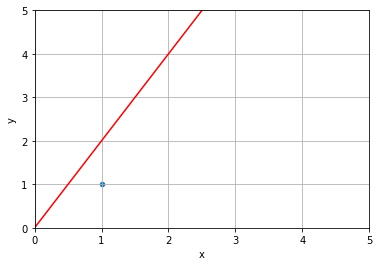

In [5]:
data = pd.DataFrame(columns=('x', 'y'))
data.loc['1'] = pd.Series({'x':1., 'y':1.})
ax = data.plot(kind='scatter', x='x', y='y', ylim=(0,5), xlim=(0,5), grid=True)
drawLineByFunction(ax, theta0=theta.A1[0], theta1=theta.A1[1])
#drawLineByPoints(ax, p1=[0,2], p2=[4,5])

In [6]:
steps = range(-5,5)
list(steps)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

In [7]:
costtable = pd.DataFrame(columns=('x', 'y'))
for i in steps:
  fi = float(i);
  cost = (1/2) * ((fi - 1)**2);
  costtable.loc[i] = pd.Series({'x':fi, 'y':cost})
costtable


x     y
-5 -5.0  18.0
-4 -4.0  12.5
-3 -3.0   8.0
-2 -2.0   4.5
-1 -1.0   2.0
 0  0.0   0.5
 1  1.0   0.0
 2  2.0   0.5
 3  3.0   2.0
 4  4.0   4.5

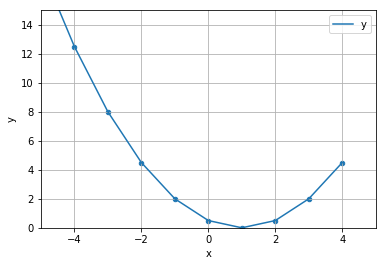

In [8]:
ax = costtable.plot(kind='scatter', x='x', y='y', ylim=(0,15), xlim=(-5,5), grid=True)
costtable.plot( x='x', y='y', ylim=(0,15), xlim=(-5,5), grid=True, ax=ax)

Viendo la gráfica de podemos ver que el punto más bajo es en x=1

In [9]:
data = pd.DataFrame(columns=('x', 'y'))
data.loc['1'] = pd.Series({'x':1., 'y':1.})
data.loc['2'] = pd.Series({'x':2., 'y':2.})
data.loc['3'] = pd.Series({'x':3., 'y':3.})
data.loc['4'] = pd.Series({'x':4., 'y':4.})
data


x    y
1  1.0  1.0
2  2.0  2.0
3  3.0  3.0
4  4.0  4.0

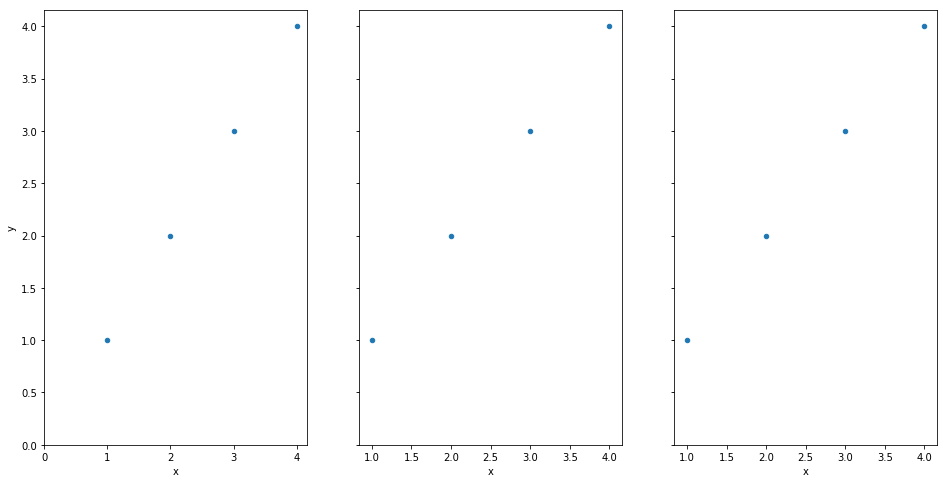

In [10]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='x', y='y', ax=axs[0], figsize=(16, 8), ylim=0, xlim=0)
data.plot(kind='scatter', x='x', y='y', ax=axs[1])
data.plot(kind='scatter', x='x', y='y', ax=axs[2])

In [11]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='y ~ x', data=data).fit()

# print the coefficients
lm.params

Intercept    1.110223e-16
x            1.000000e+00
dtype: float64

In [12]:
X_new = pd.DataFrame({'x': [50]})
X_new.head()

x
0  50

In [13]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    50.0
dtype: float64

In [14]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'x': [data.x.min(), data.y.max()]})
X_new.head()

x
0  1.0
1  4.0

In [15]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    1.0
1    4.0
dtype: float64

Text(5,4,'$Last Point: (2,4) E=mc^2$')

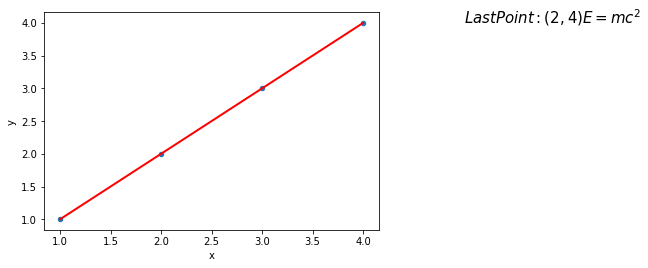

In [16]:
# first, plot the observed data
data.plot(kind='scatter', x='x', y='y')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
plt.text(5, 4, r'$Last Point: (2,4) E=mc^2$', fontsize=15)

In [17]:
matrix1 = np.matrix(
    [[1, 4],
     [2, 0]]
)

matrix2 = np.matrix(
    [[-1, 2],
     [1, -2]]
)

matrix1 + matrix2

matrix([[ 0,  6],
        [ 3, -2]])

In [18]:
%matplotlib inline

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

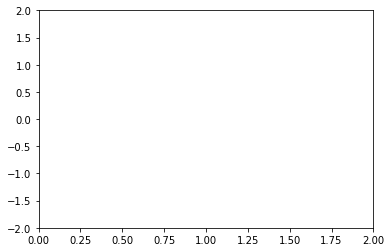

In [20]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))


line, = ax.plot([], [], lw=2)

In [21]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [22]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [23]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=1000, blit=True)

In [24]:
HTML(anim.to_html5_video())

In [25]:
import matplotlib.mathtext as mathtext
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('image', origin='upper')

parser = mathtext.MathTextParser("Bitmap")
parser.to_png('test2.png',
              r'$\left[\left\lfloor\frac{5}{\frac{\left(3\right)}{4}} '
              r'y\right)\right]$', color='green', fontsize=14, dpi=100)

rgba1, depth1 = parser.to_rgba(
    r'IQ: $\sigma_i=15$', color='blue', fontsize=20, dpi=200)
rgba2, depth2 = parser.to_rgba(
    r'some other string', color='red', fontsize=20, dpi=200)

fig = plt.figure()
fig.figimage(rgba1, 100, 100)
fig.figimage(rgba2, 100, 300)

plt.show()

Text(1,1,'an equation: $E=mc^2$')

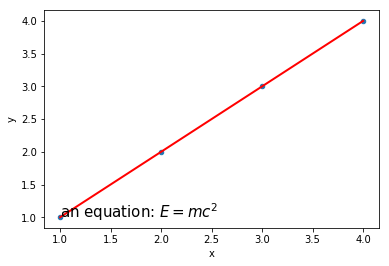

In [26]:
# first, plot the observed data
ax = data.plot(kind='scatter', x='x', y='y')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
#plt.text(5, 4, r'$Last Point: (2,4) E=mc^2$', fontsize=15)
ax.text(1, 1, r'an equation: $E=mc^2$', fontsize=15)


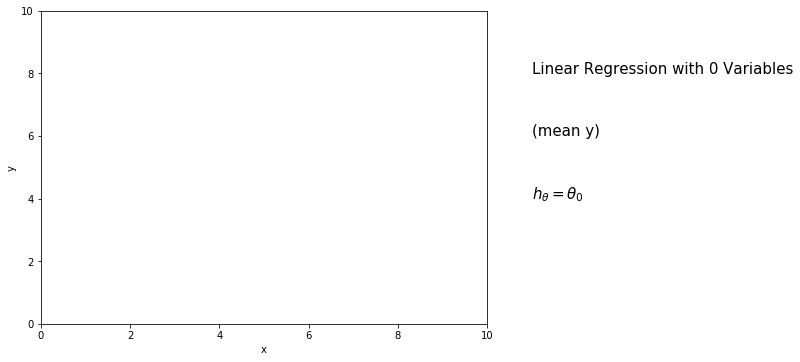

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('xkcd:white')
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
#ax.set_title('axes title')

ax.set_xlabel('x')
ax.set_ylabel('y')

#ax.text(3, 8, 'boxed italics text in data coords', style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(11,  8, r'Linear Regression with 0 Variables', fontsize=15)
ax.text(11,  6, r'(mean y)', fontsize=15)
ax.text(11,  4, r'$h_\theta = \theta_0$', fontsize=15)

#ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

#ax.text(0.95, 0.01, 'colored text in axes coords',
#        verticalalignment='bottom', horizontalalignment='right',
#        transform=ax.transAxes,
#        color='green', fontsize=15)


#ax.plot([2], [1], 'o')
#ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
#            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

Text(11,2,'')

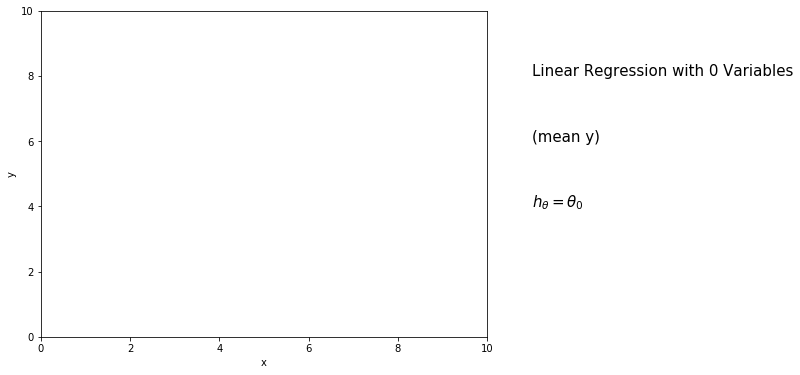

In [28]:
data = pd.DataFrame(columns=('x', 'y'))
data.loc['1'] = pd.Series({'x':4., 'y':4.})
ax = data.plot(kind='scatter', x='x', y='y',ylim=[0,10], xlim=[0,10], figsize=(8, 6), alpha=0)
ax.figure.patch.set_facecolor('xkcd:white')
ax.text(11, 8, r'Linear Regression with 0 Variables', fontsize=15)
ax.text(11, 6, r'(mean y)', fontsize=15)
ax.text(11, 4, r'$h_\theta = \theta_0$', fontsize=15)
ax.text(11, 2, r'', fontsize=15)

Text(11,2,'')

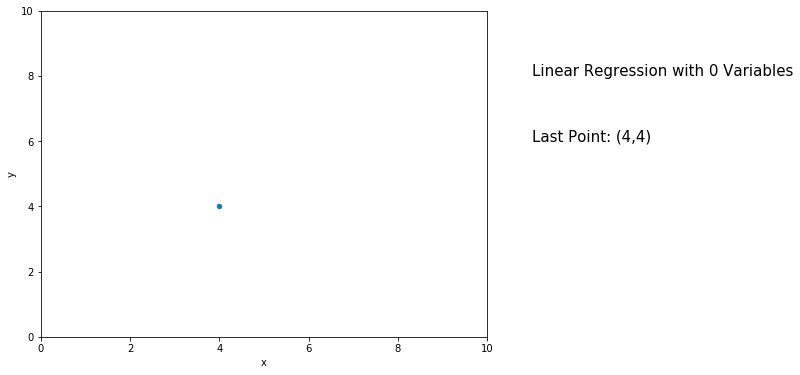

In [29]:
data = pd.DataFrame(columns=('x', 'y'))
data.loc['1'] = pd.Series({'x':4., 'y':4.})
ax = data.plot(kind='scatter', x='x', y='y',ylim=[0,10], xlim=[0,10], figsize=(8, 6))
ax.figure.patch.set_facecolor('xkcd:white')
ax.text(11, 8, r'Linear Regression with 0 Variables', fontsize=15)
ax.text(11, 6, r'Last Point: (4,4)', fontsize=15)
ax.text(11, 4, r'', fontsize=15)
ax.text(11, 2, r'', fontsize=15)

Text(11,2,'Error: 0')

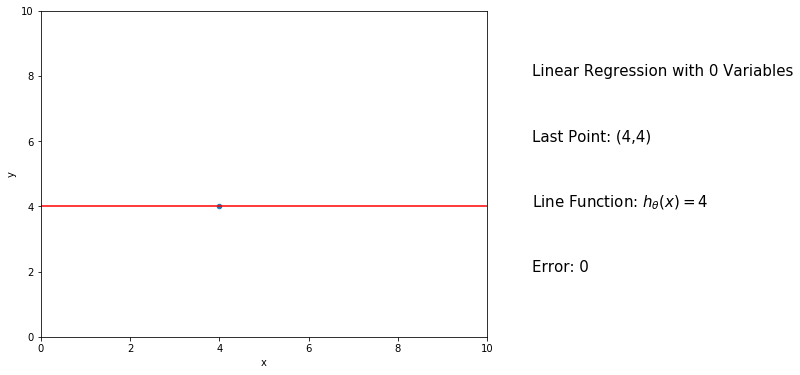

In [30]:
data = pd.DataFrame(columns=('x', 'y'))
data.loc['1'] = pd.Series({'x':4., 'y':4.})
ax = data.plot(kind='scatter', x='x', y='y',ylim=[0,10], xlim=[0,10], figsize=(8, 6))
ax.figure.patch.set_facecolor('xkcd:white')
drawLineByFunction(ax, theta0=4)
ax.text(11, 8, r'Linear Regression with 0 Variables', fontsize=15)
ax.text(11, 6, r'Last Point: (4,4)', fontsize=15)
ax.text(11, 4, r'Line Function: $h_\theta(x) = 4$', fontsize=15)
ax.text(11, 2, r'Error: 0', fontsize=15)

Text(11,2,'')

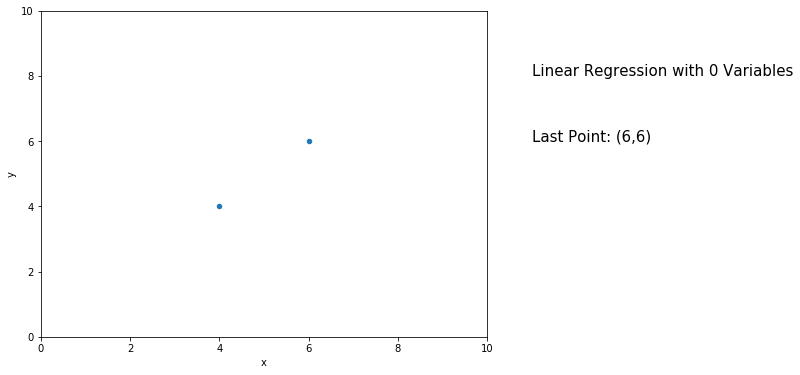

In [31]:
data = pd.DataFrame(columns=('x', 'y'))
data.loc['1'] = pd.Series({'x':4., 'y':4.})
data.loc['2'] = pd.Series({'x':6., 'y':6.})
ax = data.plot(kind='scatter', x='x', y='y',ylim=[0,10], xlim=[0,10], figsize=(8, 6))
ax.figure.patch.set_facecolor('xkcd:white')
ax.text(11, 8, r'Linear Regression with 0 Variables', fontsize=15)
ax.text(11, 6, r'Last Point: (6,6)', fontsize=15)
ax.text(11, 4, r'', fontsize=15)
ax.text(11, 2, r'', fontsize=15)

Text(11,2,'Error: 2 (green)')

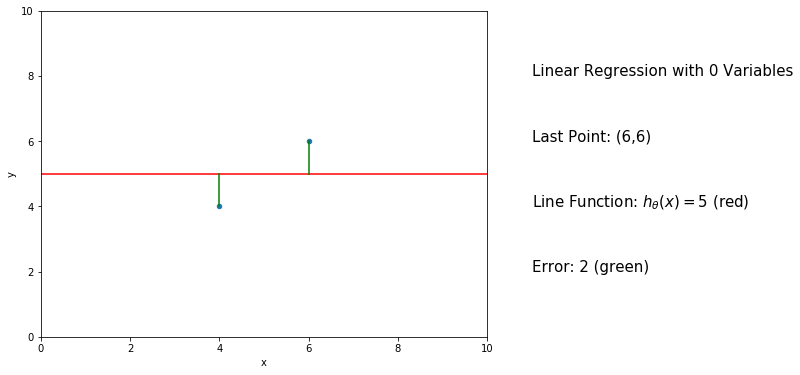

In [32]:
data = pd.DataFrame(columns=('x', 'y'))
data.loc['1'] = pd.Series({'x':4., 'y':4.})
data.loc['2'] = pd.Series({'x':6., 'y':6.})
ax = data.plot(kind='scatter', x='x', y='y',ylim=[0,10], xlim=[0,10], figsize=(8, 6))
ax.figure.patch.set_facecolor('xkcd:white')
drawLineByFunction(ax, theta0=5)
drawLineByPoints(ax, p1=[4,4], p2=[4,5])
drawLineByPoints(ax, p1=[6,6], p2=[6,5])
ax.text(11, 8, r'Linear Regression with 0 Variables', fontsize=15)
ax.text(11, 6, r'Last Point: (6,6)', fontsize=15)
ax.text(11, 4, r'Line Function: $h_\theta(x) = 5$ (red)', fontsize=15)
ax.text(11, 2, r'Error: 2 (green)', fontsize=15)

In [33]:
import os, errno

# data is a panda object with x,y columns
def plotData(data, title="Title", line1="", line2="", line3="", alpha=1):
  ax = data.plot(kind='scatter', x='x', y='y',ylim=[0,10], xlim=[0,10], figsize=(8, 6), alpha=alpha)
  ax.figure.patch.set_facecolor('xkcd:white')
  ax.text(11, 8, r'Linear Regression with 0 Variables', fontsize=15)
  ax.text(11, 6, r'(mean y)', fontsize=15)
  ax.text(11, 4, r'$h_\theta = \theta_0$', fontsize=15)
  ax.text(11, 2, r'', fontsize=15)
  return ax.get_figure()

def animationOfLinearRegression(data):
  title = "Linear Regression with 0 Variables"
  #os.makedirs('linear_regression_0')  
  origin = pd.DataFrame(columns=('x', 'y'))
  origin.loc['1'] = pd.Series({'x':4., 'y':4.})
  ax = origin.plot(kind='scatter', x='x', y='y',ylim=[0,10], xlim=[0,10], figsize=(8, 6), alpha=0)
  ax.figure.patch.set_facecolor('xkcd:white')
  ax.text(11, 8, r'Linear Regression with 0 Variables', fontsize=15)
  ax.text(11, 6, r'(mean y)', fontsize=15)
  ax.text(11, 4, r'$h_\theta = \theta_0$', fontsize=15)
  ax.text(11, 2, r'', fontsize=15)
  fig = ax.get_figure()
  fig.savefig('./linear_regression_0/LinearRegression_000.jpg', bbox_inches="tight")
  for i in range(len(data)):
    print('-------------------------------------------------' + str(i))
    # Add Point
    m = i+1;
    m_string = str(m).zfill(3);
    ax = data.iloc[:m].plot(kind='scatter', x='x', y='y',ylim=[0,10], xlim=[0,10], figsize=(8, 6))
    ax.figure.patch.set_facecolor('xkcd:white')
    ax.text(11, 8, r'Linear Regression with 0 Variables', fontsize=15)
    ax.text(11, 6, r'Last Point: (' + str(data.values[i][0]) + ', ' + str(data.values[i][1]) + ')', fontsize=15)
    ax.text(11, 4, r'Line Function: -', fontsize=15)
    ax.text(11, 2, r'Error: -', fontsize=15)
    fig = ax.get_figure()
    fig.savefig('./linear_regression_0/LinearRegression_' + m_string + '_001.jpg', bbox_inches="tight")
    
    # Add Line - Show function and error
    ax = data.iloc[:(i+1)].plot(kind='scatter', x='x', y='y',ylim=[0,10], xlim=[0,10], figsize=(8, 6))
    ax.figure.patch.set_facecolor('xkcd:white')
    # Mean
    sumOfY = 0
    mean = 0
    for j in range(m):
      sumOfY+= data.values[j][1]
    mean = sumOfY/m
    drawLineByFunction(ax, theta0=mean)
    # Error
    sumOfError = 0;
    for j in range(m):
      sumOfError+= abs(data.values[j][1] - mean) 
      drawLineByPoints(ax, p1=data.values[j], p2=[data.values[j][0],mean])
    ax.text(11, 8, r'Linear Regression with 0 Variables', fontsize=15)
    ax.text(11, 6, r'Last Point: (' + str(data.values[i][0]) + ', ' + str(data.values[i][1]) + ')', fontsize=15)
    ax.text(11, 4, r'Line Function: $h_\theta(x) = ' + str(round(mean,2)) + '$ (red)', fontsize=15)
    ax.text(11, 2, r'Error: ' + str(round(sumOfError,2)) + ' (green)', fontsize=15)
    fig = ax.get_figure()
    fig.savefig('./linear_regression_0/LinearRegression_' + m_string + '_002.jpg', bbox_inches="tight")

-------------------------------------------------0
-------------------------------------------------1
-------------------------------------------------2
-------------------------------------------------3
-------------------------------------------------4
-------------------------------------------------5
-------------------------------------------------6
-------------------------------------------------7
-------------------------------------------------8
-------------------------------------------------9


/Users/raultierno/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


-------------------------------------------------10
-------------------------------------------------11
-------------------------------------------------12
-------------------------------------------------13
-------------------------------------------------14
-------------------------------------------------15
-------------------------------------------------16
-------------------------------------------------17
-------------------------------------------------18
-------------------------------------------------19


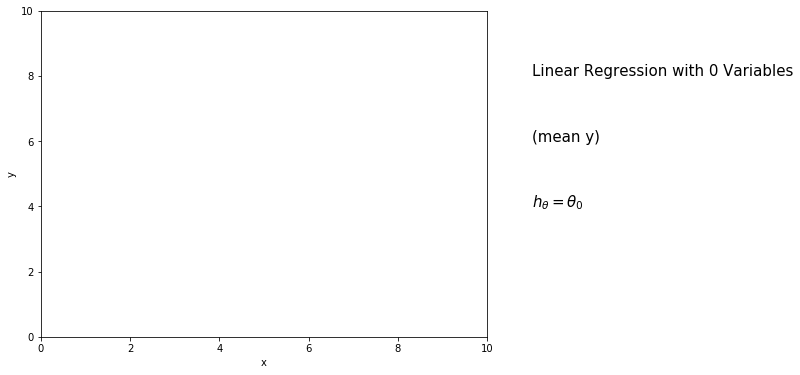

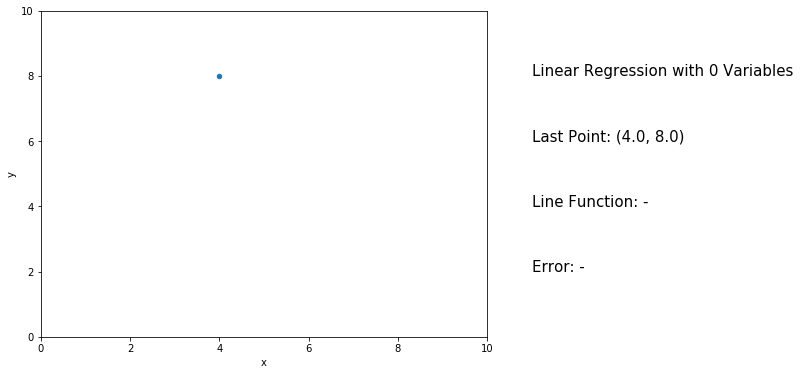

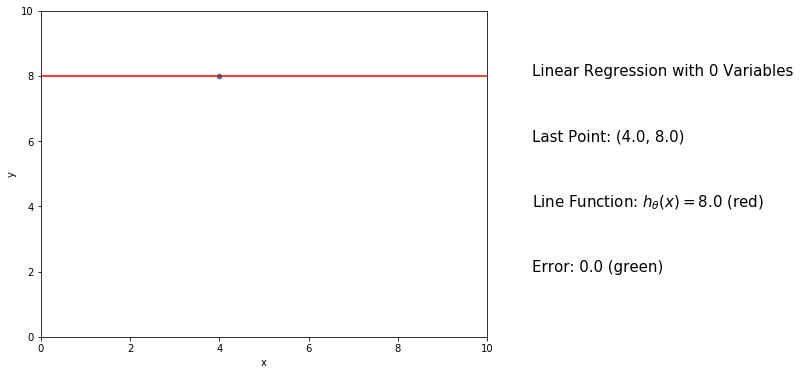

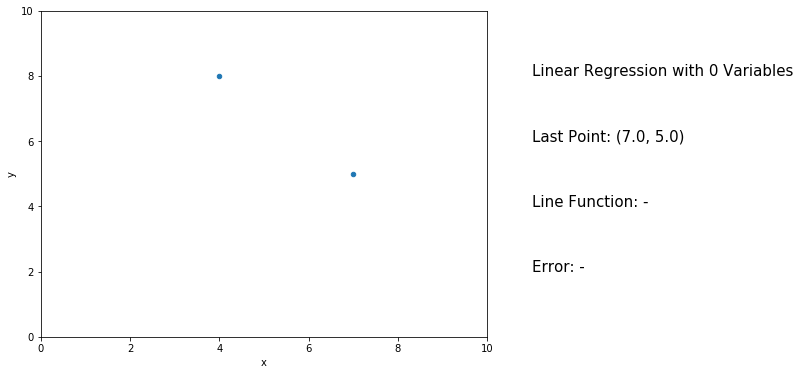

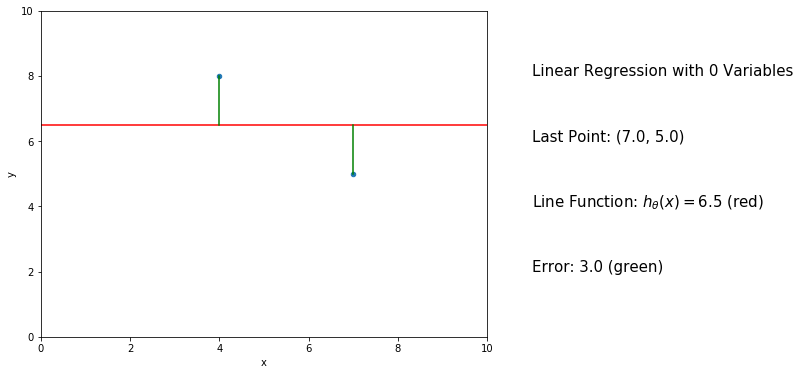

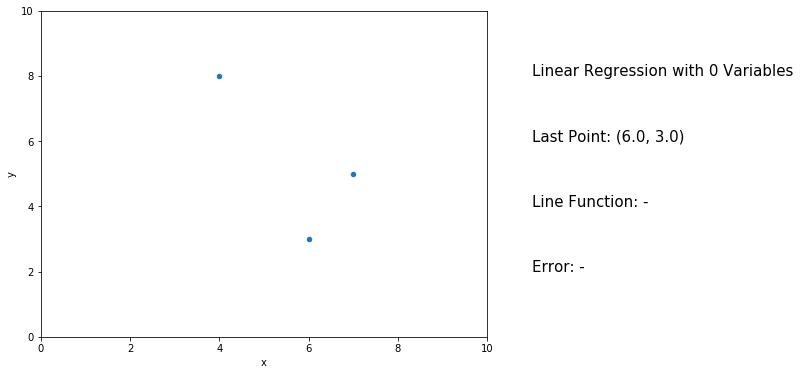

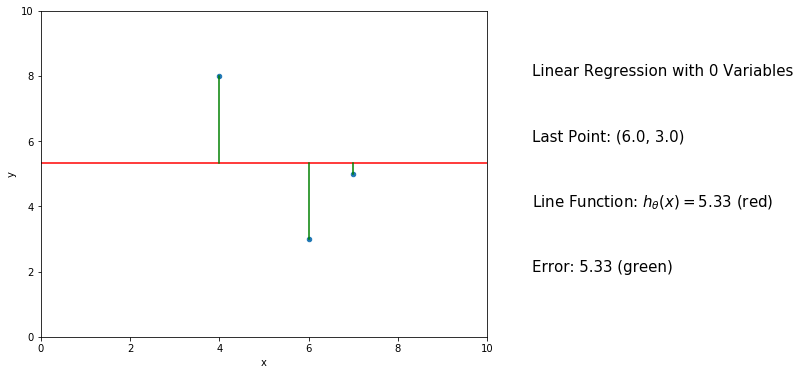

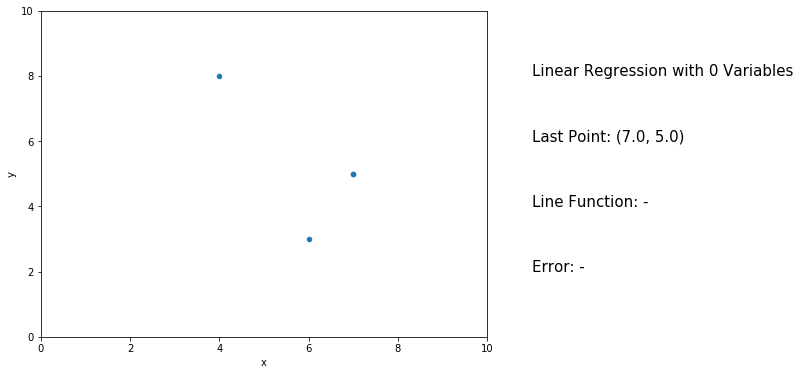

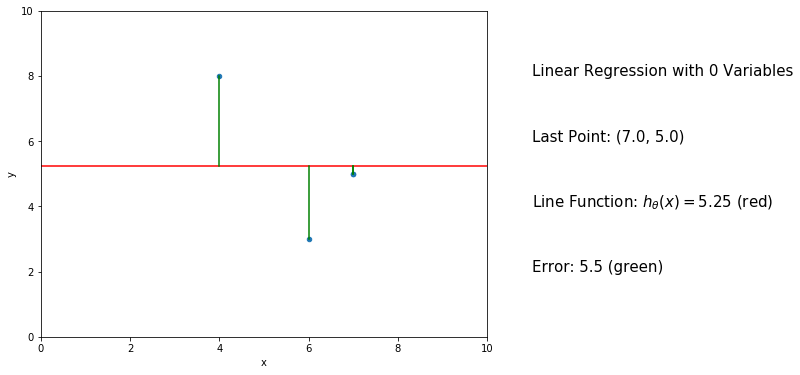

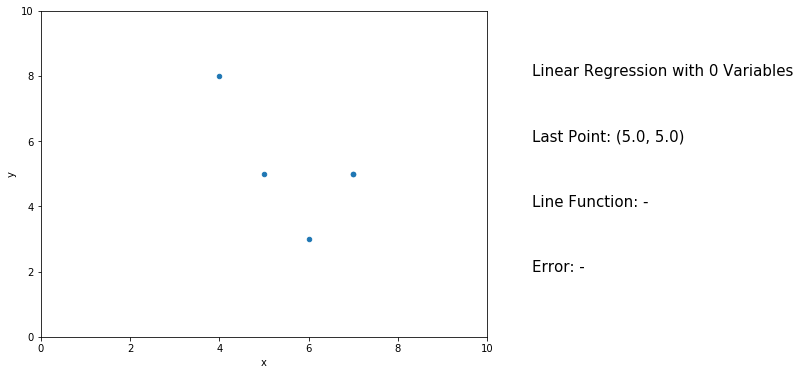

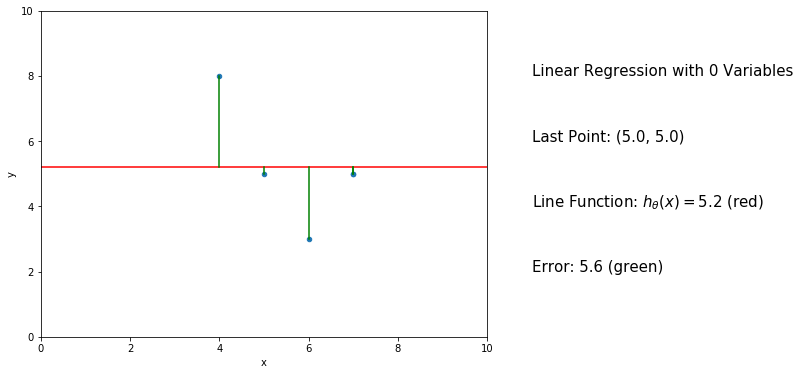

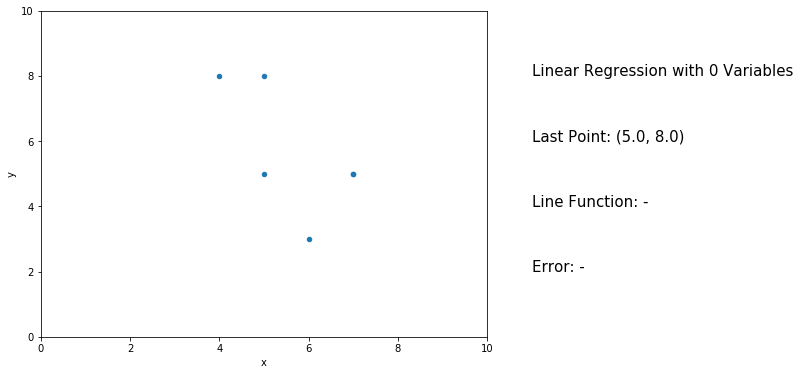

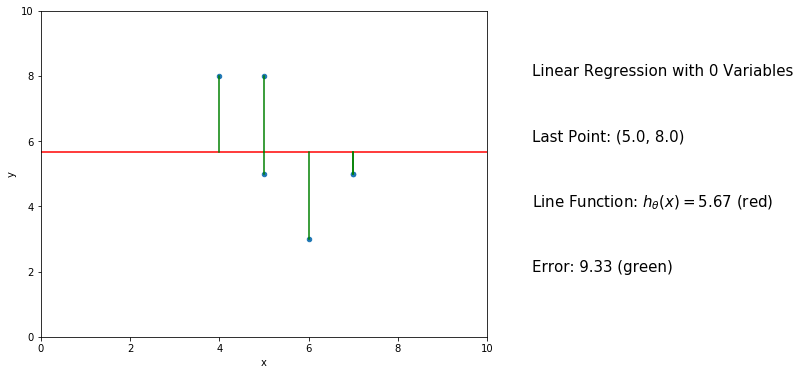

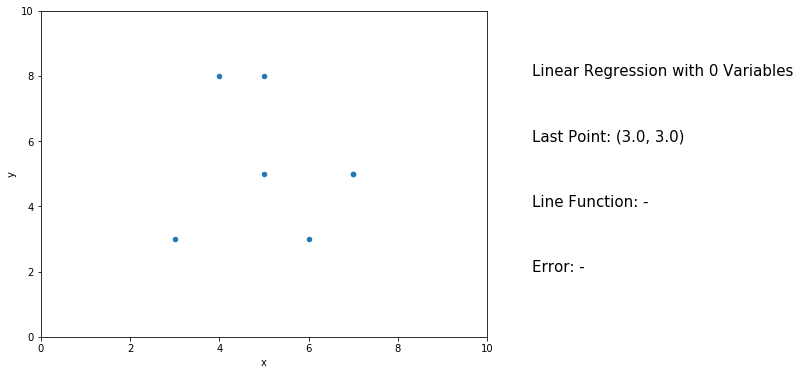

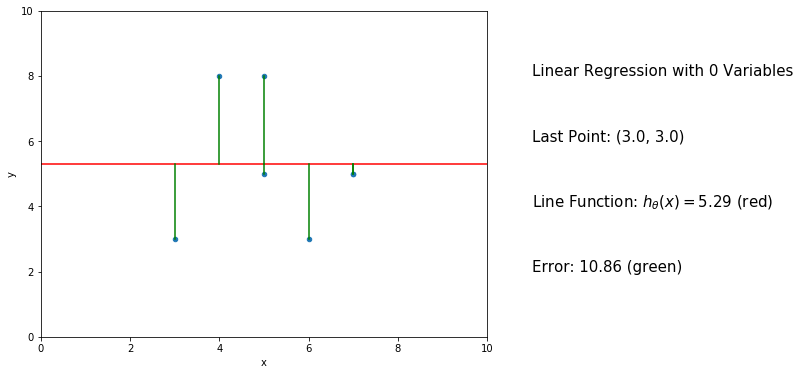

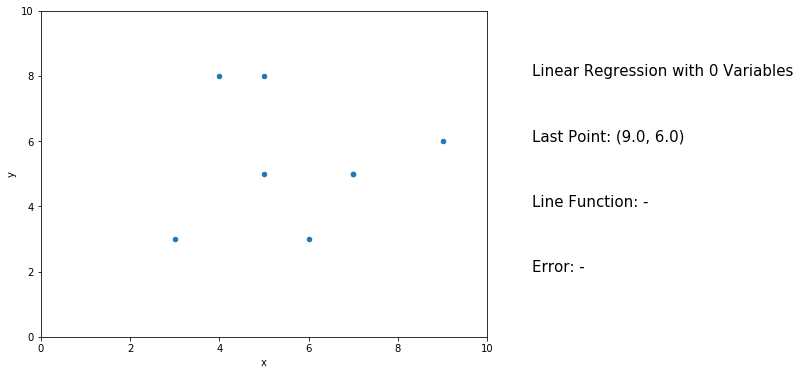

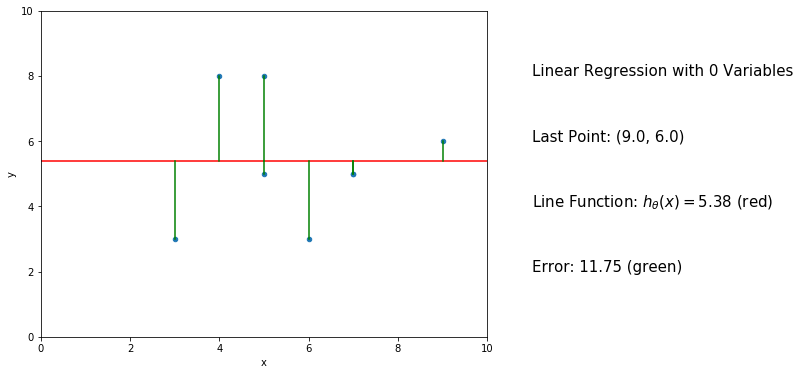

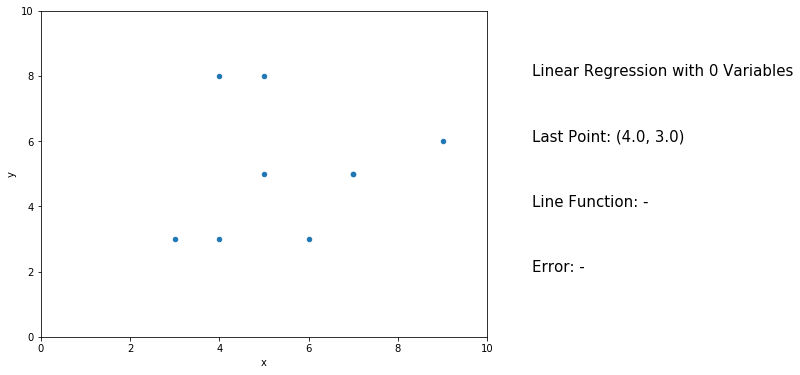

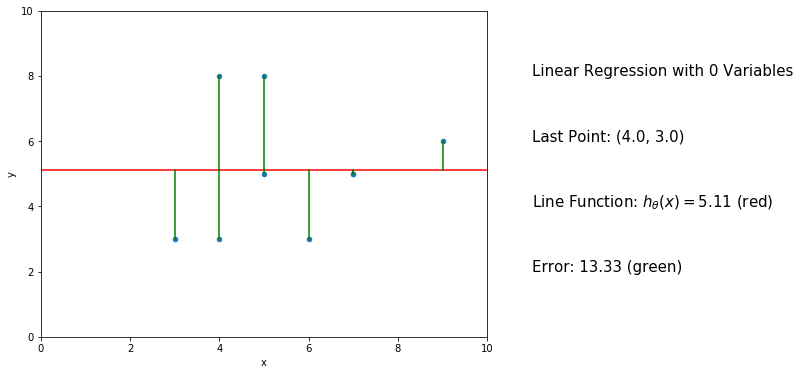

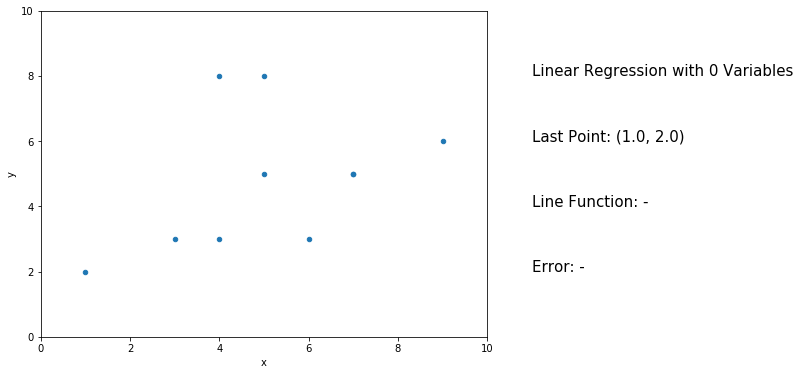

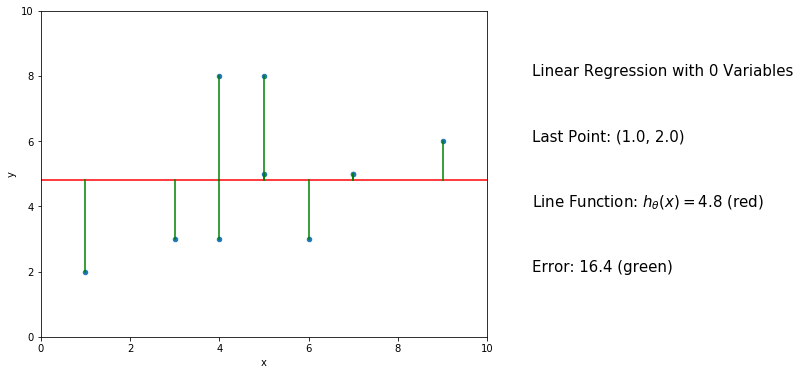

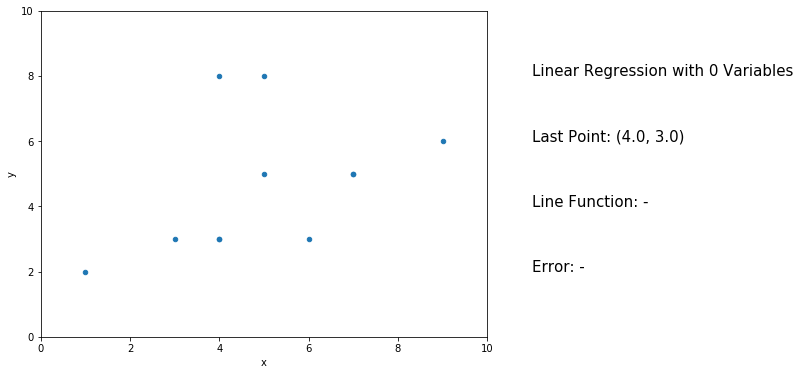

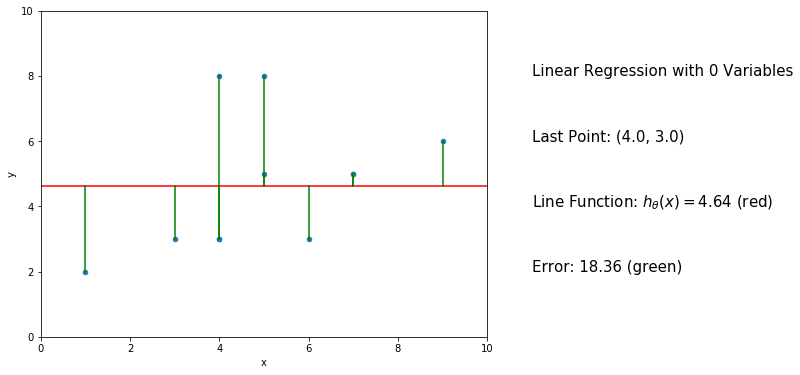

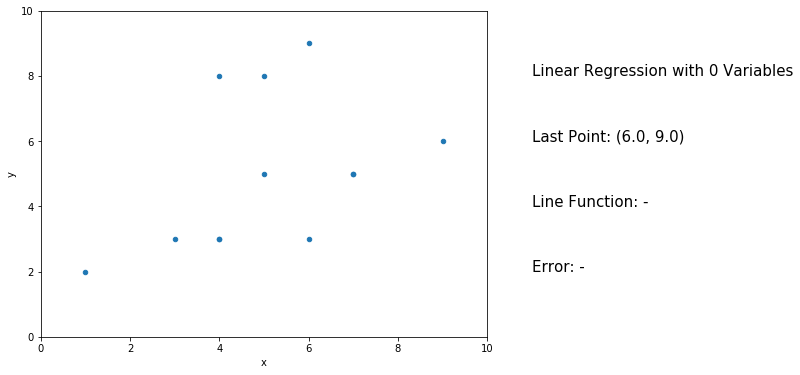

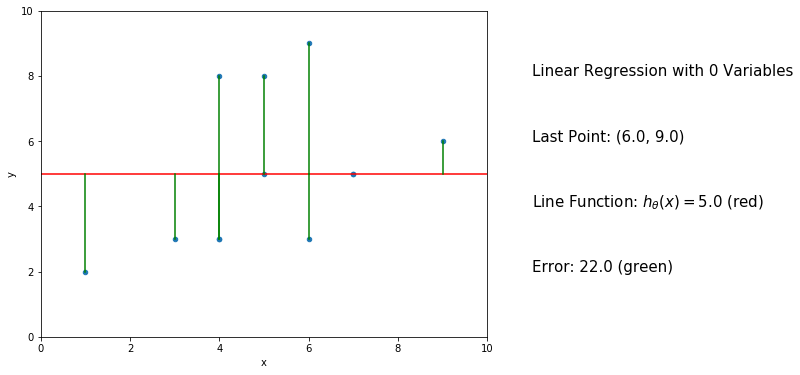

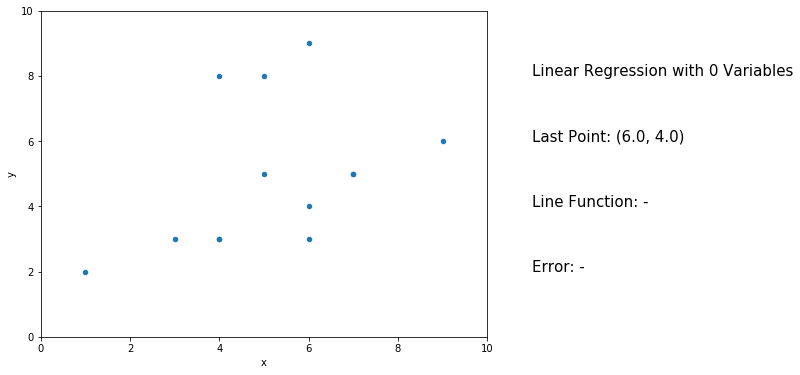

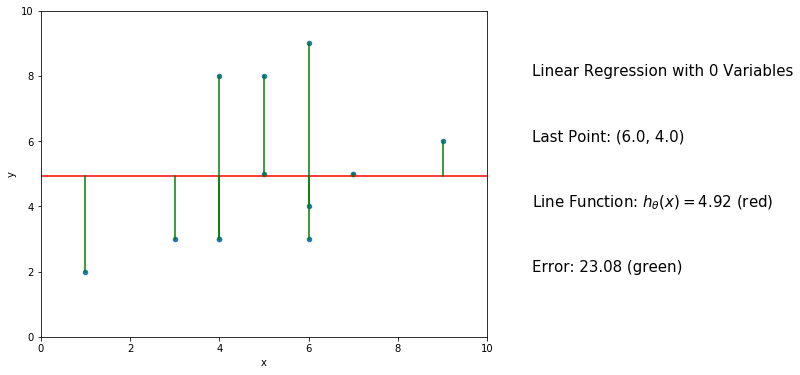

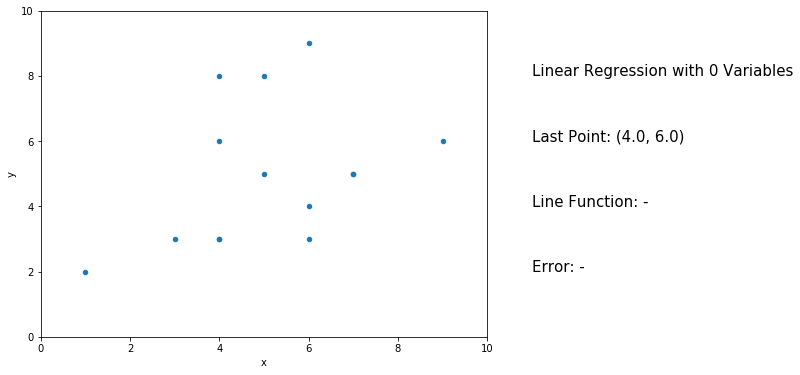

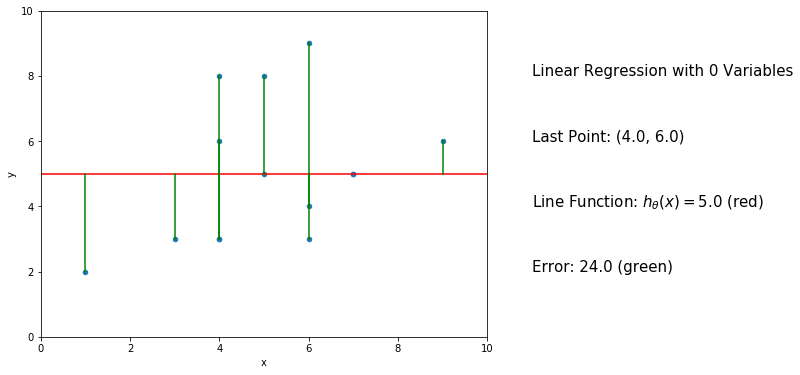

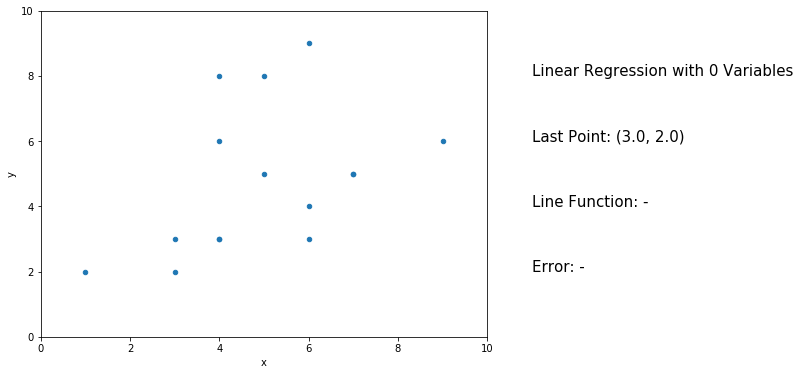

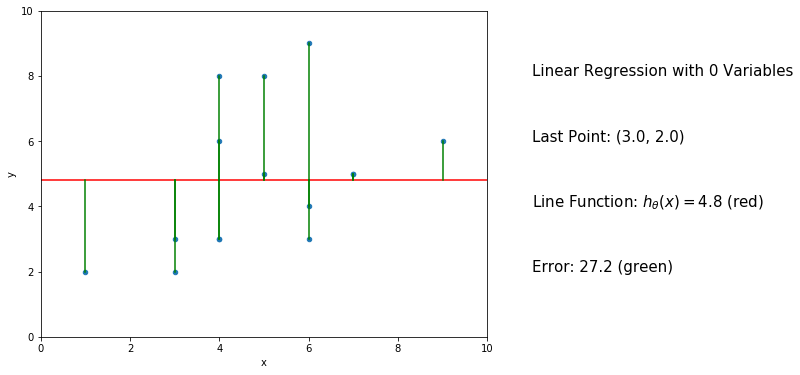

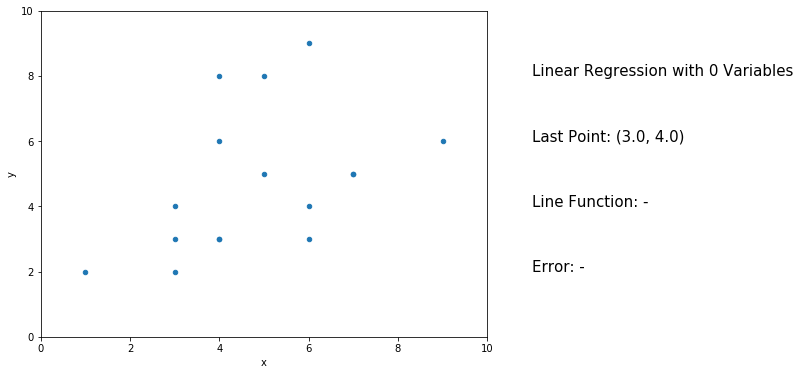

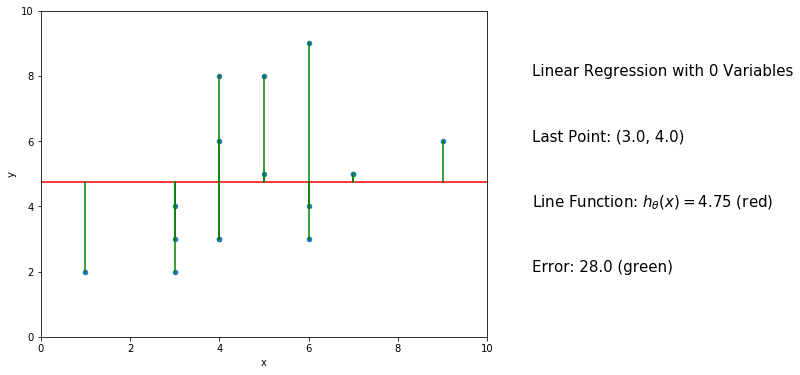

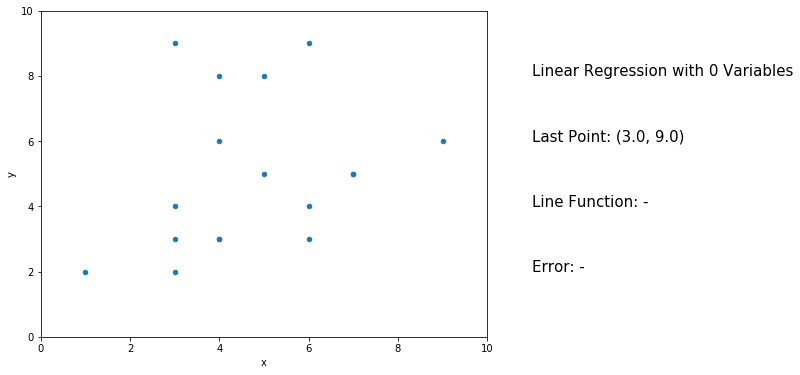

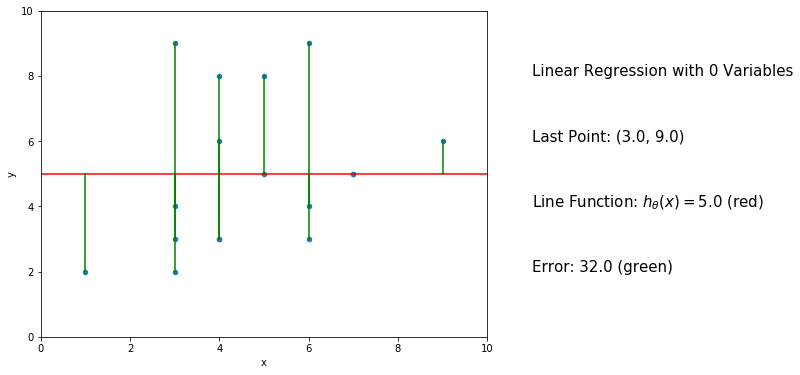

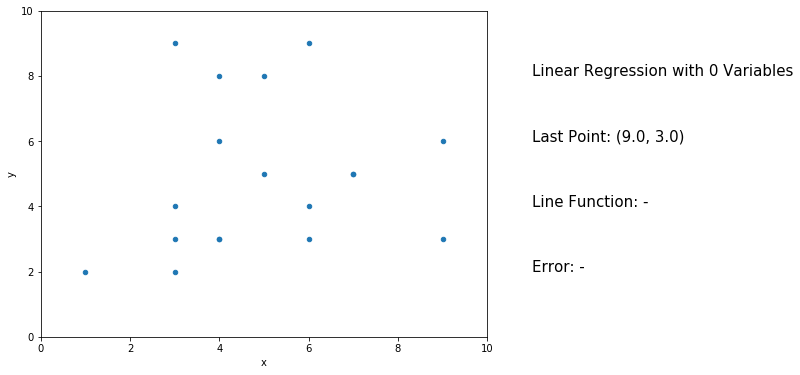

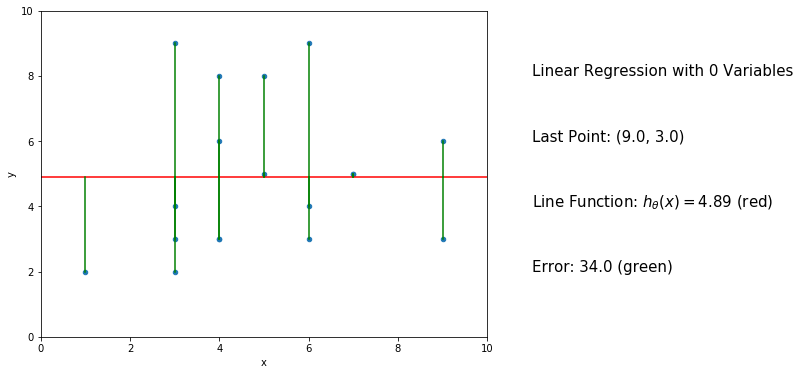

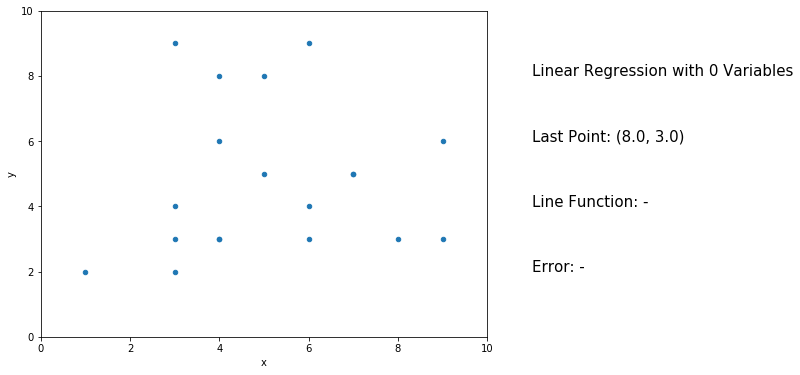

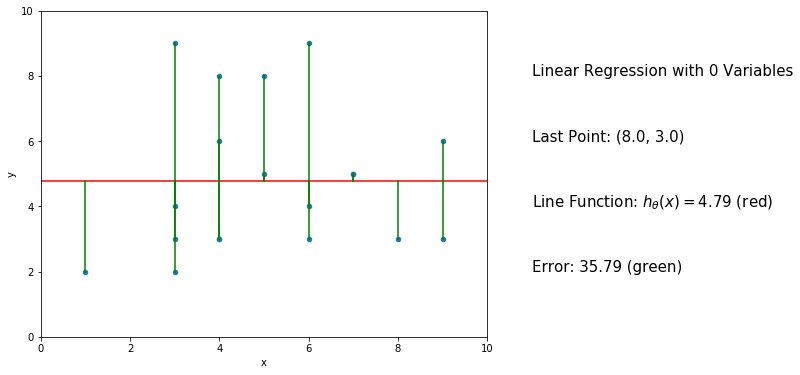

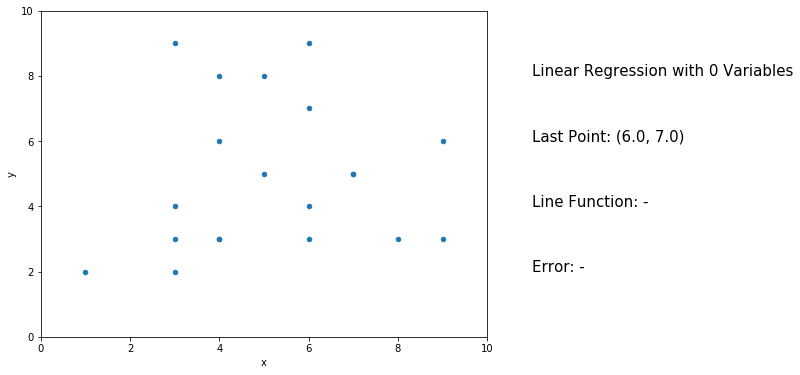

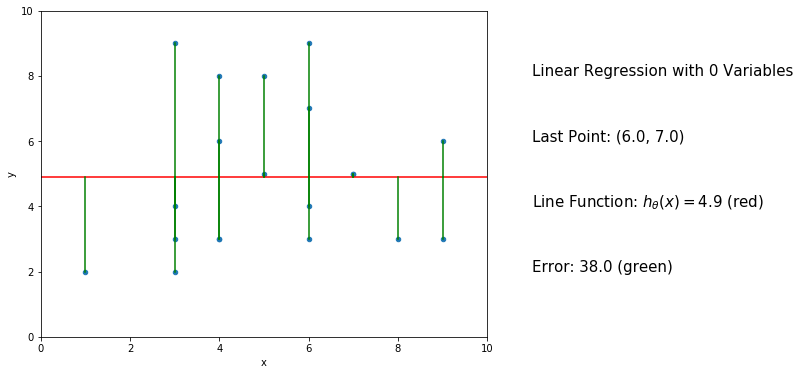

In [34]:
data = pd.DataFrame(columns=('x', 'y'))
for i in range(20):
    data.loc[i] = pd.Series({'x':float(np.random.randint(1, 10)), 'y':float(np.random.randint(1, 10))})
#data.loc['1'] = pd.Series({'x':1., 'y':1.})
#data.loc['2'] = pd.Series({'x':2., 'y':2.})
#data.loc['3'] = pd.Series({'x':3., 'y':3.})
#data.loc['4'] = pd.Series({'x':4., 'y':4.})
data.values[0][0]
animationOfLinearRegression(data)
#len(data)
#for i in range(len(data)):
#  print(data.values[i][0])
#  ax = data.iloc[:(i+1)].plot(kind='scatter', x='x', y='y',ylim=[0,10], xlim=[0,10], figsize=(8, 6))
#  ax.figure.patch.set_facecolor('xkcd:white')
#  drawLineByFunction(ax, theta0=5)
#  drawLineByPoints(ax, p1=[4,4], p2=[4,5])
#  drawLineByPoints(ax, p1=[6,6], p2=[6,5])
#  ax.text(11, 8, r'Linear Regression with 0 Variables', fontsize=15)
#  ax.text(11, 6, r'Last Point: (6,6)', fontsize=15)
#  ax.text(11, 4, r'Line Function: $h_\theta(x) = 5$ (red)', fontsize=15)
#  ax.text(11, 2, r'Error: 2 (green)', fontsize=15)

In [72]:
#data = pd.DataFrame(columns=('x', 'y'))
#for i in range(100):
#    data.loc[i] = pd.Series({'x':float(np.random.randint(1, 10)), 'y':float(np.random.randint(1, 10))})
#data
a = np.random.randn(100, 2)
df = pd.DataFrame(a, columns=list('xy'))
df['y'] = df['y'] - df['x'] 

In [73]:
X = np.asmatrix(df.as_matrix(['x']))
y = np.asmatrix(df.as_matrix(['y']))

In [74]:
print(X) 
print(y)

[[-0.93832152]
 [ 1.61102888]
 [ 0.73196253]
 [-0.02793628]
 [ 2.43779753]
 [-0.865192  ]
 [ 1.15311324]
 [ 1.34657269]
 [-0.27551501]
 [ 0.06335403]
 [ 0.08523031]
 [ 0.69275703]
 [-0.47610168]
 [ 0.73572127]
 [-0.08708776]
 [-0.31510319]
 [ 1.15679107]
 [-0.6167778 ]
 [ 0.82761158]
 [-0.3632607 ]
 [ 2.0970613 ]
 [ 2.13452073]
 [ 0.73742001]
 [ 0.23648851]
 [-2.30038371]
 [-0.59282145]
 [ 0.09668522]
 [-0.13348819]
 [-0.05361731]
 [-0.18863874]
 [-1.84977099]
 [-0.19770869]
 [ 0.87931004]
 [ 1.00808046]
 [-0.2720749 ]
 [-0.40336146]
 [-0.69161569]
 [ 0.29908249]
 [-0.5941567 ]
 [-0.5398723 ]
 [ 0.78524044]
 [ 0.63635743]
 [-0.68937264]
 [ 0.1571607 ]
 [-0.86485095]
 [-0.19113364]
 [ 2.20478977]
 [-1.5331751 ]
 [ 1.97366731]
 [ 2.2049787 ]
 [ 1.60108396]
 [-0.19932366]
 [ 0.05978764]
 [ 0.91905332]
 [-0.4840621 ]
 [-0.89592672]
 [ 0.15841847]
 [ 0.60043987]
 [ 0.24275407]
 [ 0.22408903]
 [-0.66959219]
 [-0.65325933]
 [ 1.71463748]
 [-0.071749  ]
 [ 0.98952611]
 [-0.70327593]
 [ 0.22109

In [75]:
theta = np.matrix([[0],[0]])
iterations = 3000
alpha = 1;
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print(str(J_history[0]) + " - " + str(J_history[-1]))
theta

0.5287624583014396 - 0


matrix([[ 0.01948411],
        [-0.79041734]])

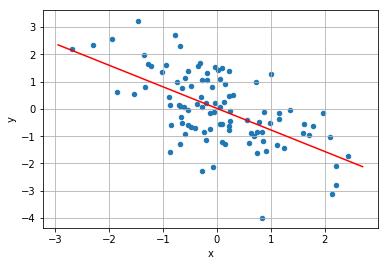

In [76]:
#ax = data.plot(kind='scatter', x='x', y='y', ylim=(0,10), xlim=(0,10), grid=True)
ax = df.plot(kind='scatter', x='x', y='y', grid=True)
drawLineByFunction(ax, theta0=theta.A1[0], theta1=theta.A1[1])

In [77]:
def animationOfLinearRegressionOneVar(data, iterations=3000, alpha=0.1):
  ylim = [-5, 5]
  xlim = [-5, 5]
  textX = 6
  textLine1Y = 4
  textLine2Y = 2
  textLine3Y = 0
  textLine4Y = -2
  
  title = "Linear Regression with 1 Variables"
  #os.makedirs('linear_regression_1')  
  origin = pd.DataFrame(columns=('x', 'y'))
  origin.loc['1'] = pd.Series({'x':4., 'y':4.})
  ax = origin.plot(kind='scatter', x='x', y='y',ylim=ylim, xlim=xlim, figsize=(8, 6), alpha=0)
  ax.figure.patch.set_facecolor('xkcd:white')
  ax.text(textX, textLine1Y, r'Linear Regression with 1 Variable', fontsize=15)
  ax.text(textX, textLine2Y, r'using Gradient Descent', fontsize=15)
  ax.text(textX, textLine3Y, r'$h_\theta = \theta_0 + \theta_1x$', fontsize=15)
  ax.text(textX, textLine4Y, r'', fontsize=15)
  fig = ax.get_figure()
  fig.savefig('./linear_regression_1/LinearRegression_000.jpg', bbox_inches="tight")
  for i in range(len(data)):
    print('-------------------------------------------------' + str(i))
    # Add Point
    m = i+1;
    m_string = str(m).zfill(3);
    
    X = np.asmatrix(data.head(m).as_matrix(['x']))
    y = np.asmatrix(data.head(m).as_matrix(['y']))
    
    ax = data.iloc[:m].plot(kind='scatter', x='x', y='y',ylim=ylim, xlim=xlim, figsize=(8, 6))
    ax.figure.patch.set_facecolor('xkcd:white')
    ax.text(textX, textLine1Y, r'Linear Regression with 1 Variable', fontsize=15)
    ax.text(textX, textLine2Y, r'Last Point: (' + str(round(data.values[i][0],2)) + ', ' + str(round(data.values[i][1], 2)) + ')', fontsize=15)
    ax.text(textX, textLine3Y, r'', fontsize=15)
    ax.text(textX, textLine4Y, r'', fontsize=15)
    fig = ax.get_figure()
    fig.savefig('./linear_regression_1/LinearRegression_' + m_string + '_001.jpg', bbox_inches="tight")
    
    # Add Line - Show function and error
    ax = data.iloc[:(i+1)].plot(kind='scatter', x='x', y='y',ylim=ylim, xlim=xlim, figsize=(8, 6))
    ax.figure.patch.set_facecolor('xkcd:white')
    
    theta = np.matrix([[0],[0]])
    theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
    theta0 = theta.A1[0]
    theta1 = theta.A1[1]
    print("Theta0 = " + str(theta0))
    print("Theta1 = " + str(theta1))
    drawLineByFunction(ax, theta0=theta0, theta1=theta1)
    # Error
    sumOfError = 0;
    for j in range(m):
      sumOfError+= abs(data.values[j][1] - (theta[0] + theta[1]*data.values[j][0])) 
      drawLineByPoints(ax, p1=data.values[j], p2=[data.values[j][0], theta0 + theta1*data.values[j][0]])
    sumOfError = sumOfError.A1[0]
    print(sumOfError)
    ax.text(textX, textLine1Y, r'Linear Regression with 1 Variable', fontsize=15)
    ax.text(textX, textLine2Y, r'Last Point: (' + str(round(data.values[i][0],2)) + ', ' + str(round(data.values[i][1], 2)) + ')', fontsize=15)
    ax.text(textX, textLine3Y, r'$h_\theta(x) = ' + str(round(theta0,2)) + ' + ' + str(round(theta1,2)) +'x$ (red)', fontsize=15)
    ax.text(textX, textLine4Y, r'Error: ' + str(round(sumOfError,2)) + ' (green)', fontsize=15)
    fig = ax.get_figure()
    fig.savefig('./linear_regression_1/LinearRegression_' + m_string + '_002.jpg', bbox_inches="tight")

-------------------------------------------------0
Theta0 = 0.8526657538237029
Theta1 = -0.8000746231396105
4.440892098500626e-16
-------------------------------------------------1
Theta0 = 0.8071489025096645
Theta1 = -0.8485834237125706
8.881784197001252e-16
-------------------------------------------------2
Theta0 = 1.0413092012997176
Theta1 = -0.7864838771062239
1.0201908644027662
-------------------------------------------------3
Theta0 = 1.1786281035923656
Theta1 = -0.8369412272192401
1.501580419249527
-------------------------------------------------4
Theta0 = 1.1624325598387824
Theta1 = -1.0436253768699089
1.8573847098801588
-------------------------------------------------5
Theta0 = 0.2965600534348117
Theta1 = -0.5118770123469194
6.225200443559721
-------------------------------------------------6
Theta0 = 0.2901366974036842
Theta1 = -0.5153683112442703
6.262104674265564
-------------------------------------------------7
Theta0 = 0.3183257398485201
Theta1 = -0.4923140058692413


/Users/raultierno/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Theta0 = 0.24141253574761298
Theta1 = -0.4570941220273236
7.2245355669792675
-------------------------------------------------10
Theta0 = 0.382717780057819
Theta1 = -0.5030545023083893
8.54106346206677
-------------------------------------------------11
Theta0 = 0.3053966051163906
Theta1 = -0.5203963271800183
9.355809148513156
-------------------------------------------------12
Theta0 = 0.17185337430259356
Theta1 = -0.4297465453312376
10.47413387264123
-------------------------------------------------13
Theta0 = 0.12943296104462046
Theta1 = -0.4459093416583275
11.058585798697814
-------------------------------------------------14
Theta0 = 0.18077807753914843
Theta1 = -0.47037265184463156
11.664258962369587
-------------------------------------------------15
Theta0 = 0.2911833627726284
Theta1 = -0.5406773072759404
12.926128353148432
-------------------------------------------------16
Theta0 = 0.297897703216458
Theta1 = -0.5306904863537162
13.108552111805794
-----------------------------

-------------------------------------------------73
Theta0 = -0.09572441452205709
Theta1 = -0.6591107472988439
61.04889394640846
-------------------------------------------------74
Theta0 = -0.07411821924019833
Theta1 = -0.6577197944020485
62.65455235242066
-------------------------------------------------75
Theta0 = -0.068617717521954
Theta1 = -0.6438473888155926
63.129398640606404
-------------------------------------------------76
Theta0 = -0.07458610991209584
Theta1 = -0.6430508357126596
63.57537137968552
-------------------------------------------------77
Theta0 = -0.07426491448938966
Theta1 = -0.6434512741850569
63.597772515433554
-------------------------------------------------78
Theta0 = -0.040678855778177835
Theta1 = -0.6720749447311639
66.1648485153175
-------------------------------------------------79
Theta0 = -0.053718874446374146
Theta1 = -0.6621990903404815
66.94747645139427
-------------------------------------------------80
Theta0 = -0.05928192090700456
Theta1 = -0.66

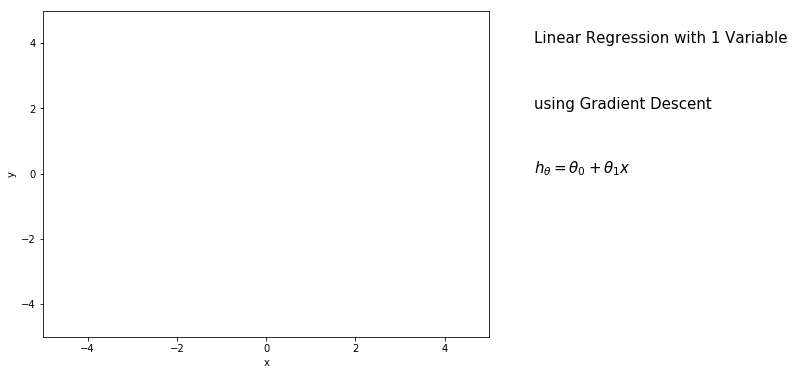

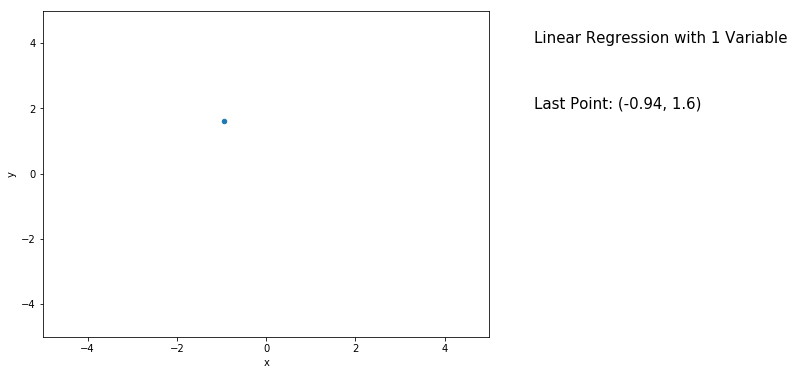

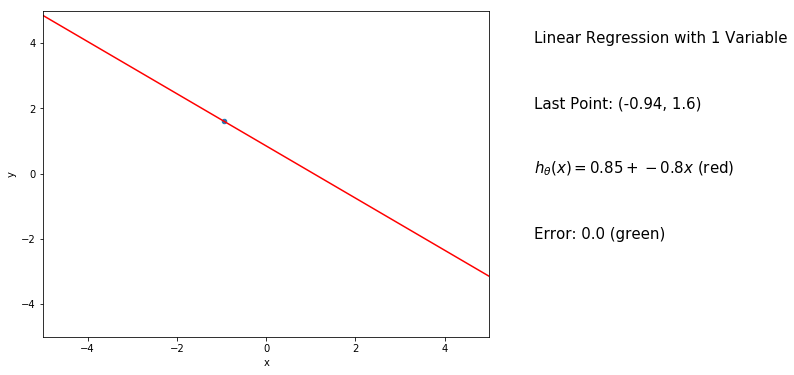

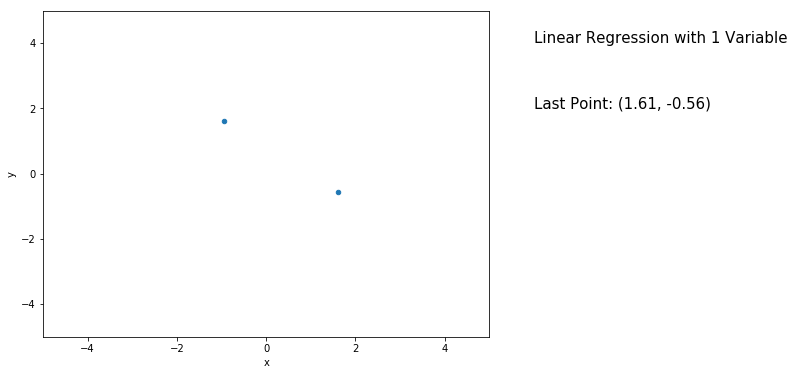

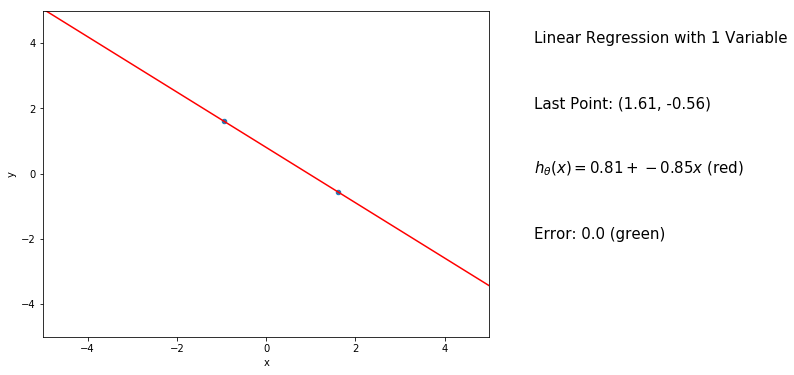

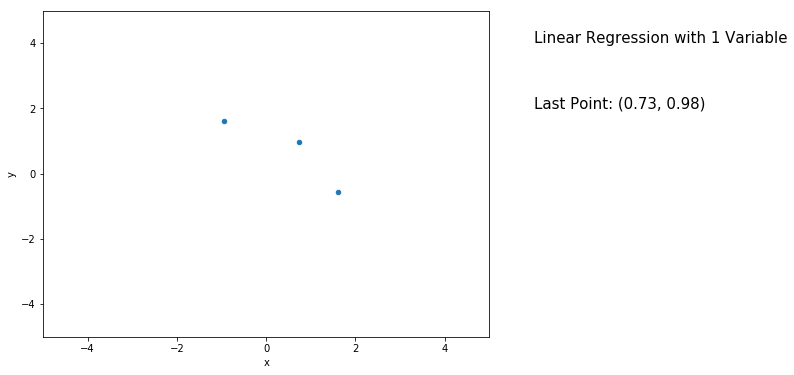

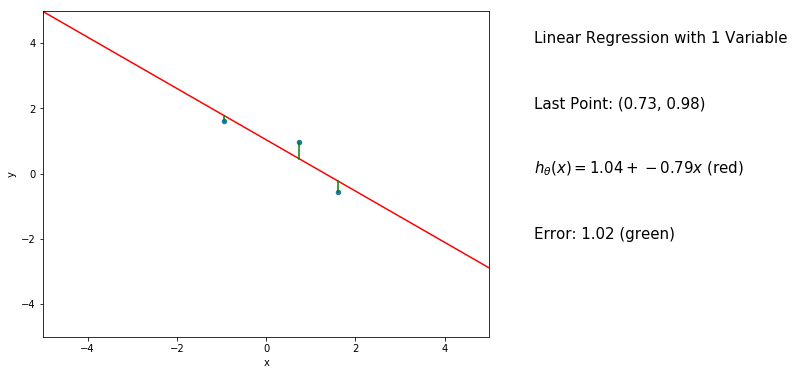

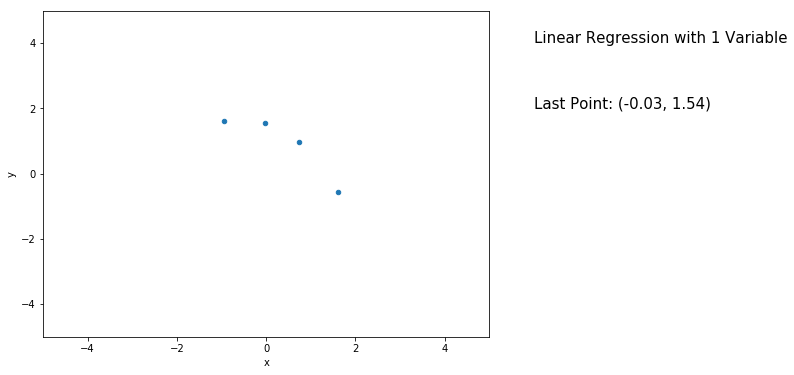

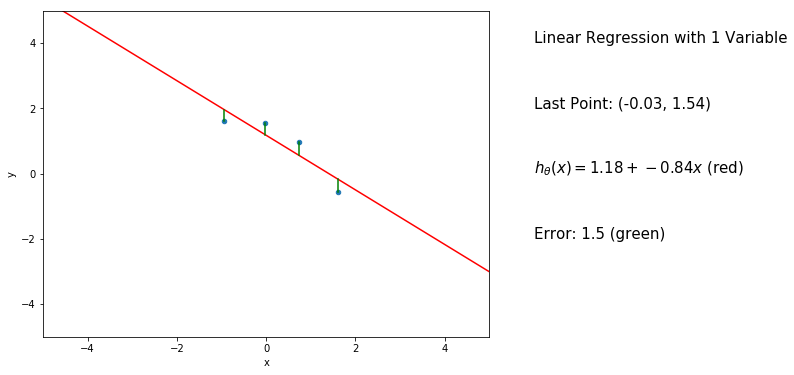

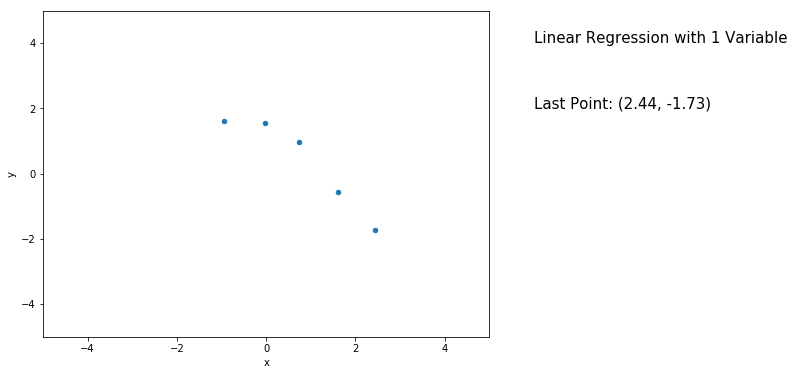

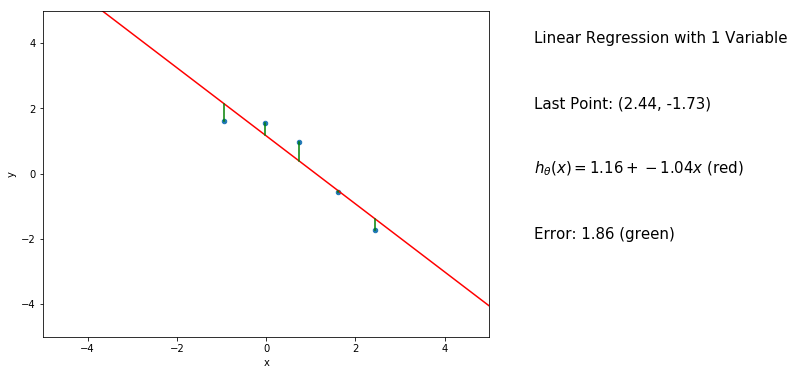

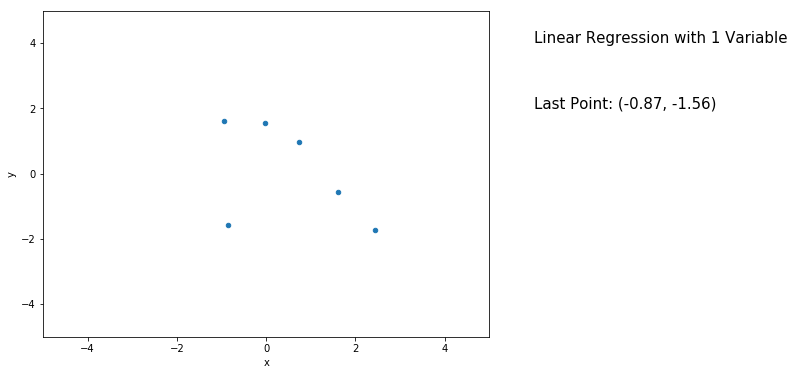

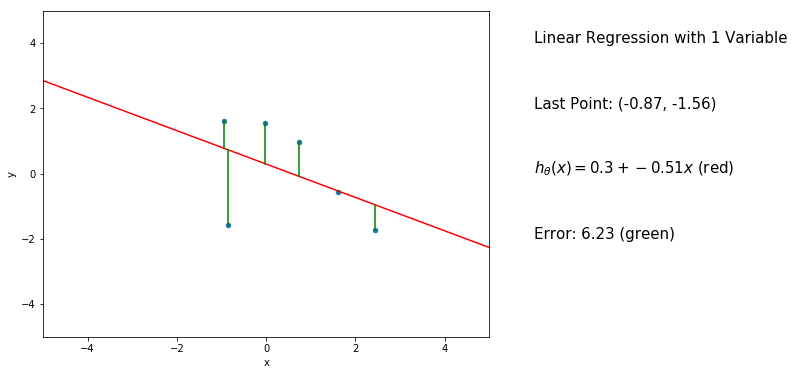

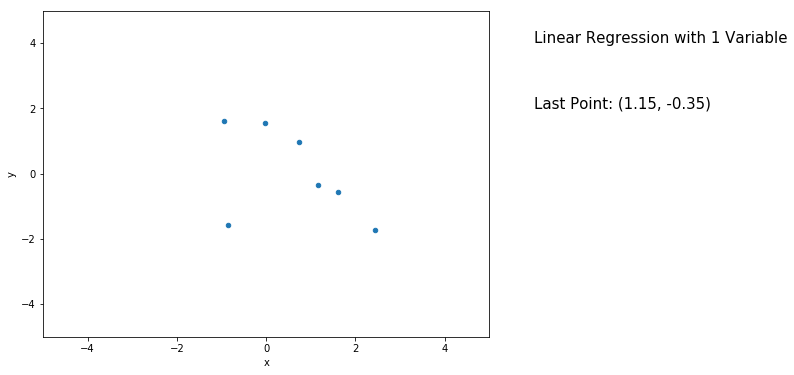

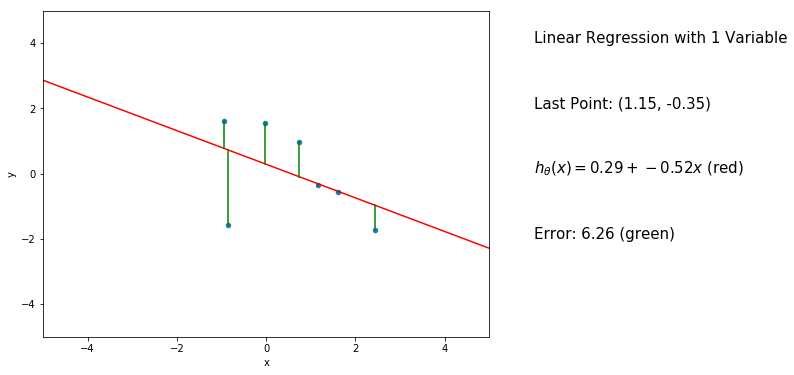

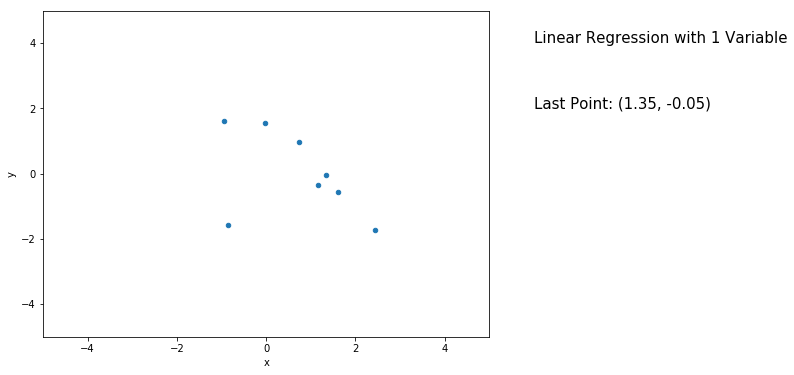

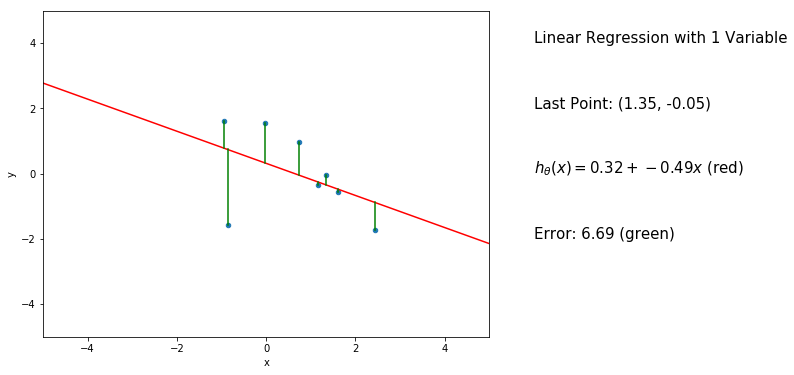

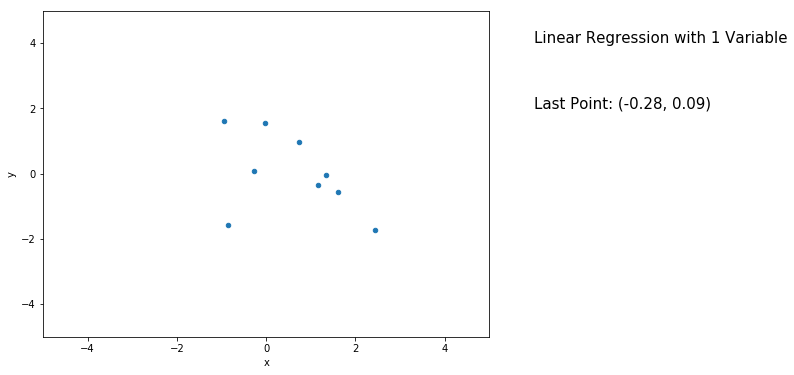

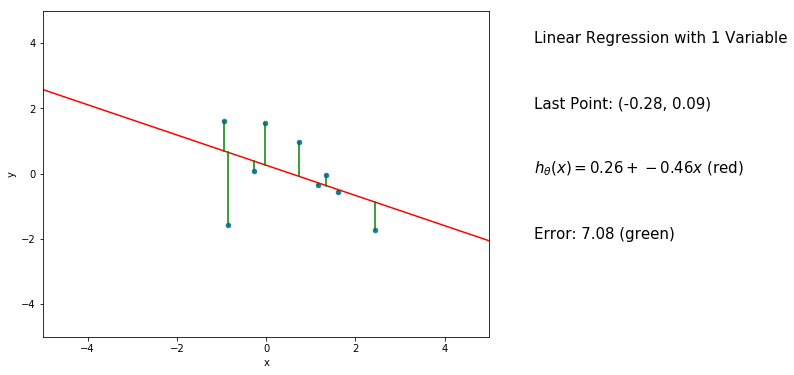

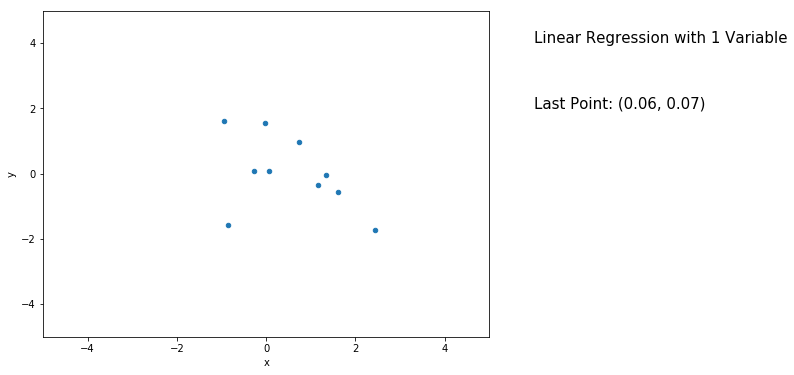

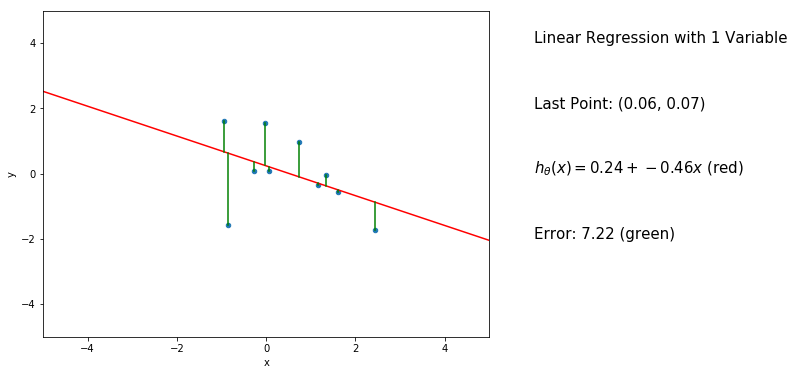

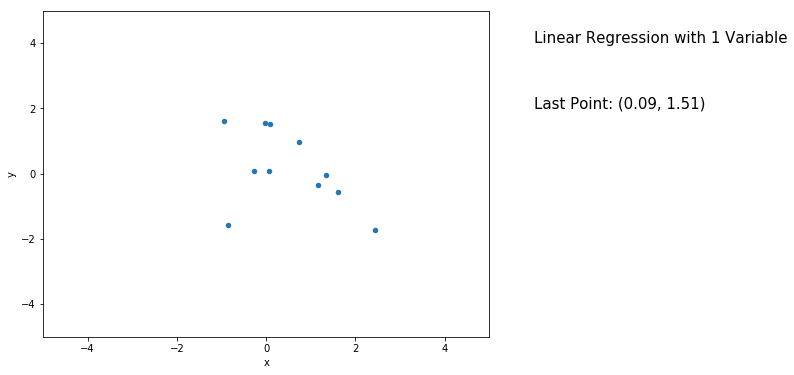

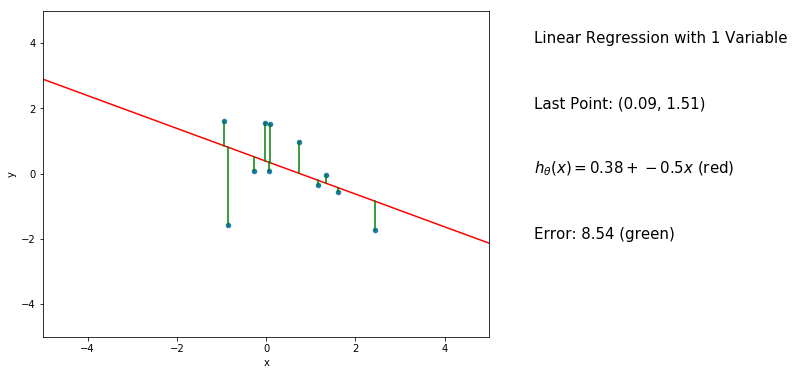

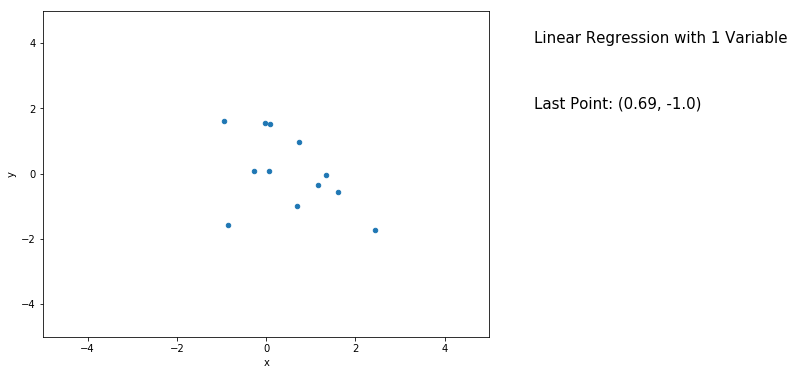

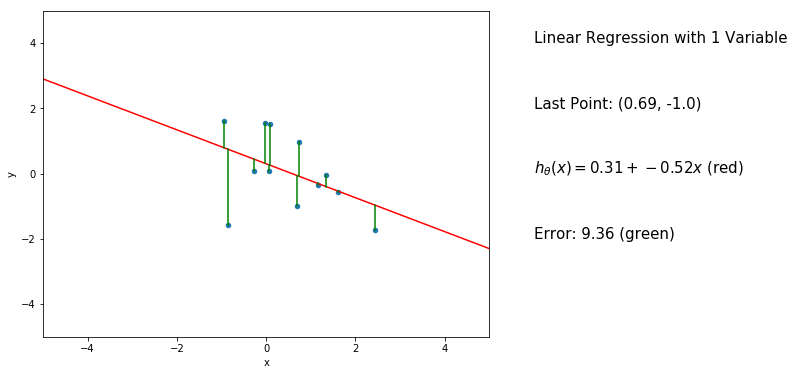

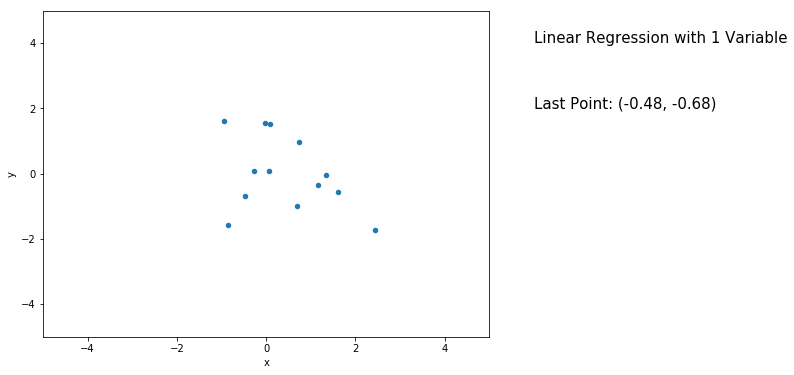

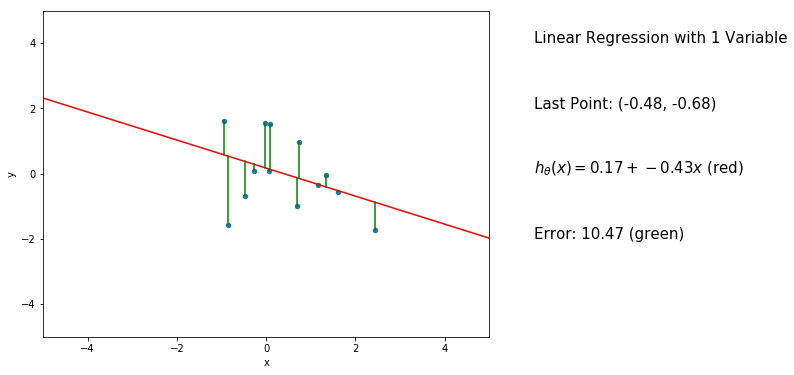

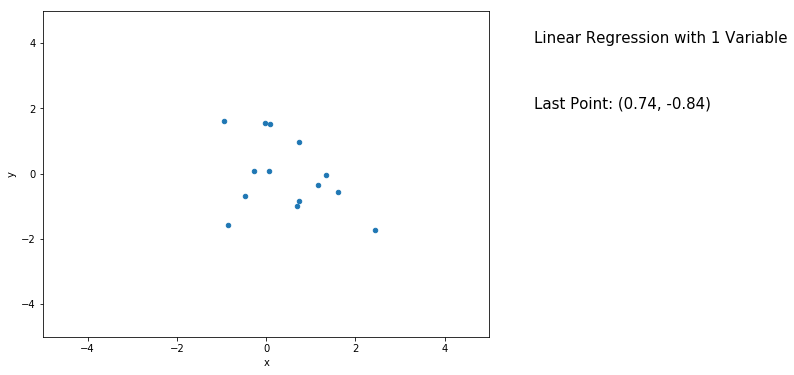

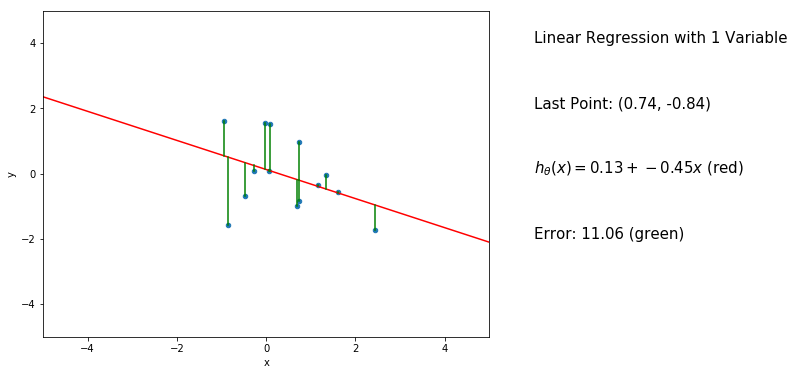

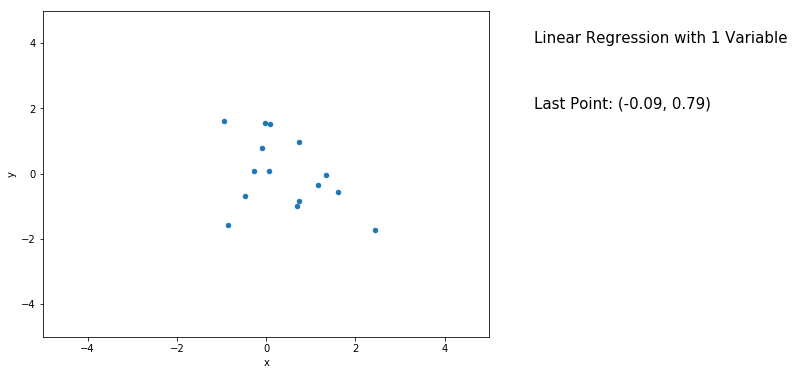

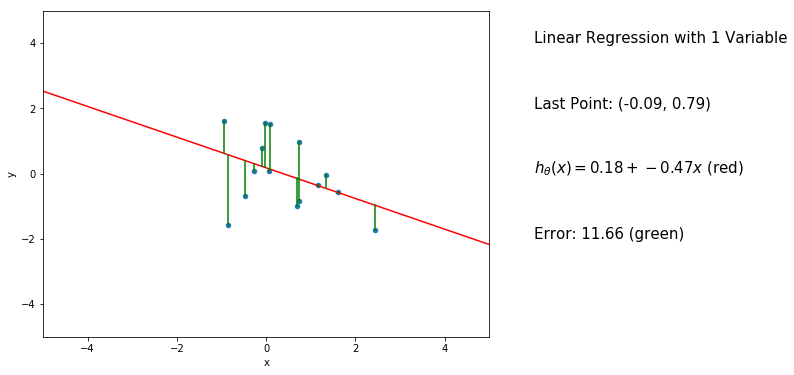

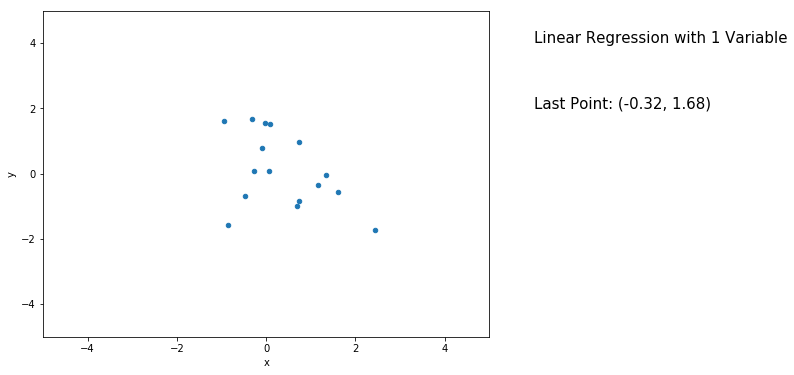

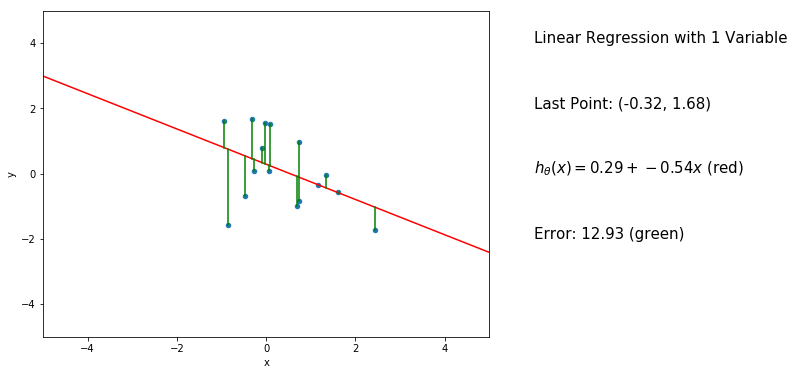

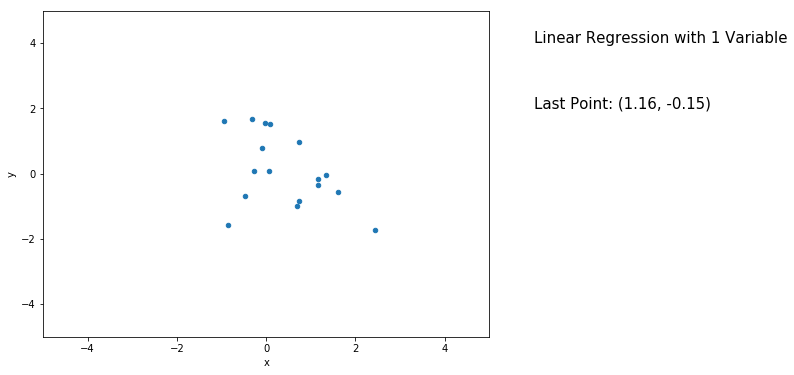

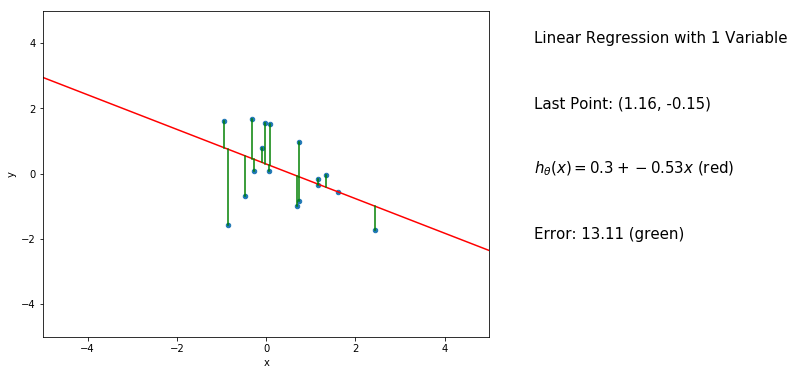

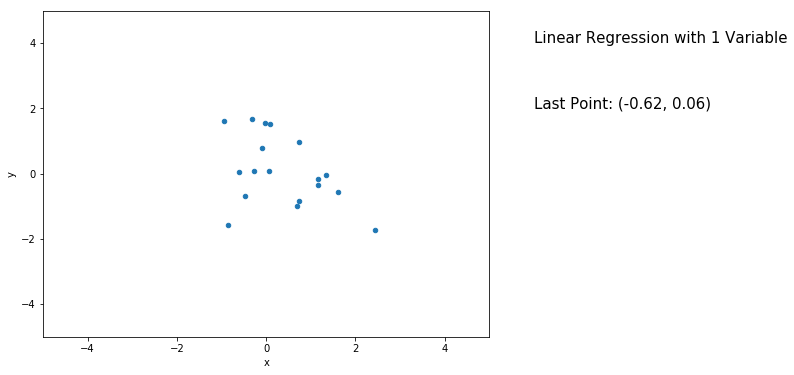

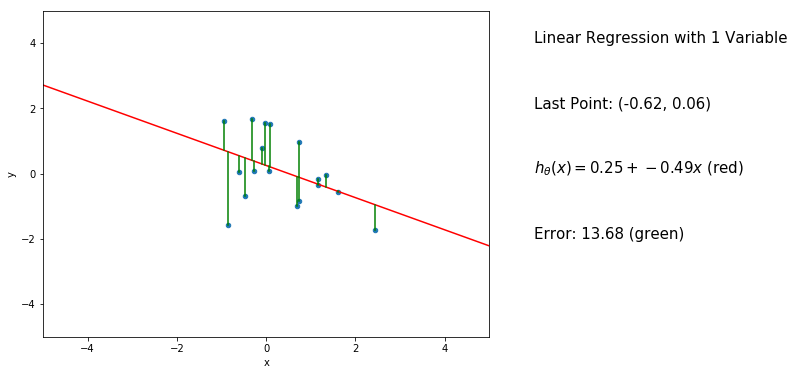

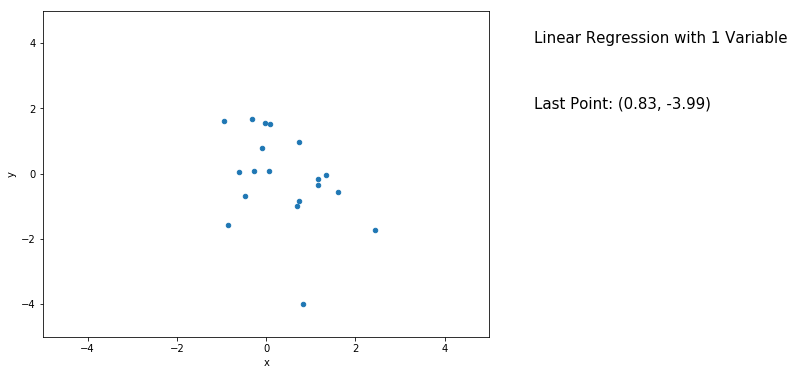

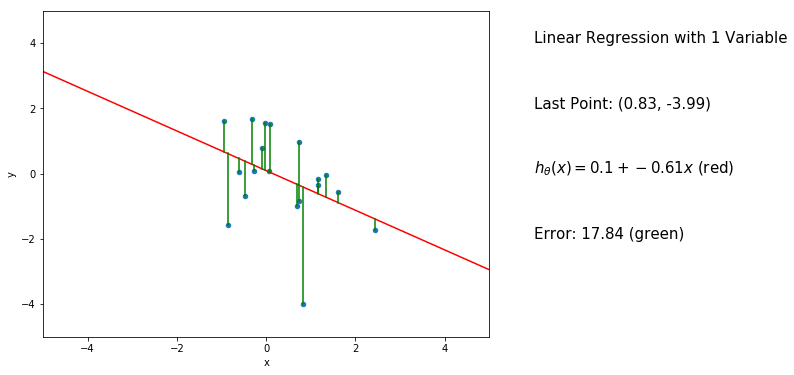

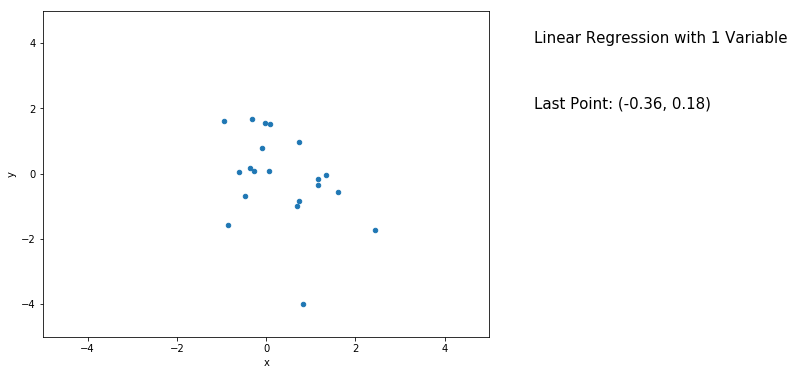

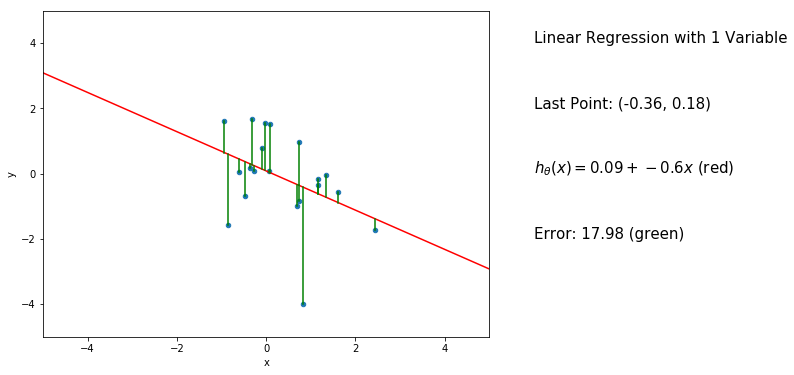

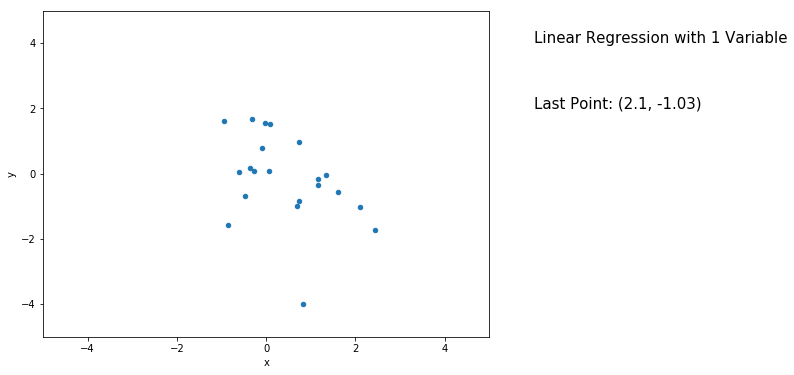

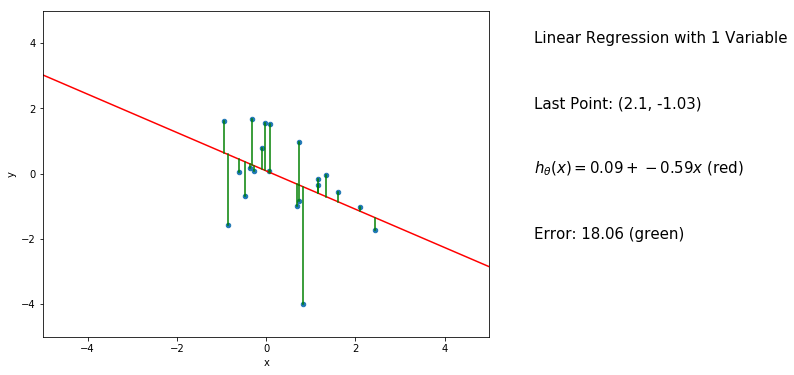

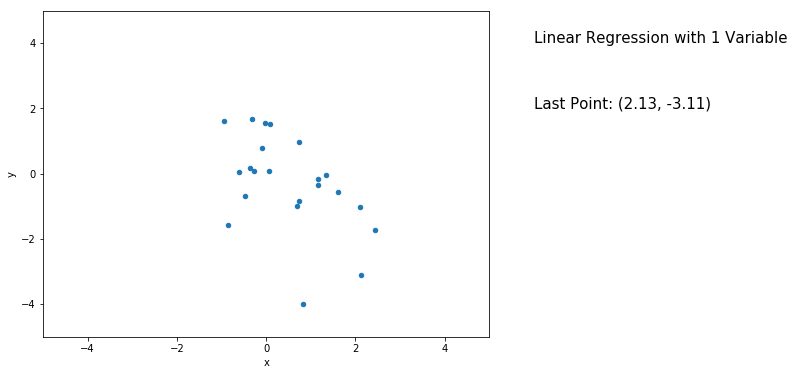

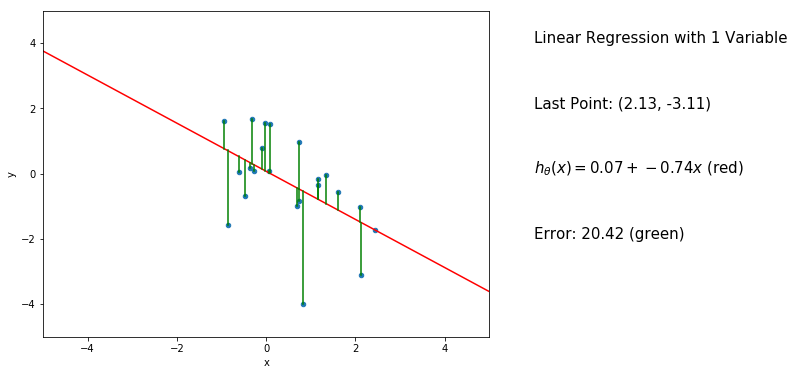

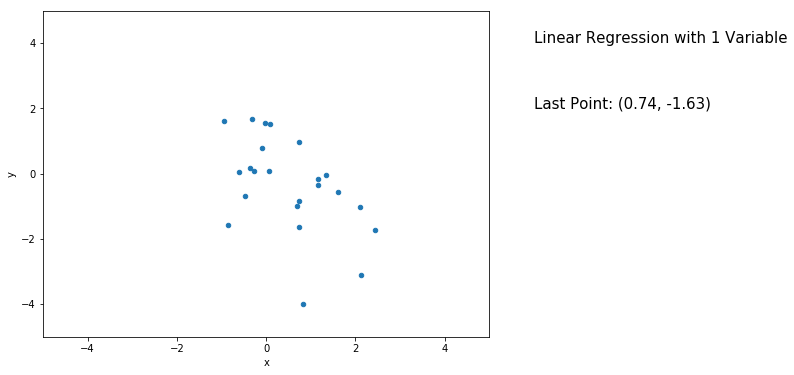

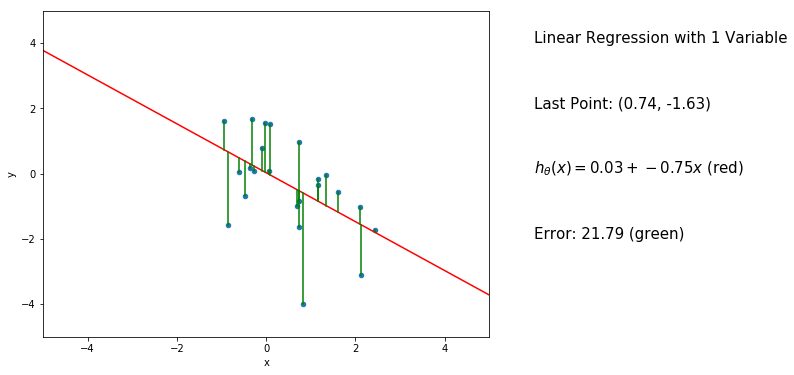

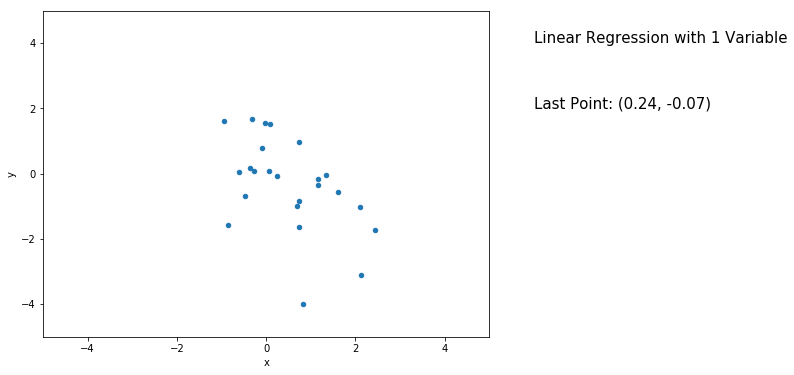

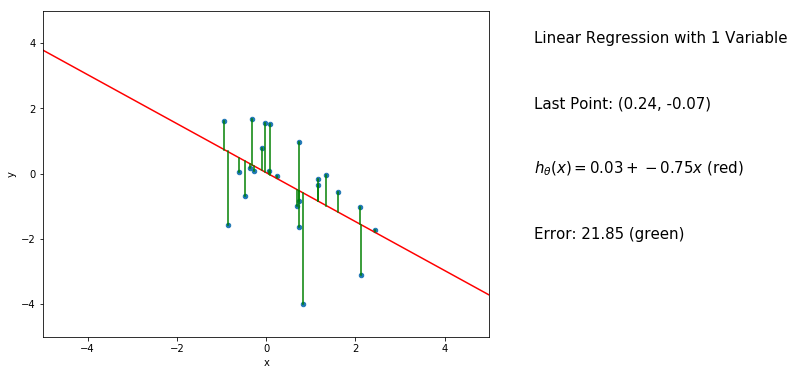

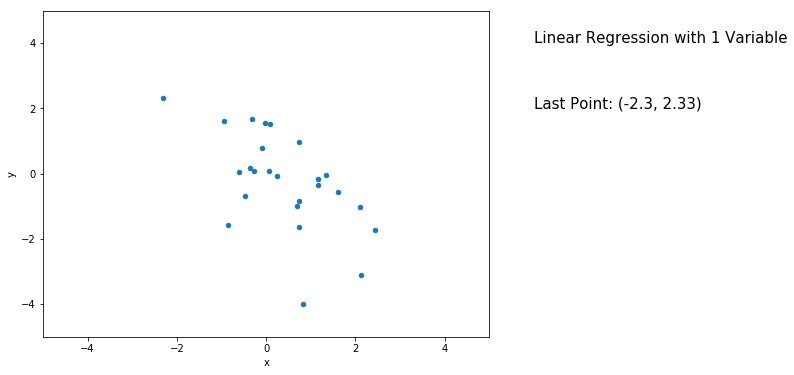

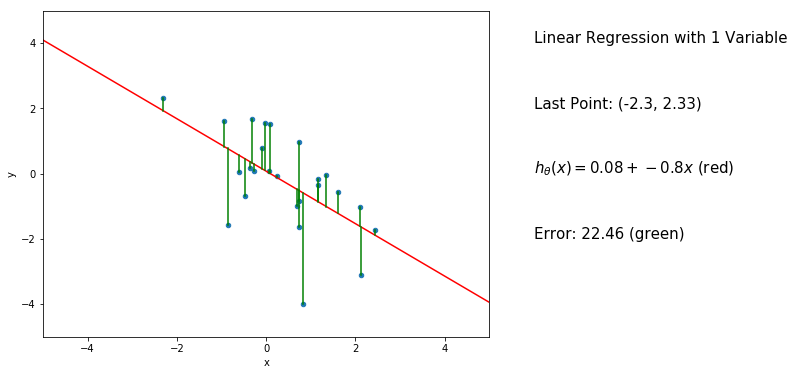

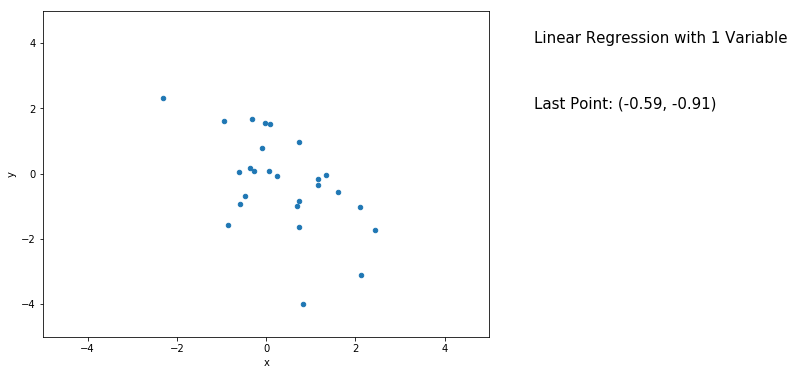

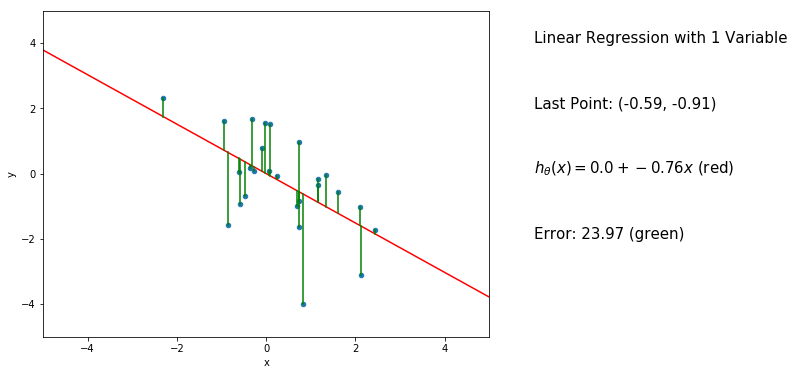

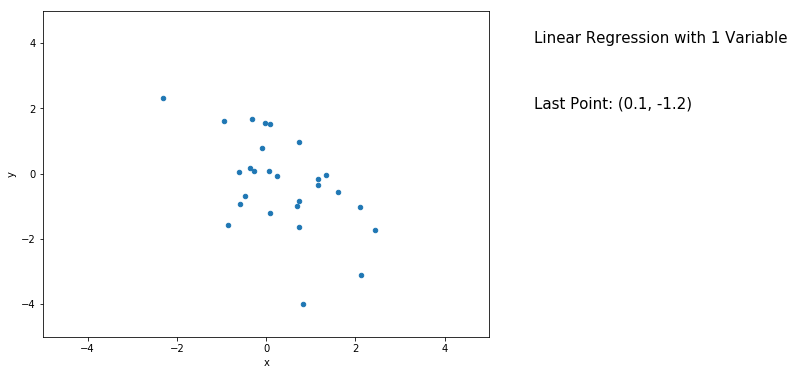

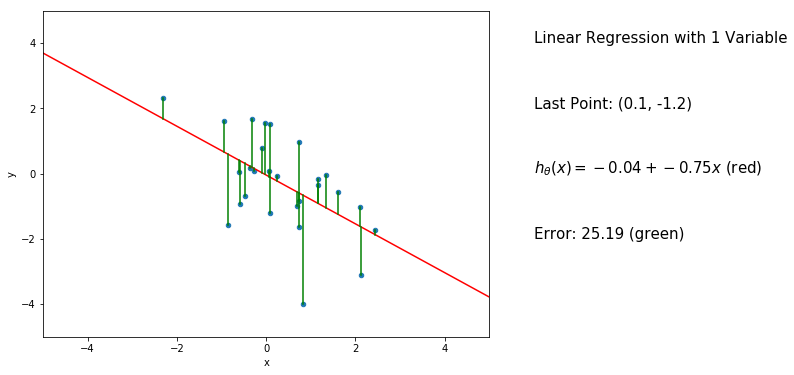

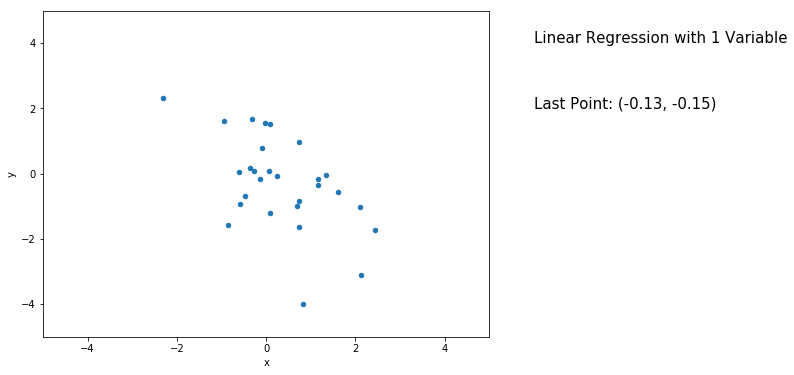

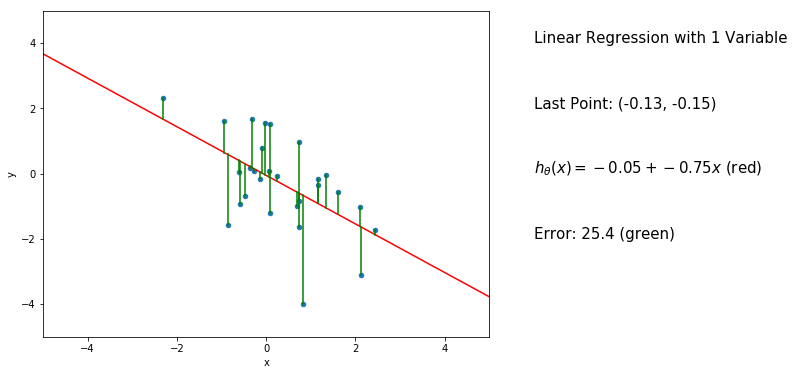

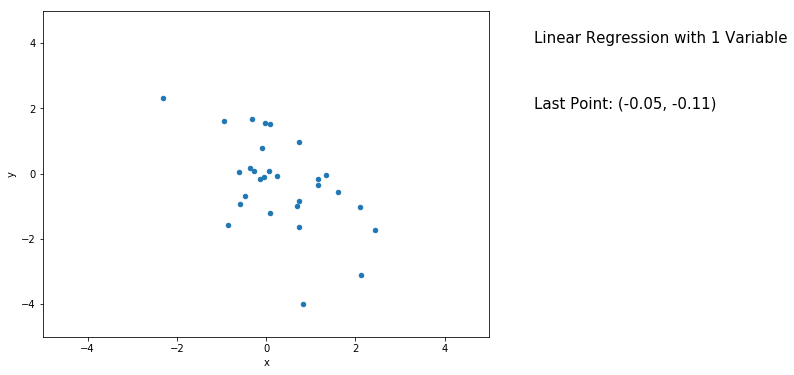

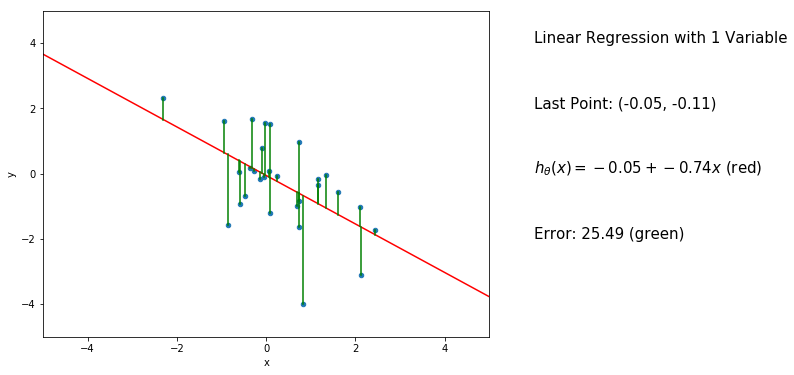

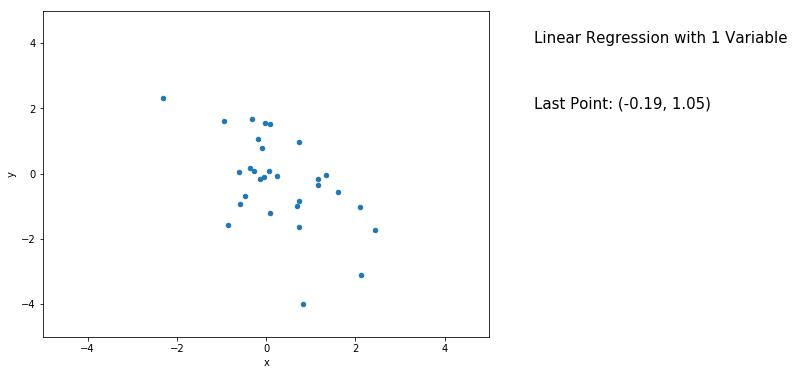

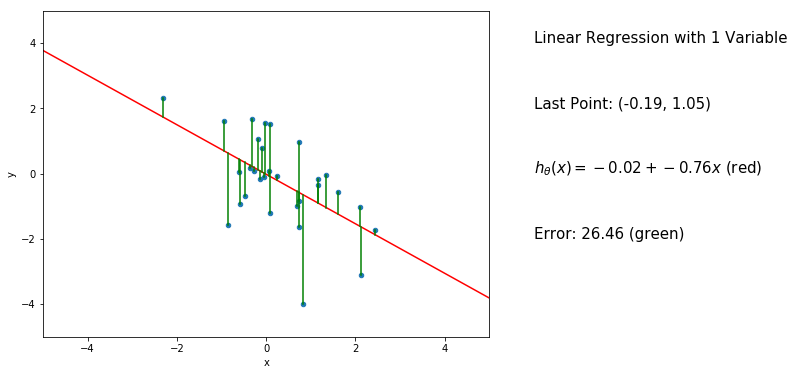

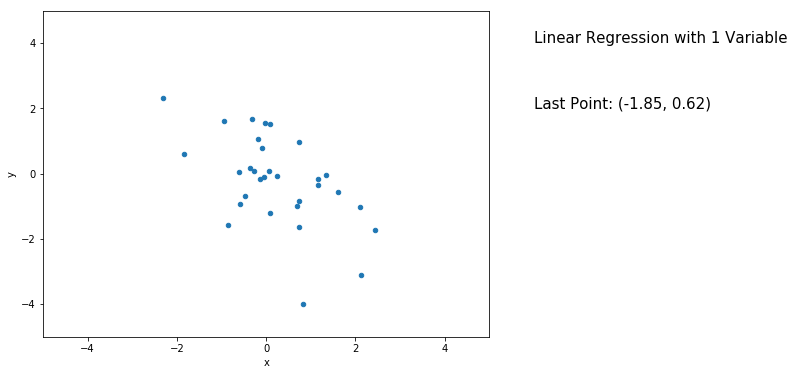

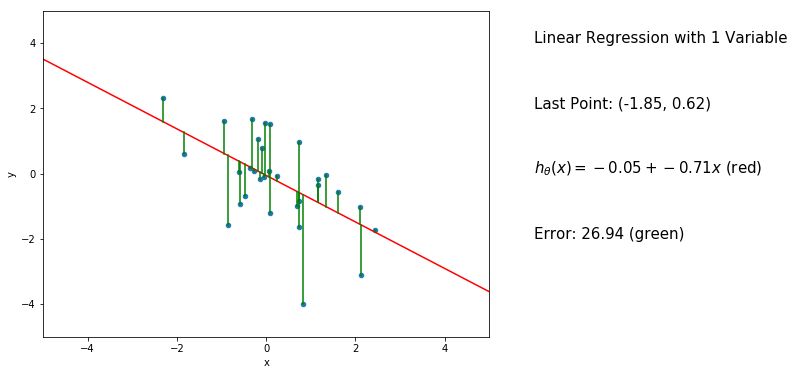

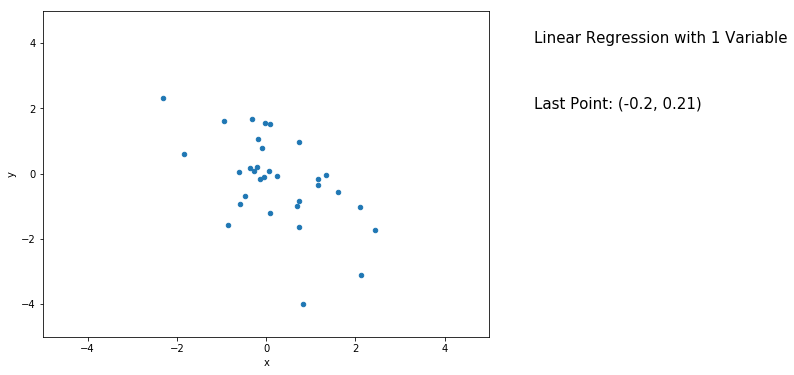

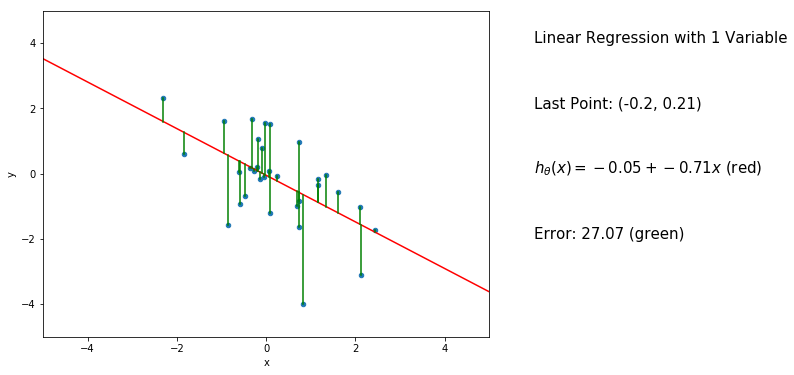

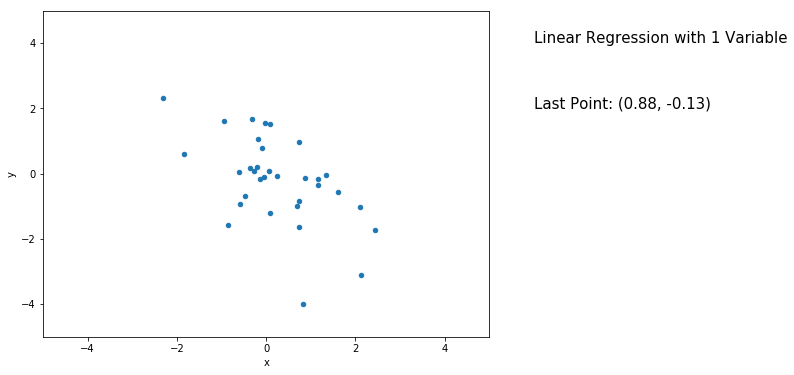

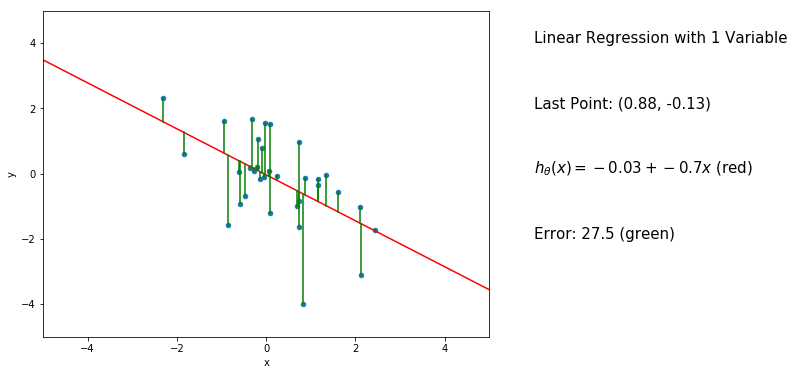

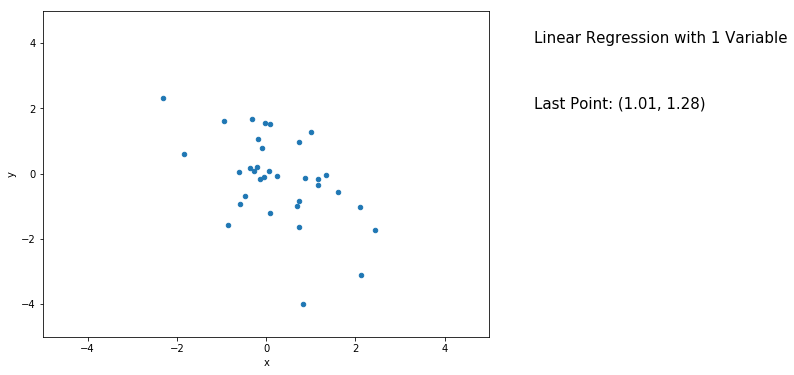

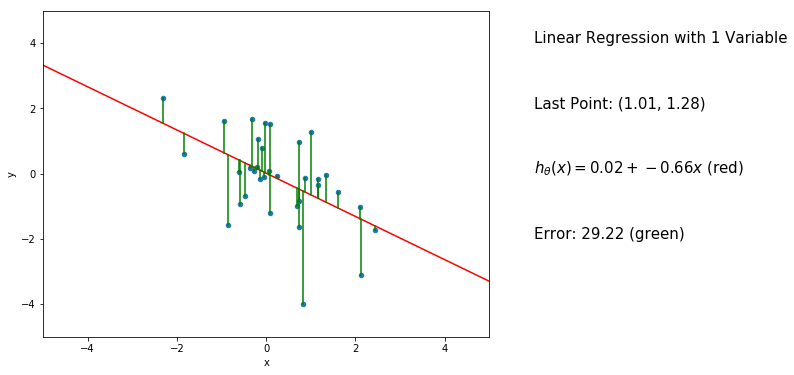

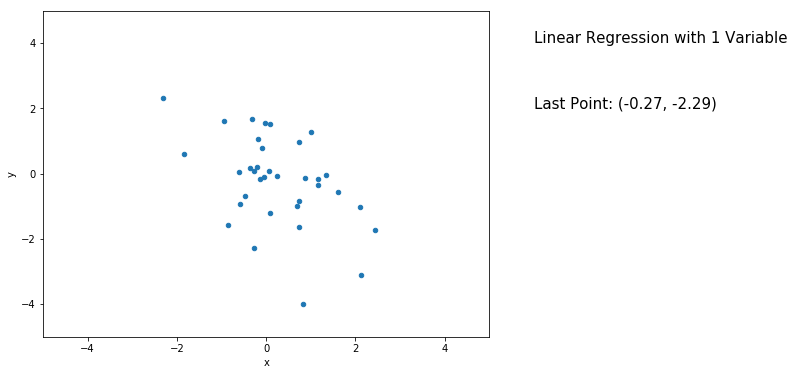

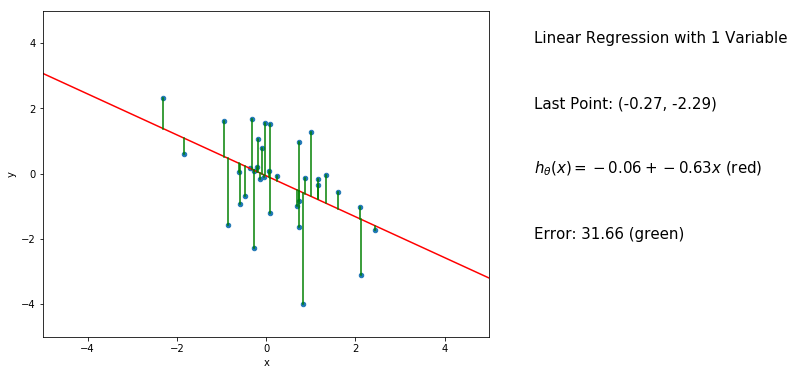

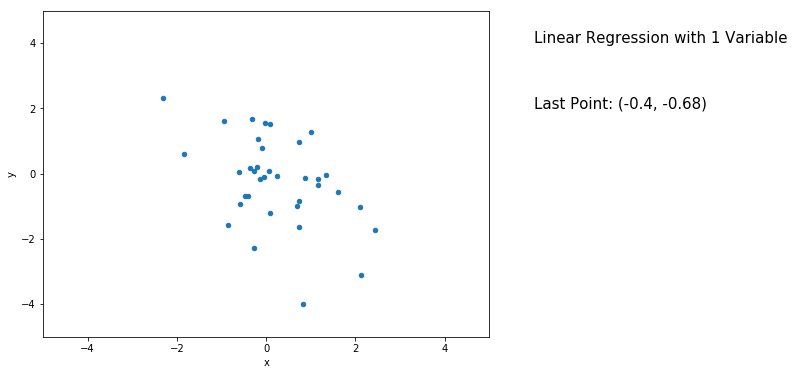

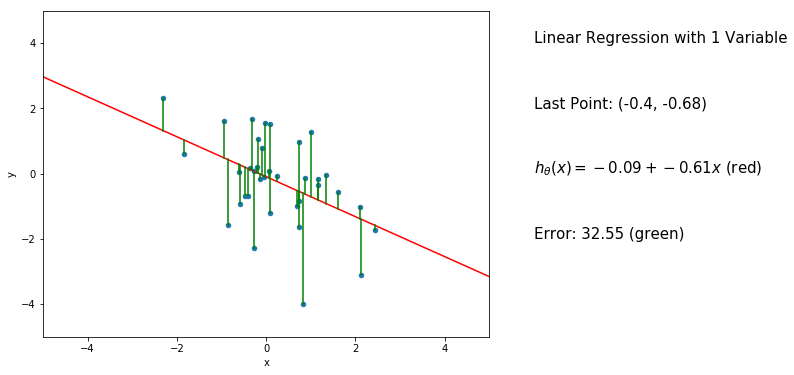

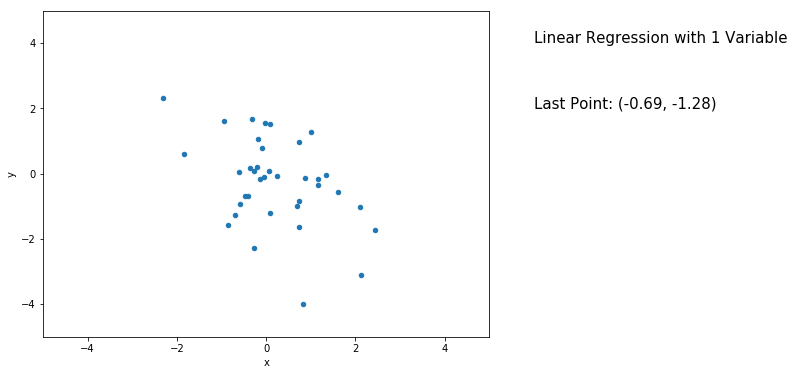

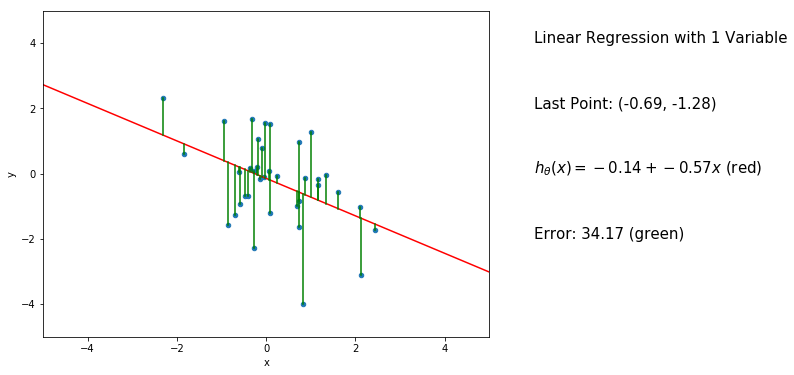

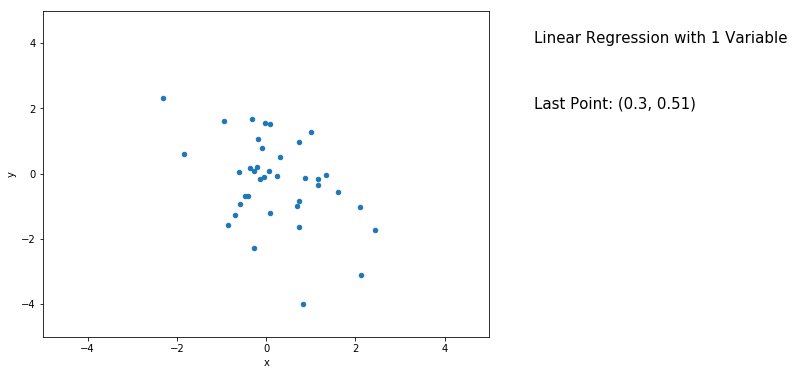

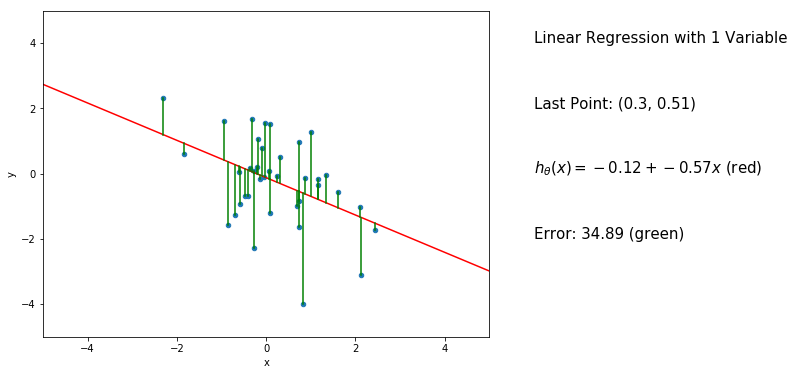

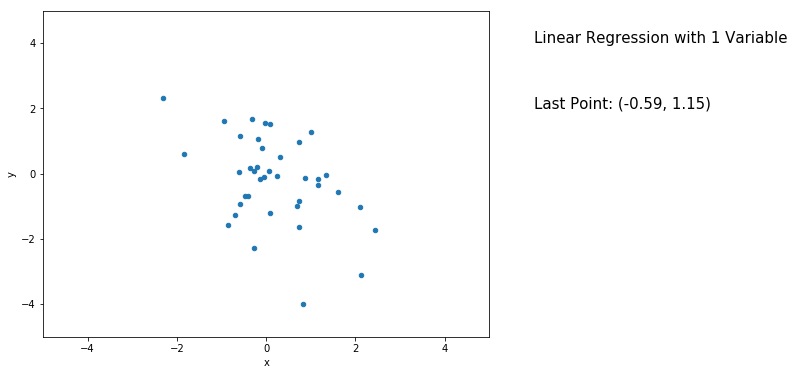

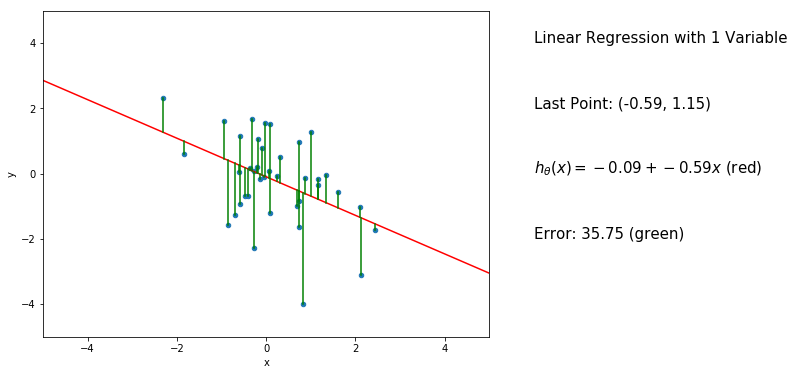

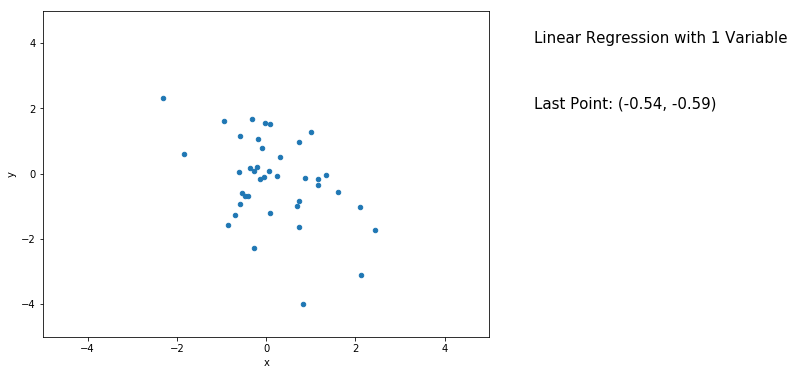

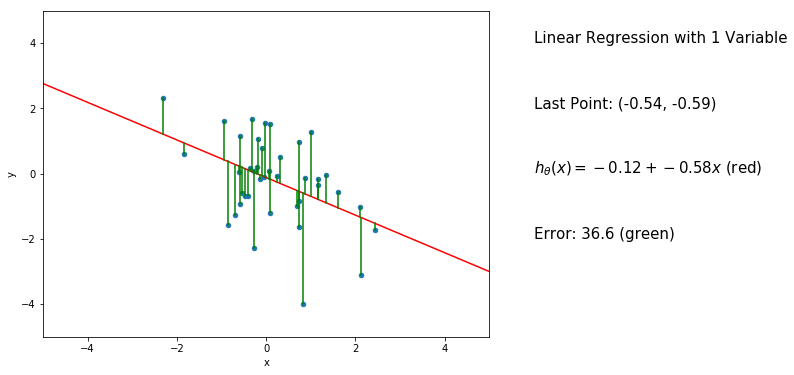

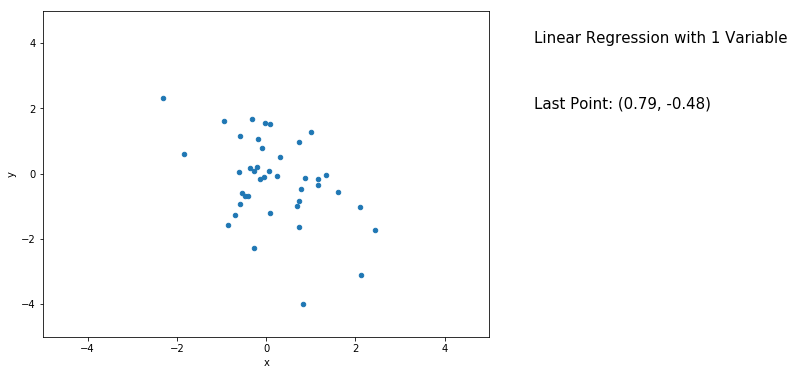

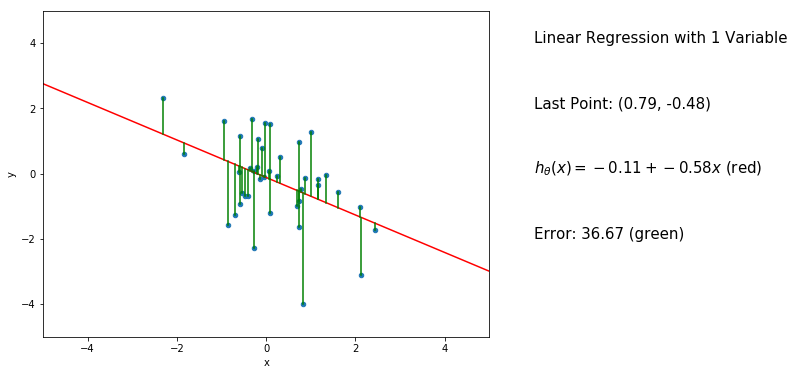

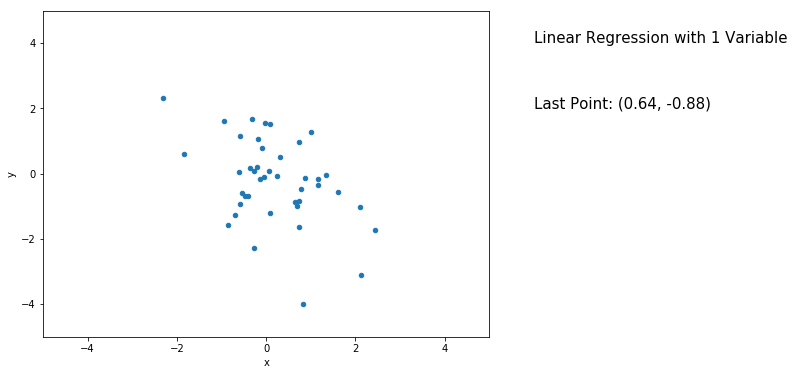

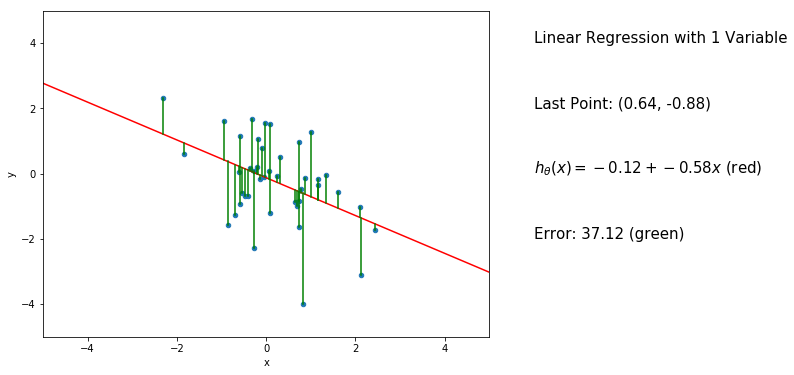

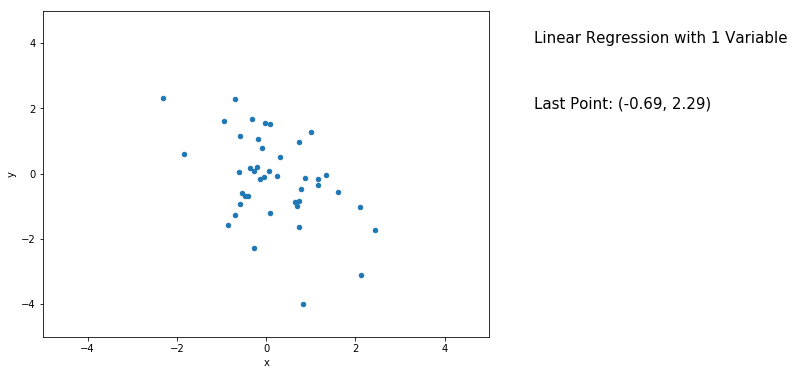

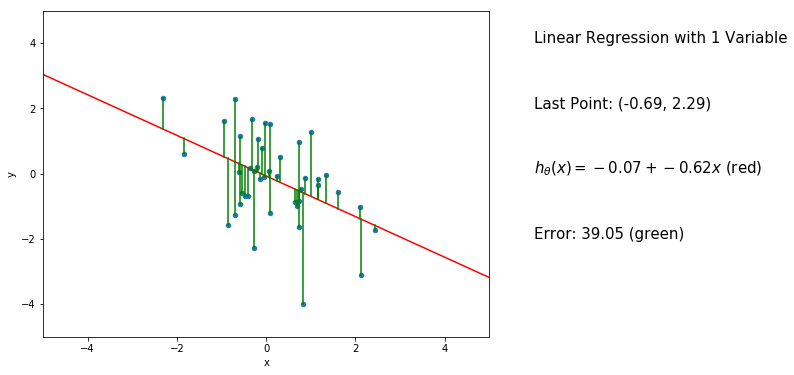

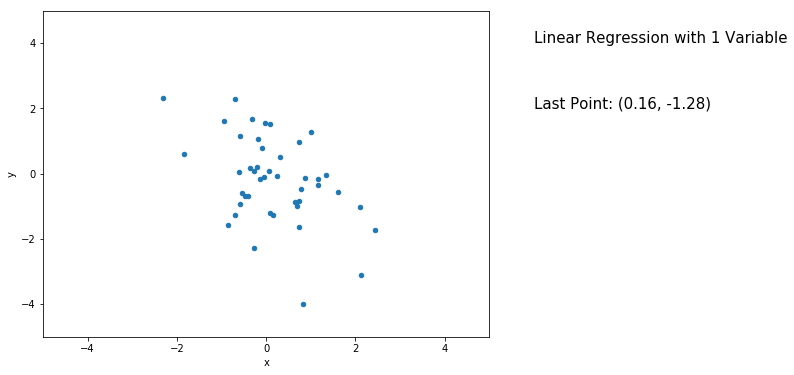

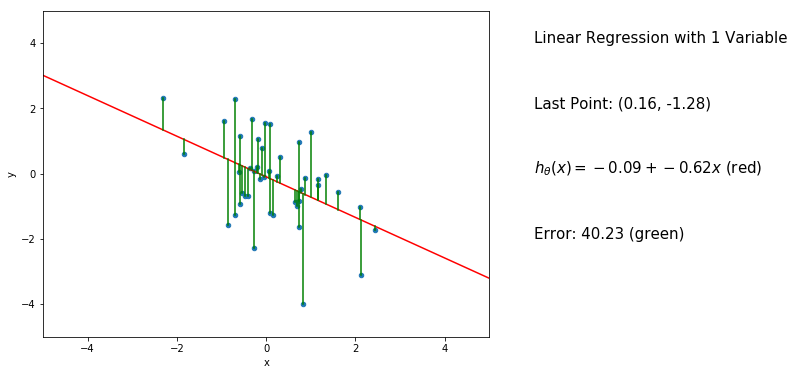

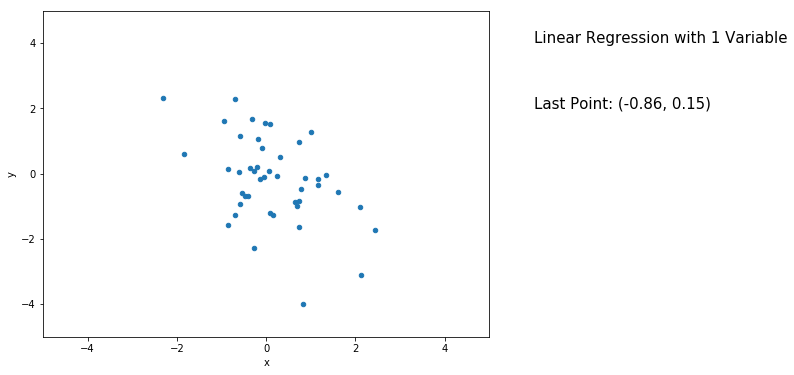

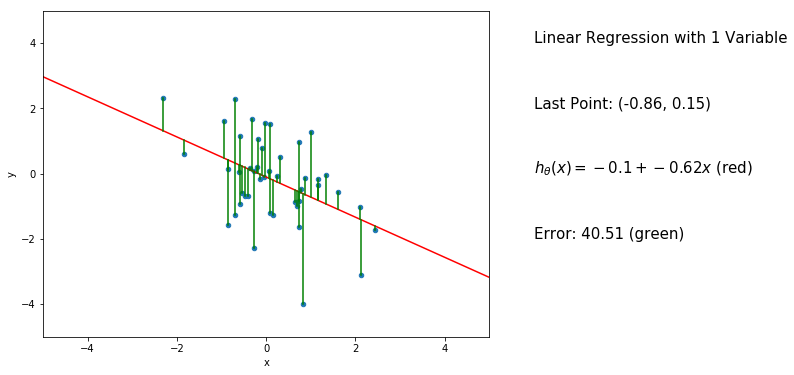

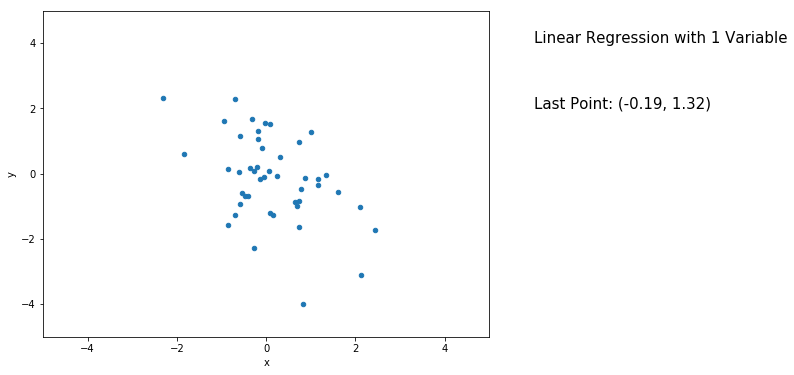

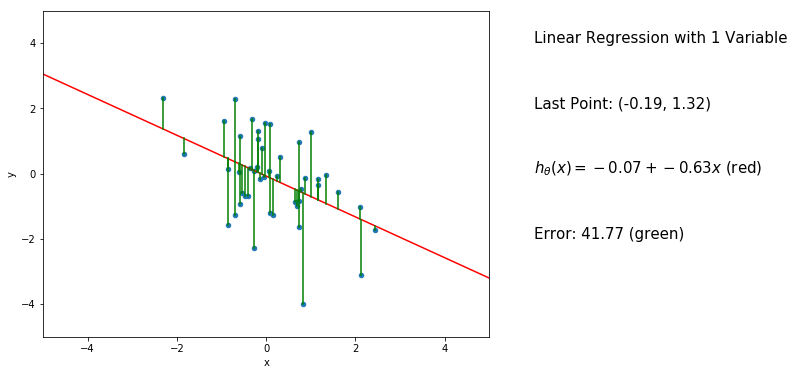

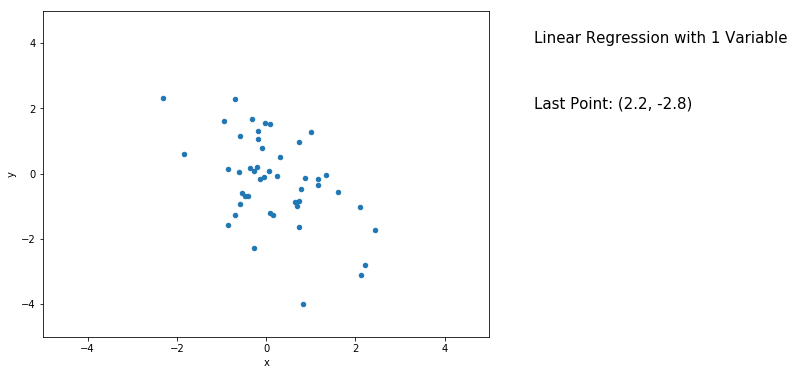

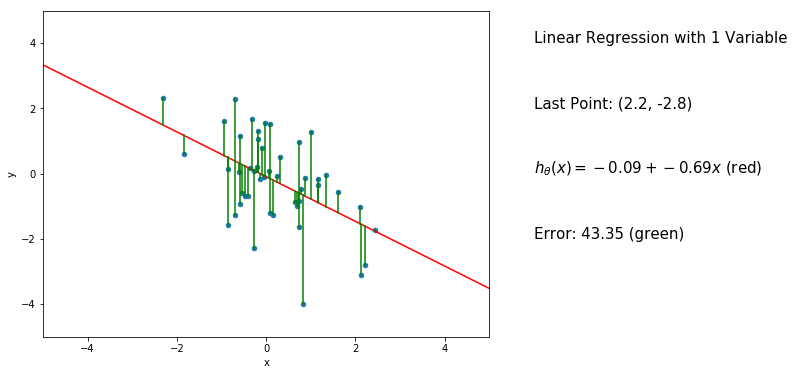

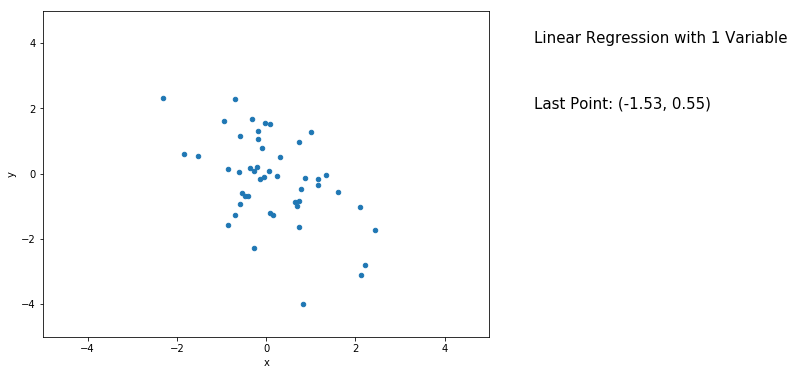

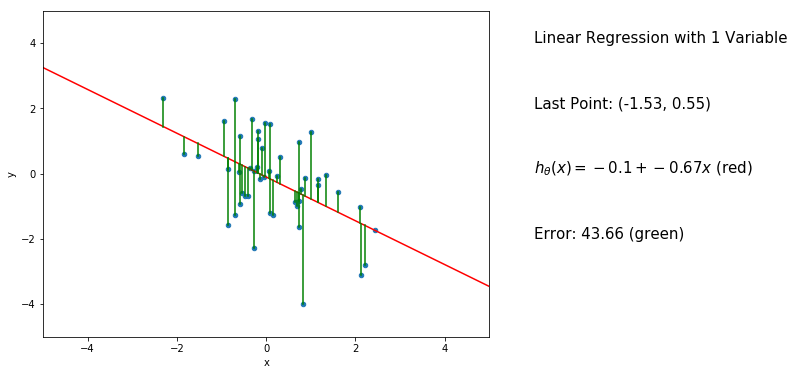

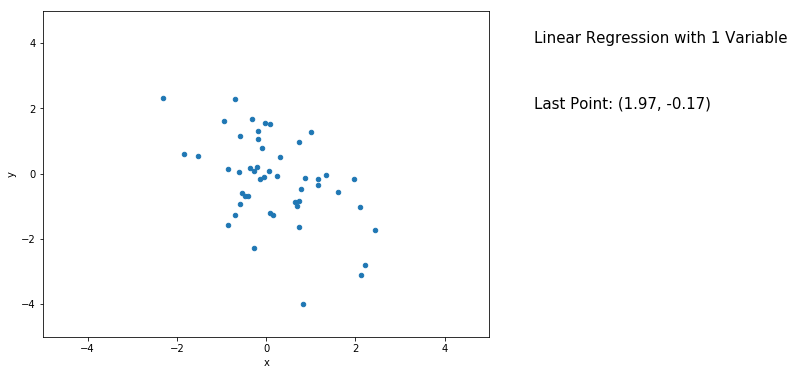

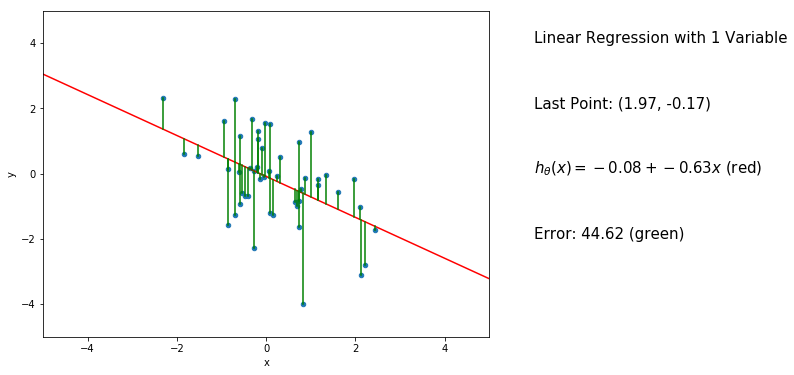

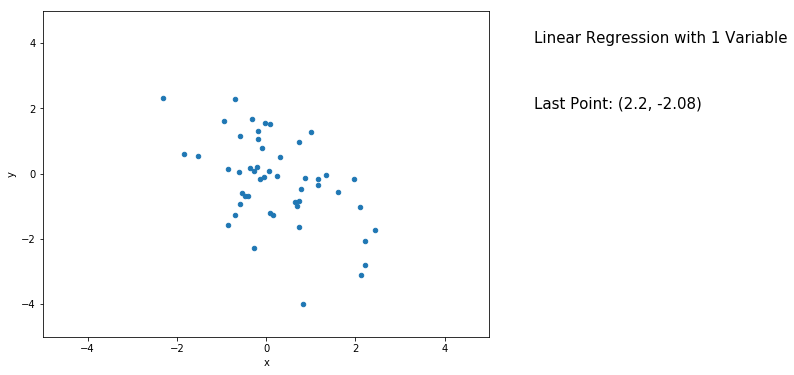

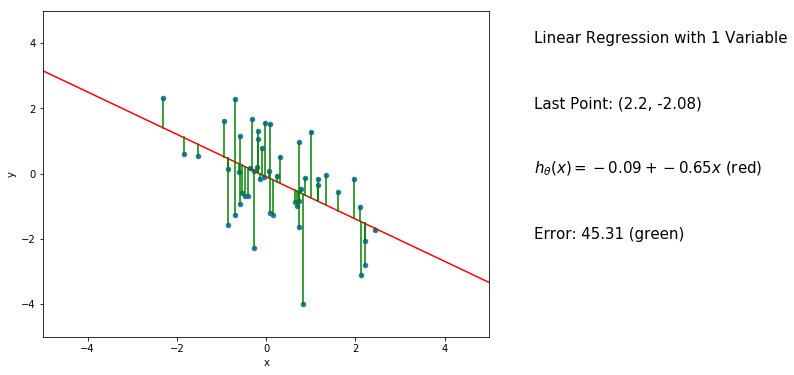

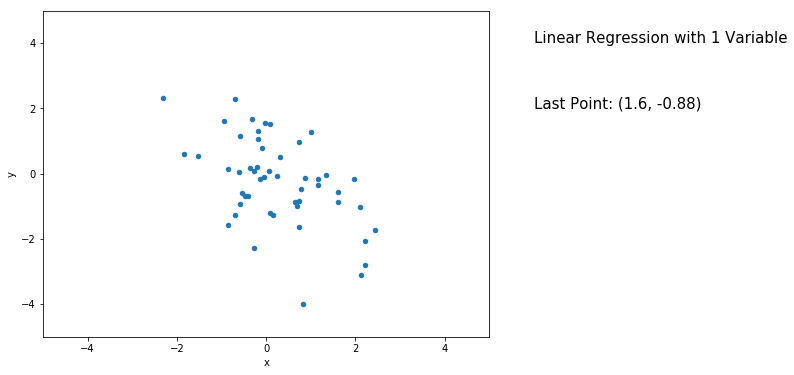

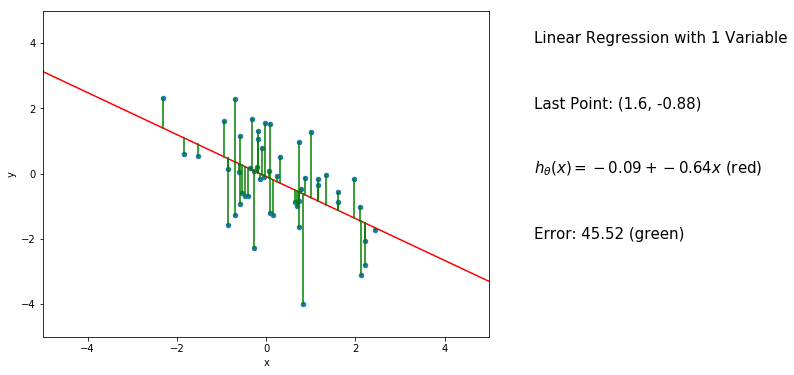

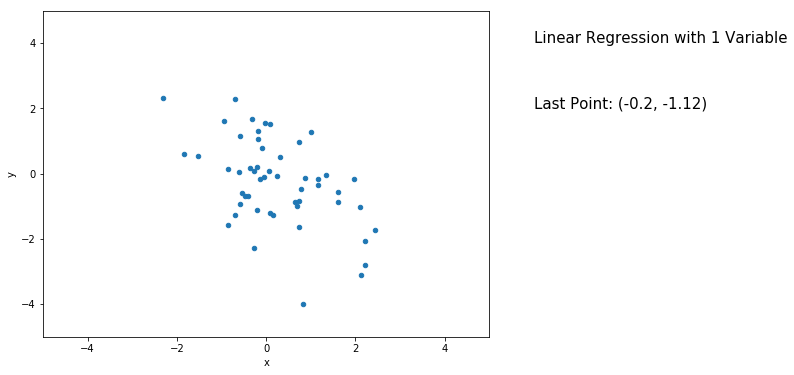

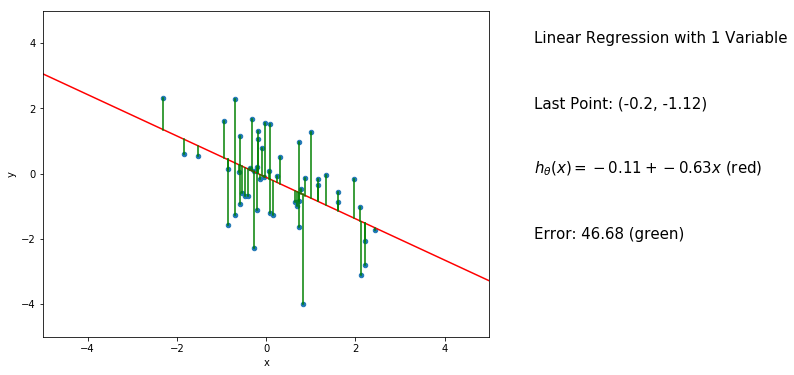

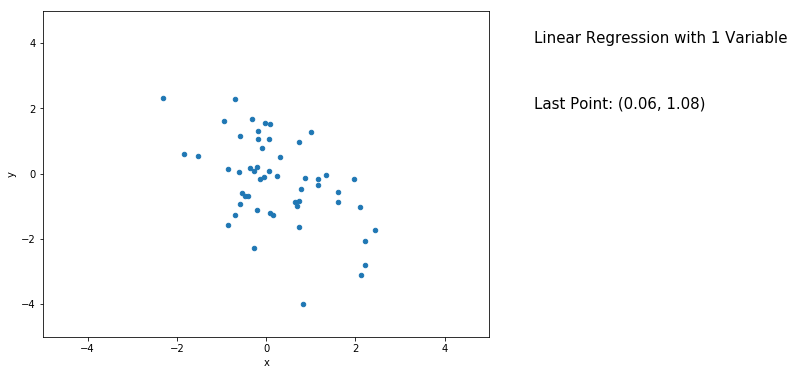

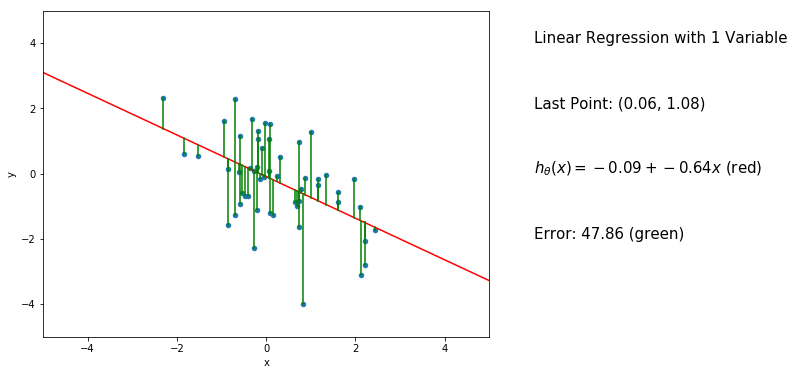

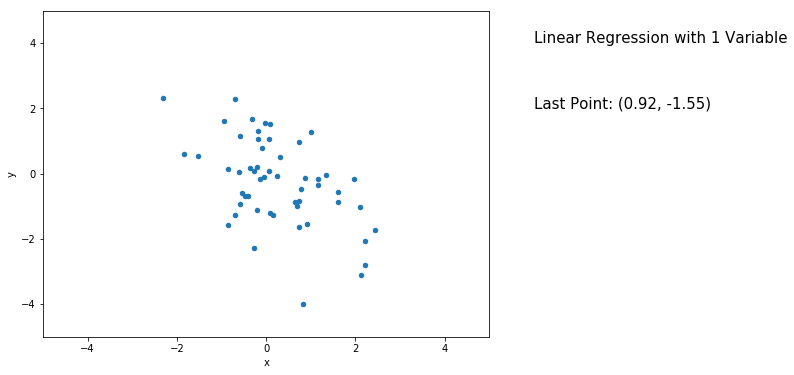

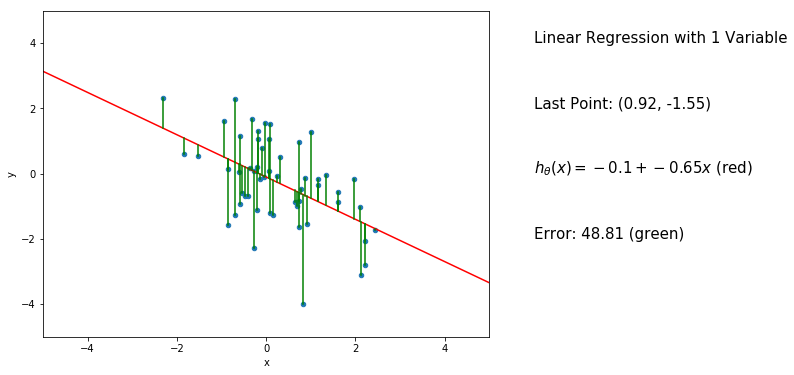

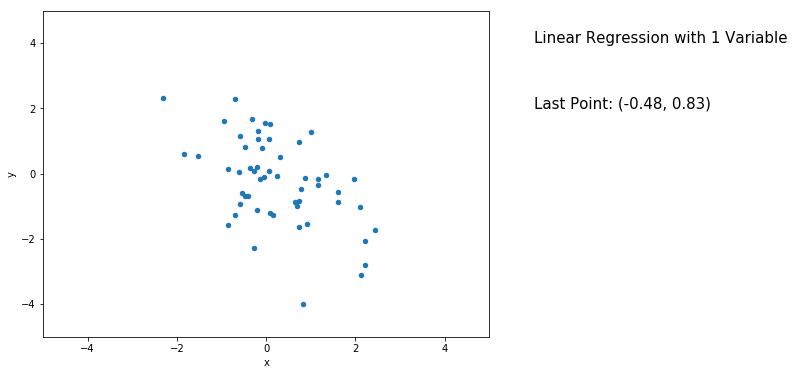

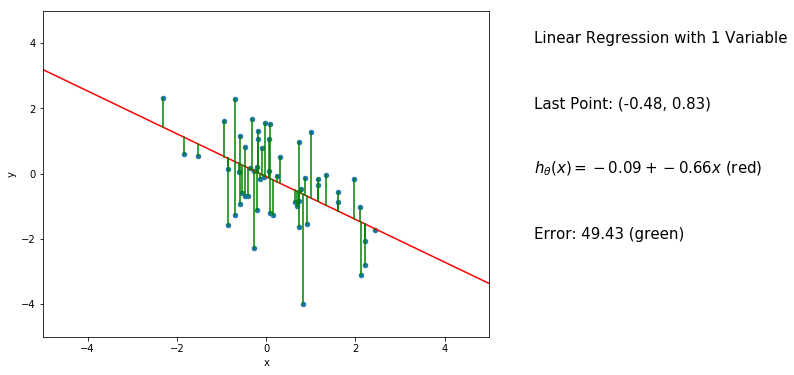

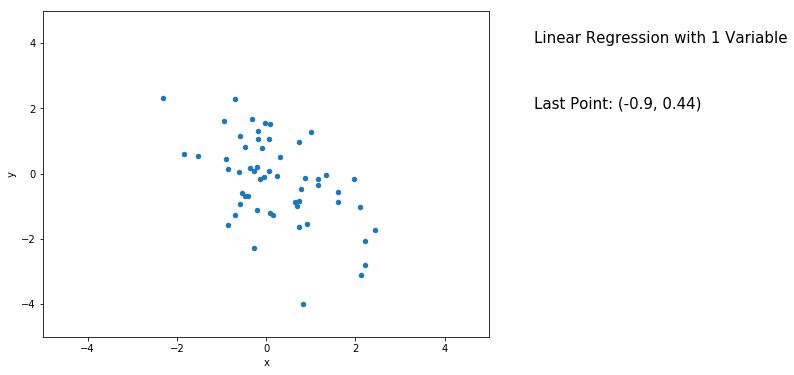

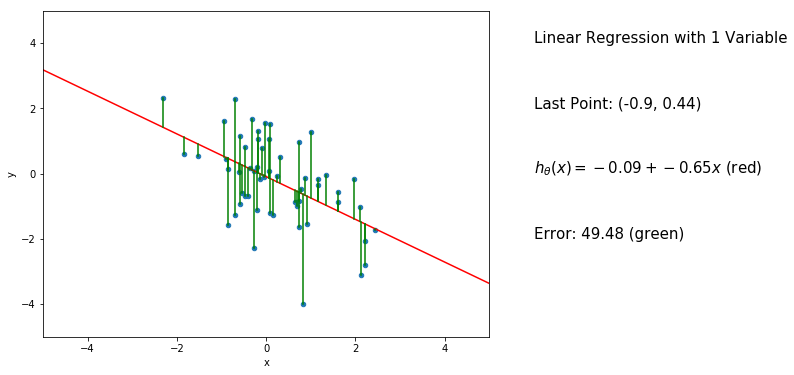

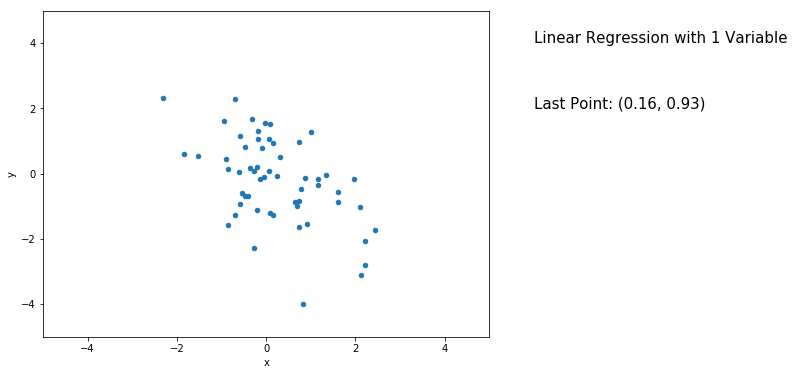

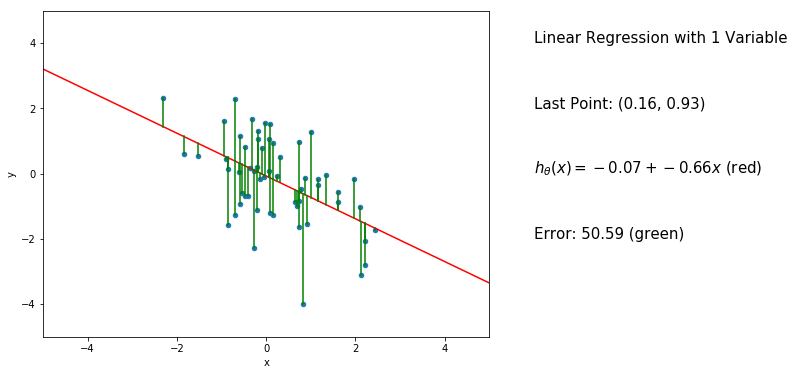

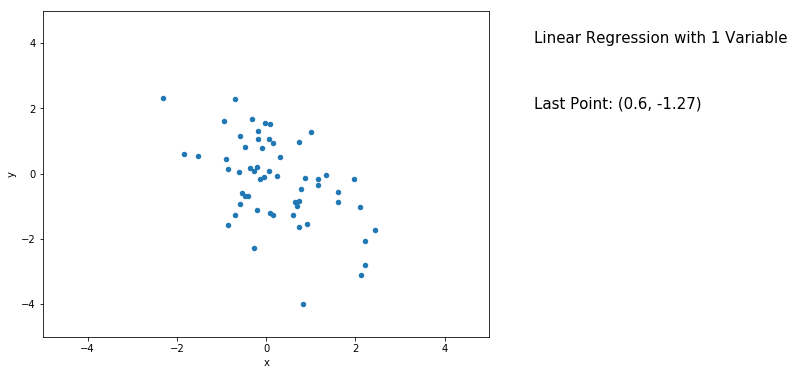

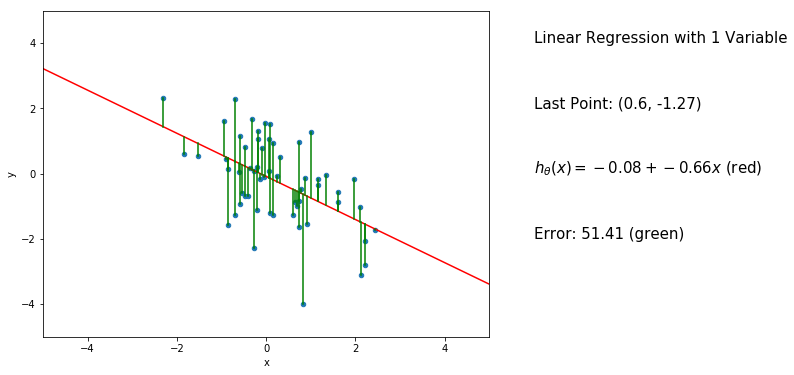

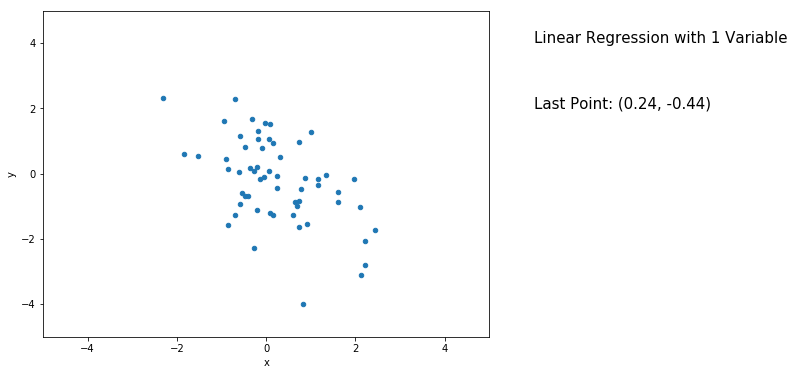

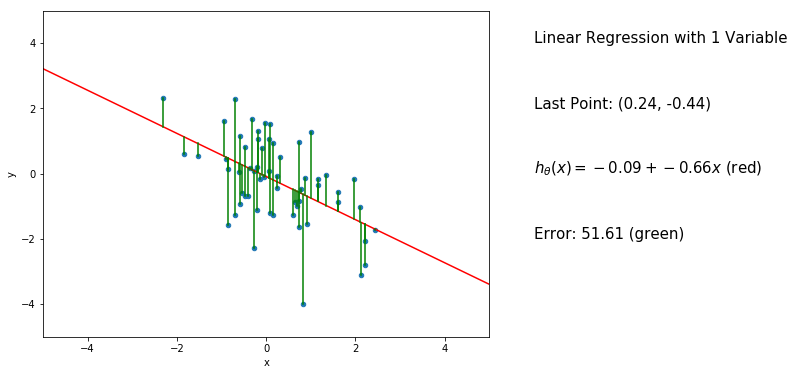

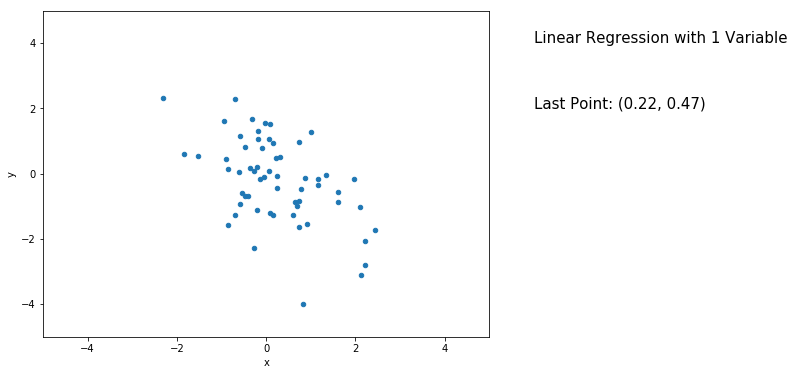

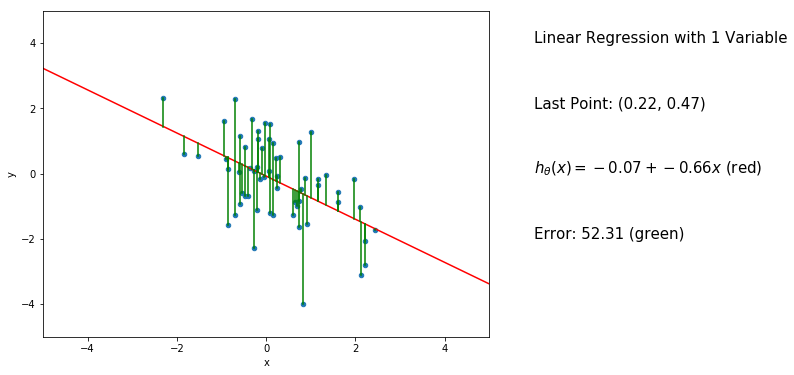

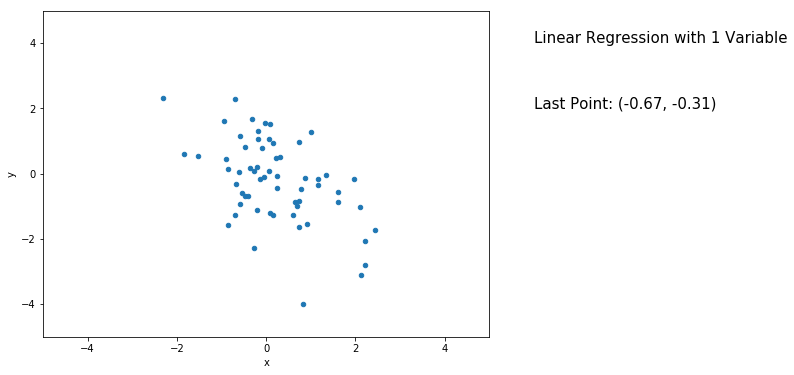

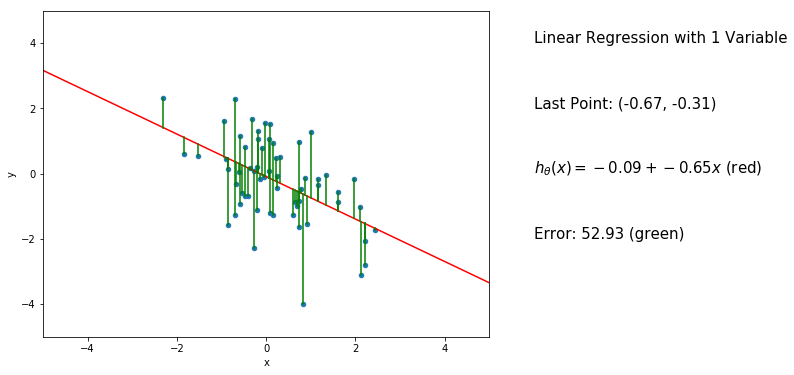

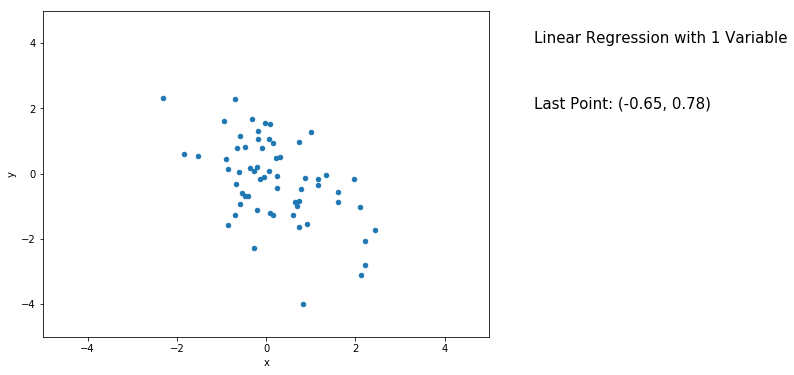

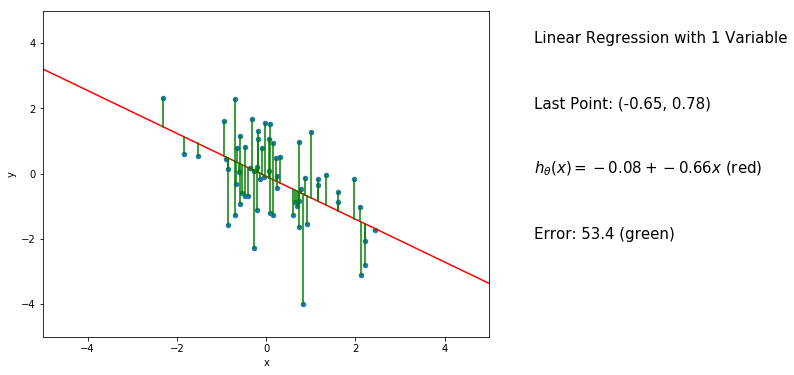

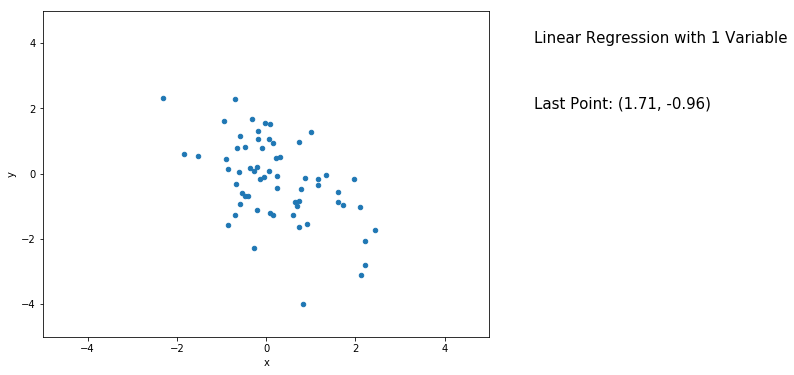

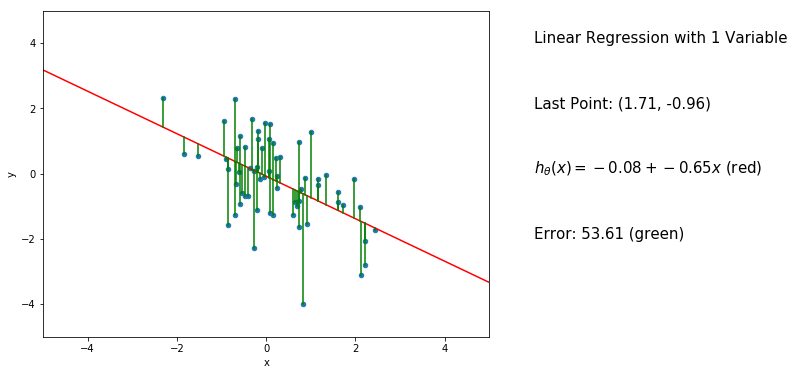

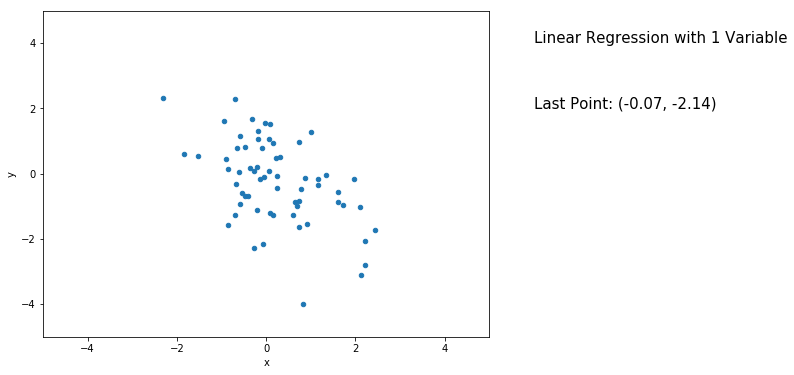

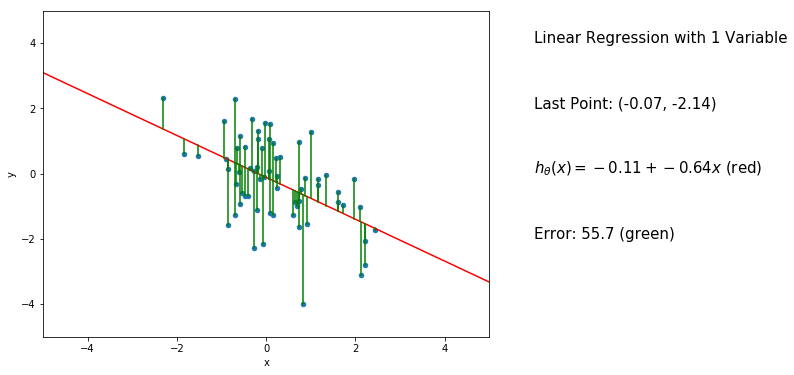

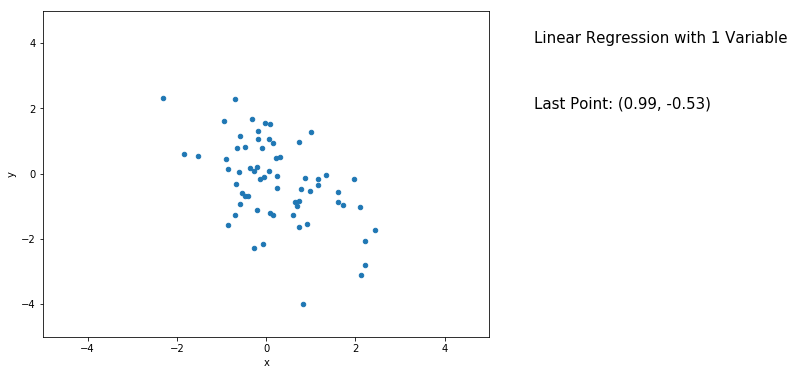

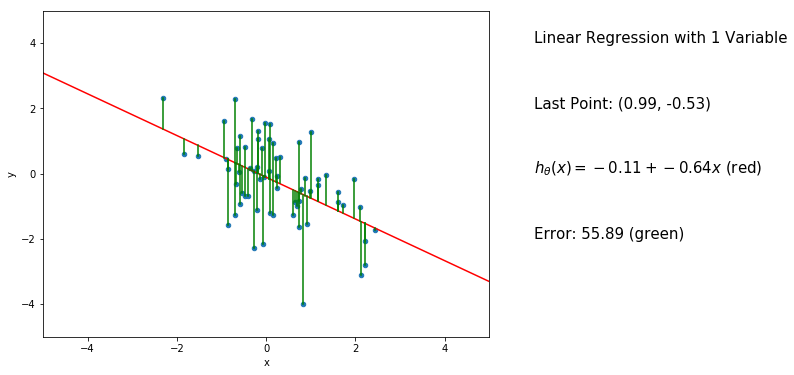

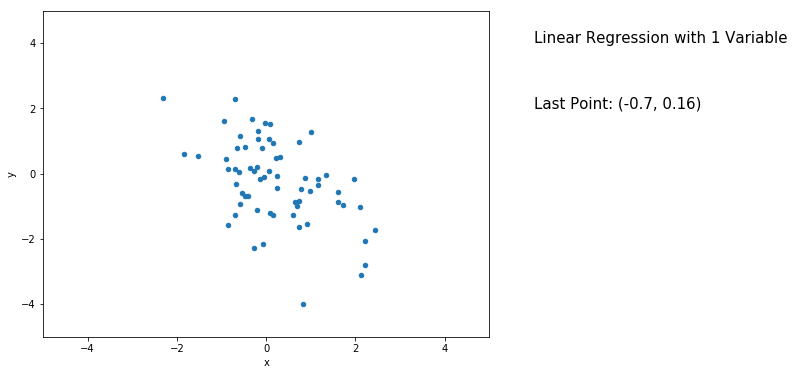

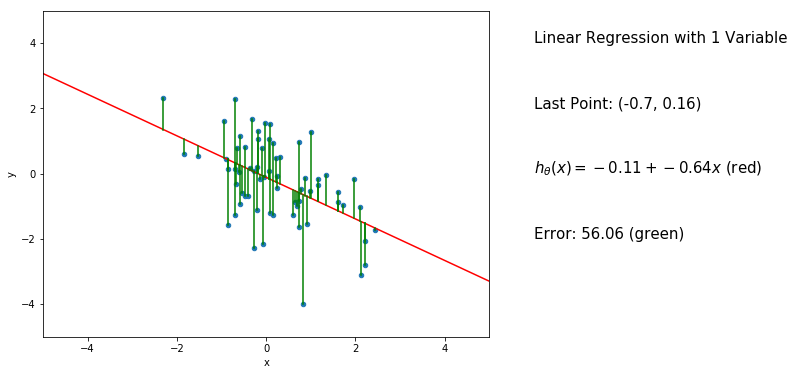

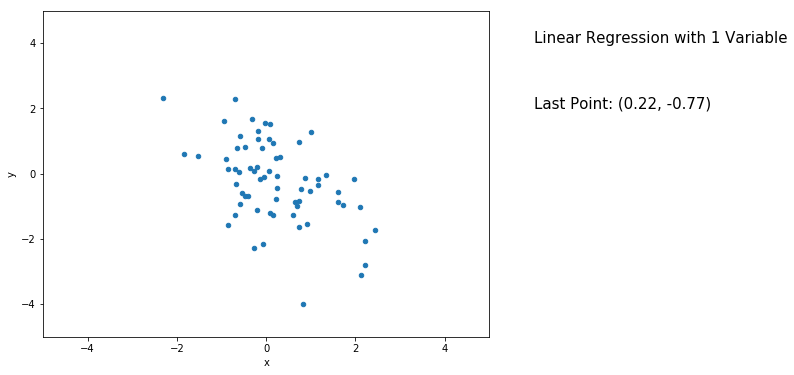

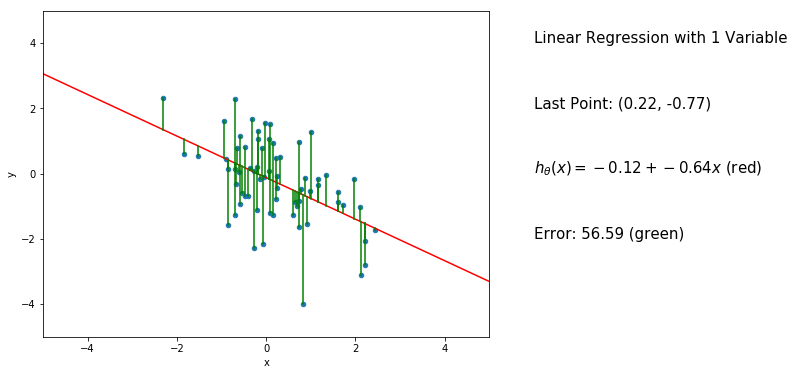

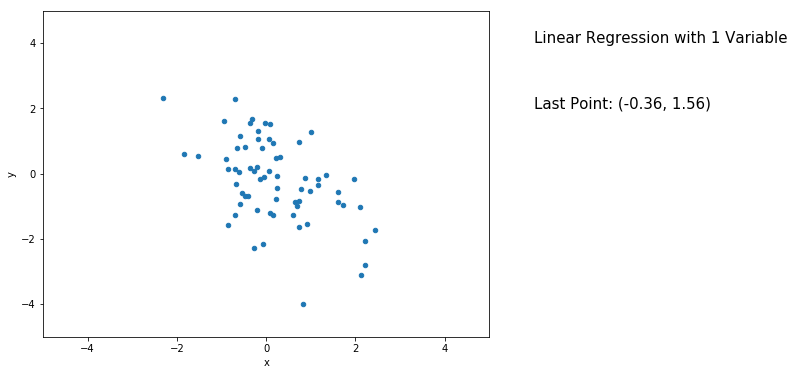

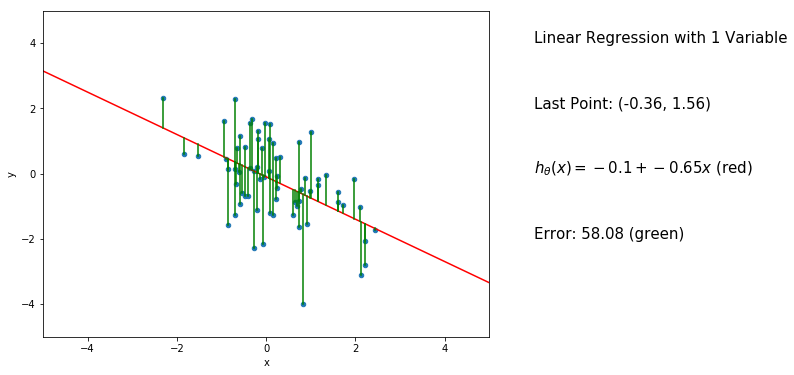

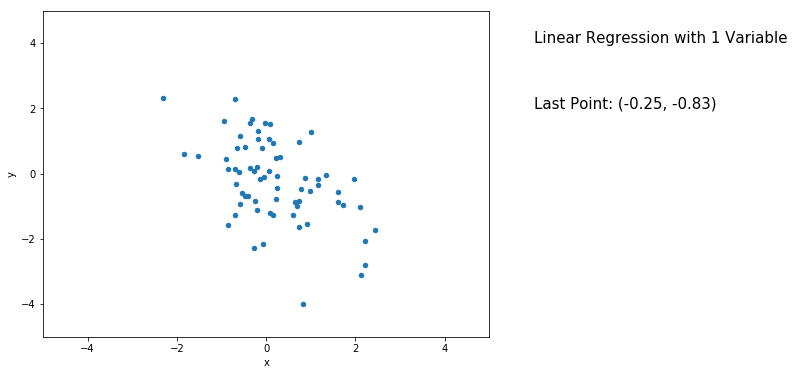

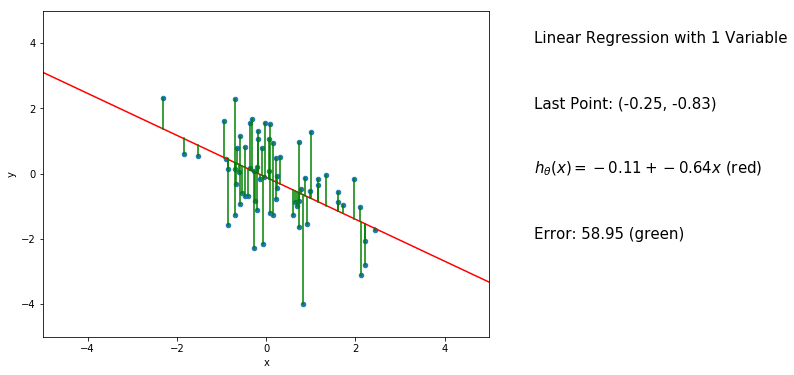

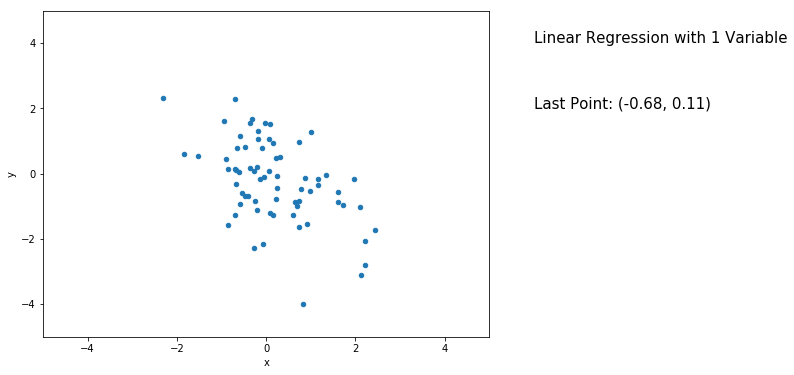

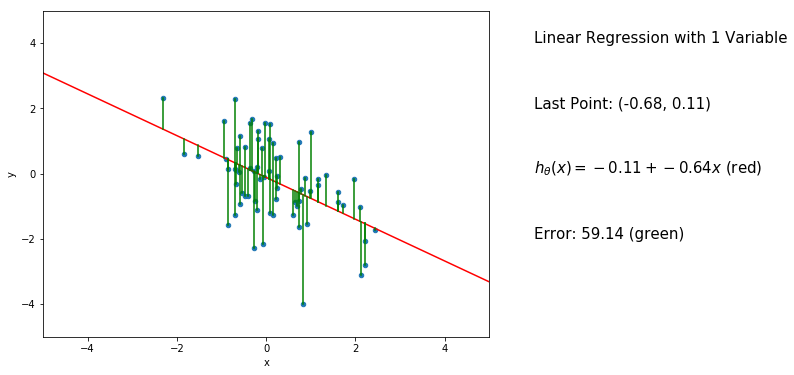

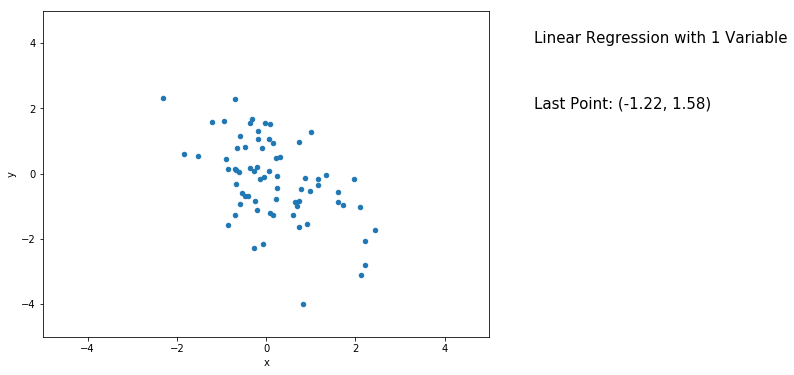

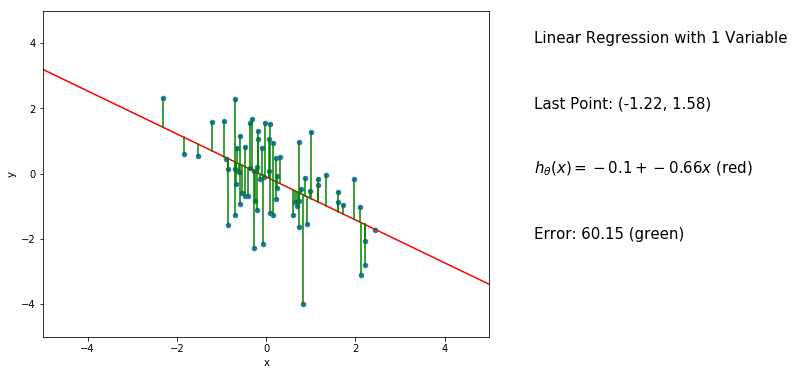

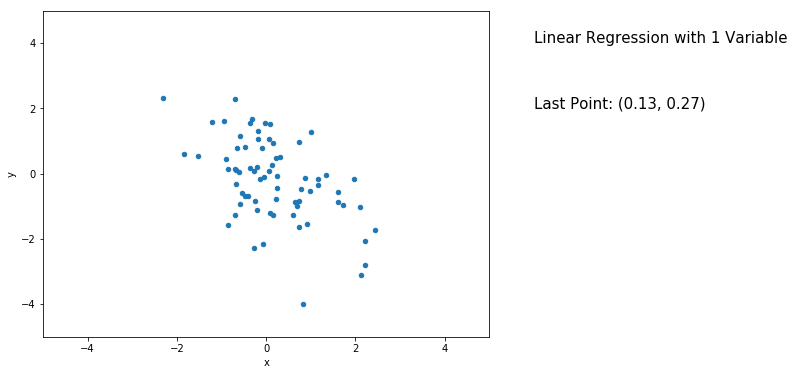

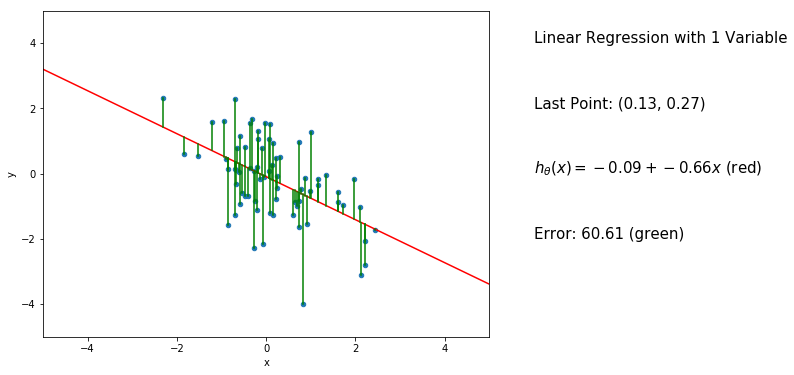

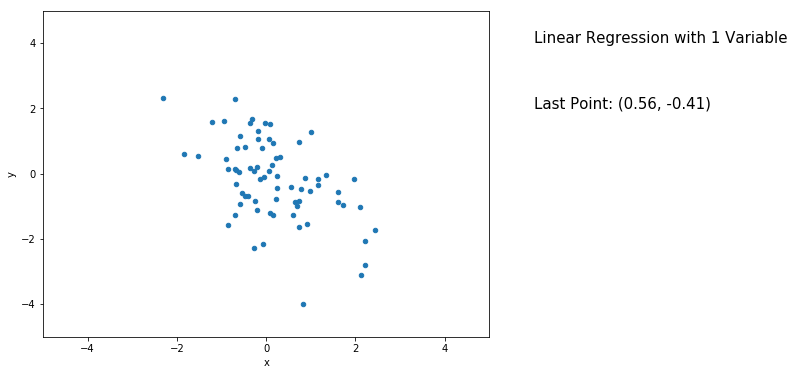

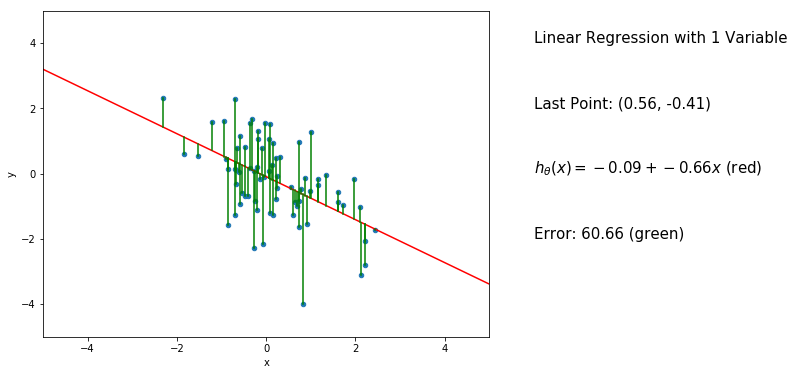

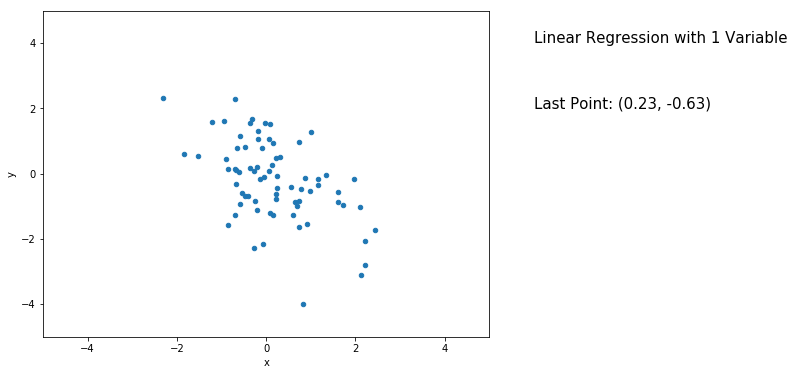

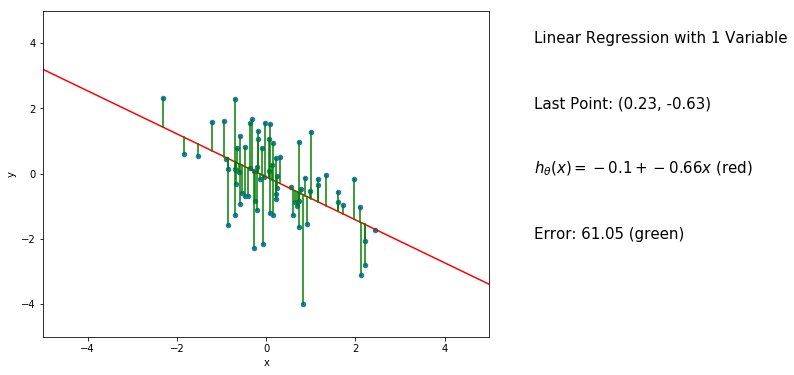

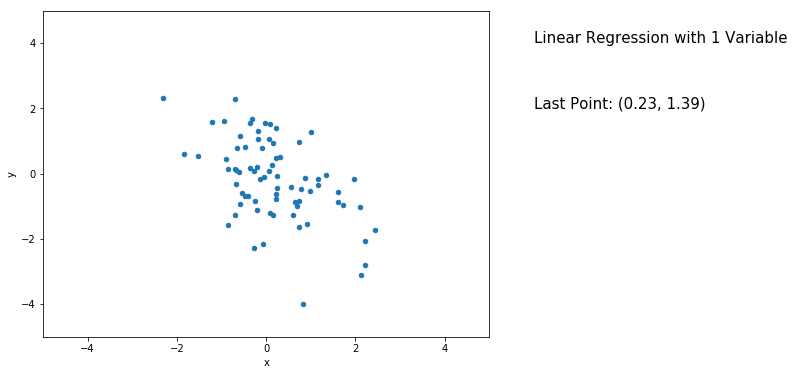

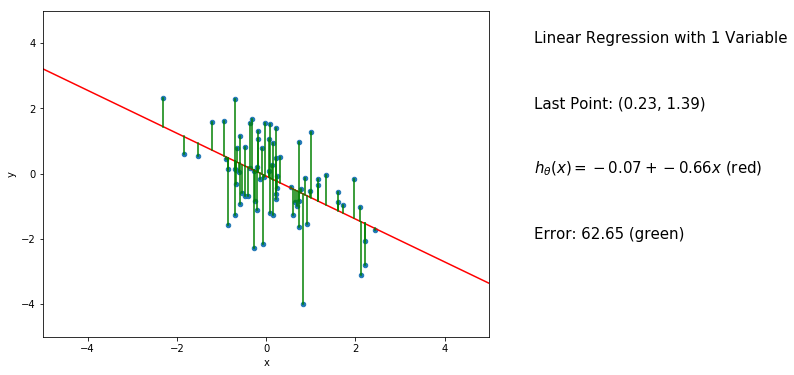

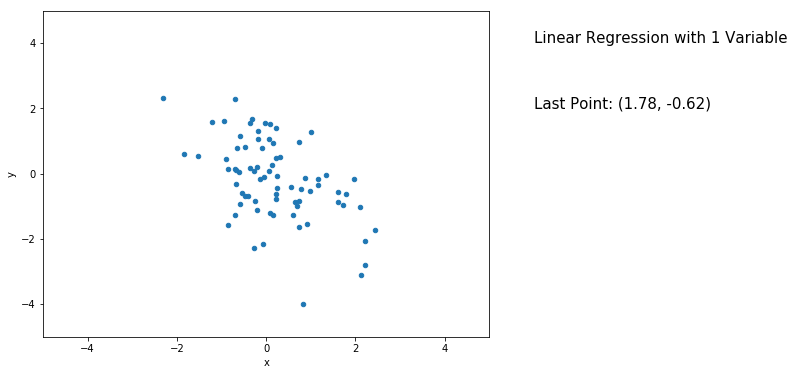

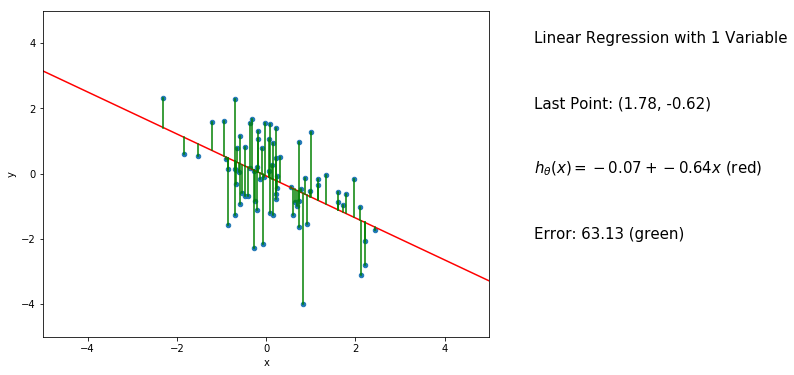

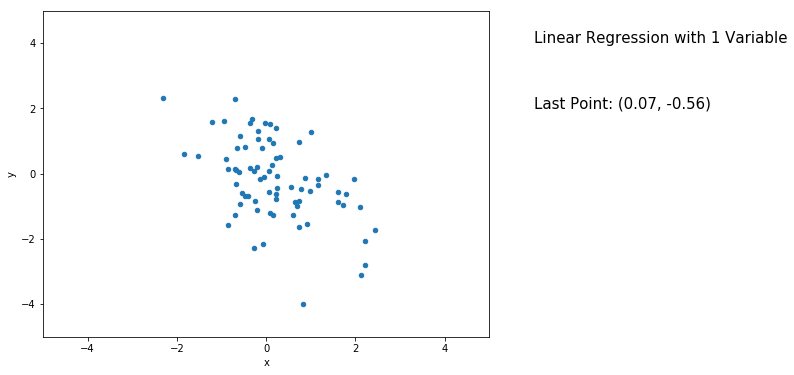

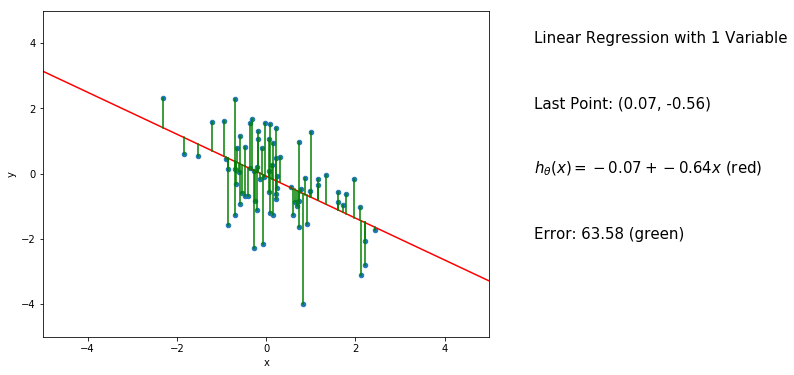

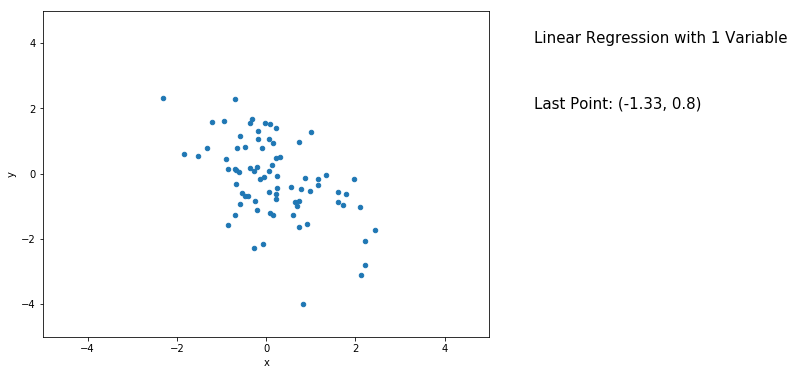

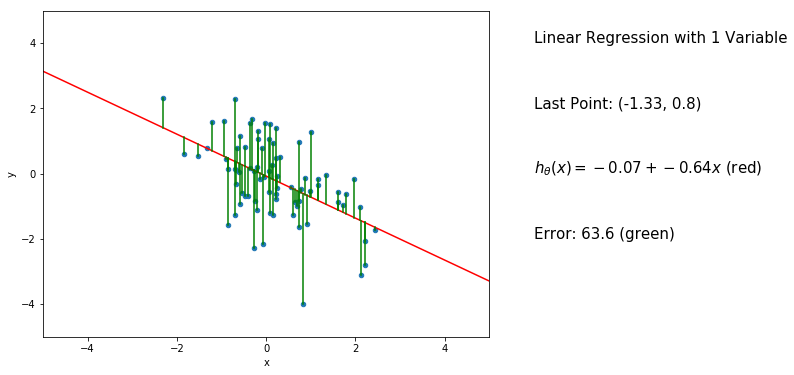

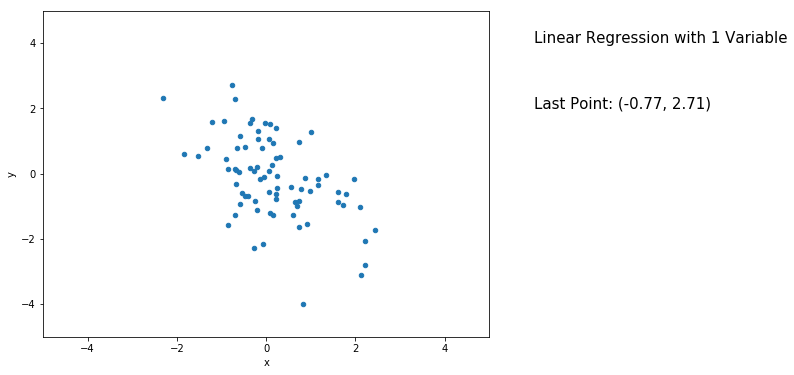

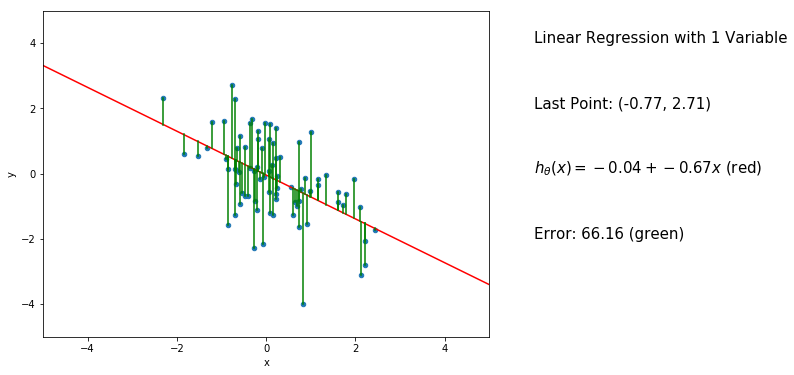

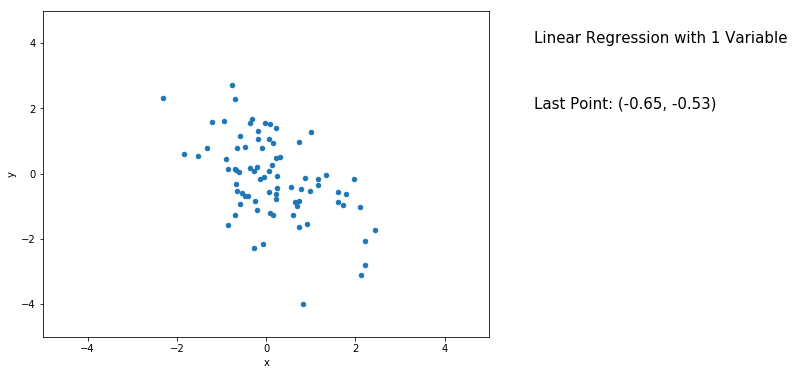

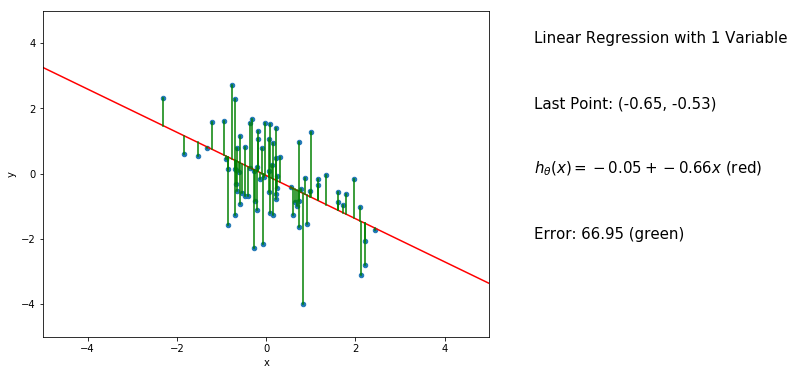

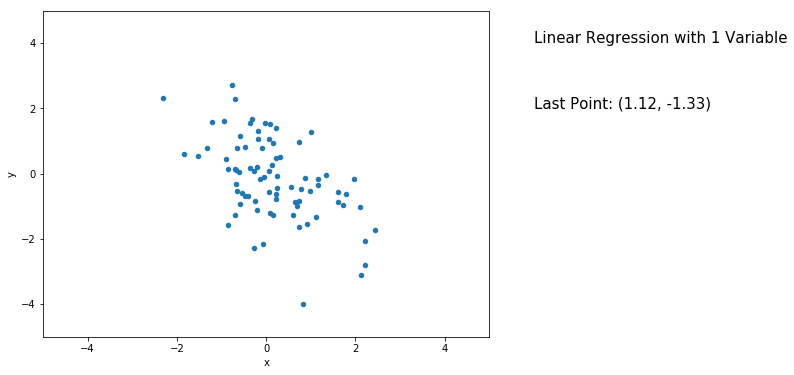

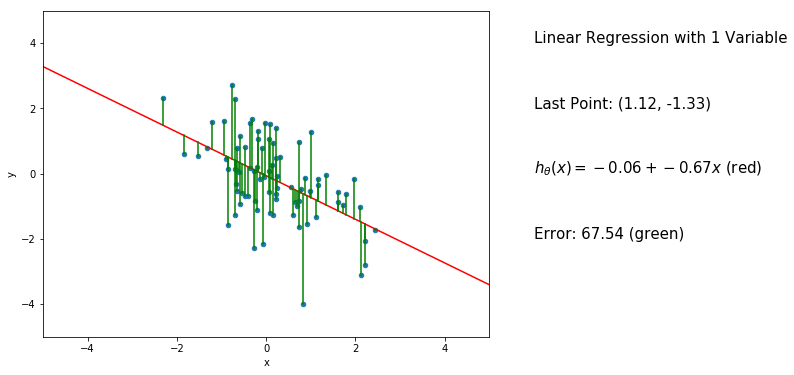

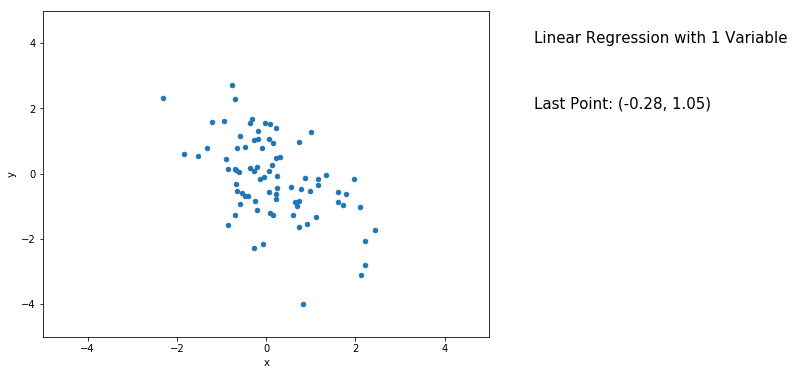

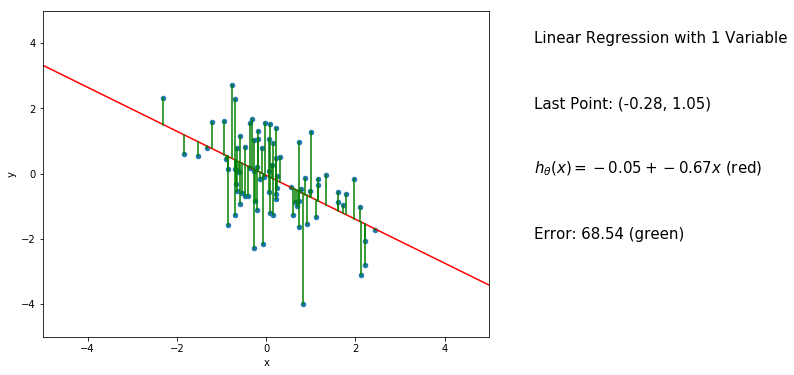

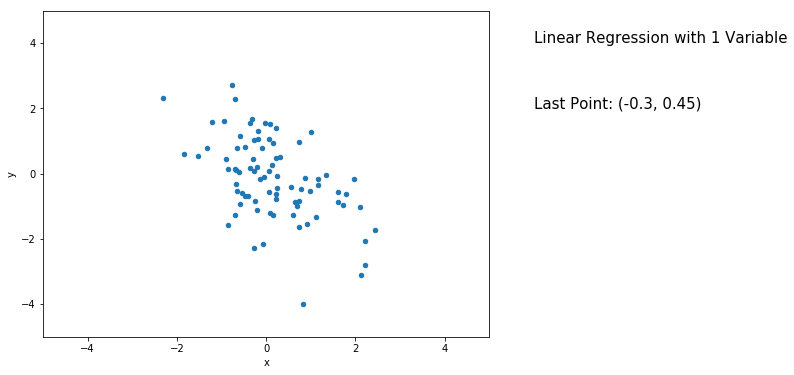

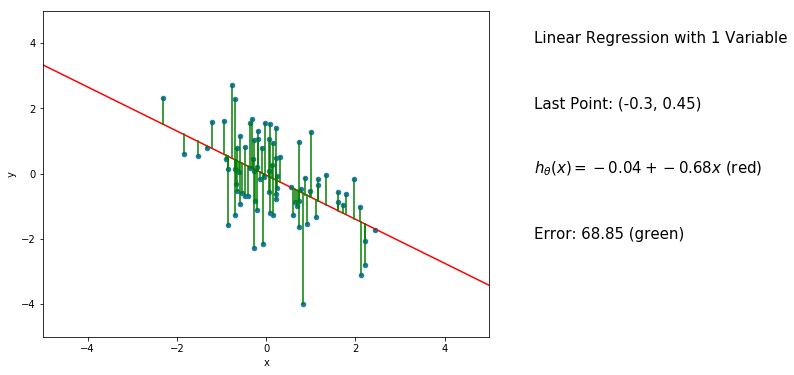

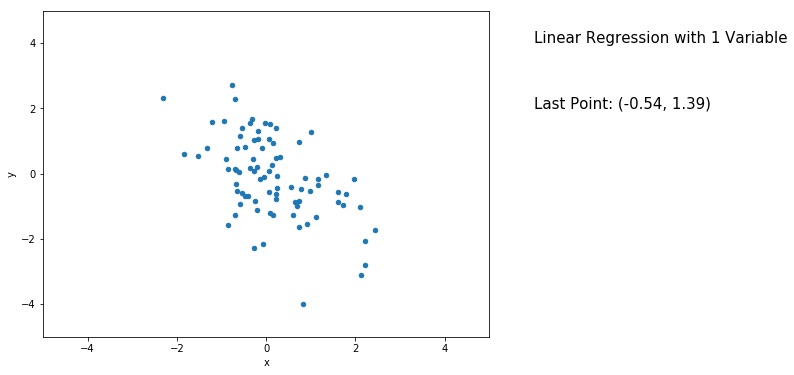

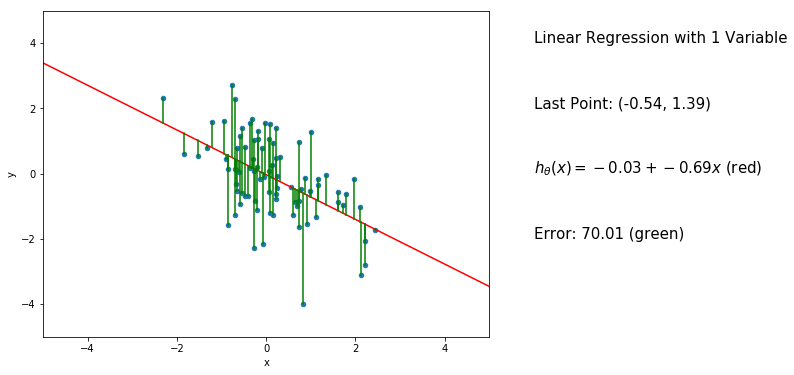

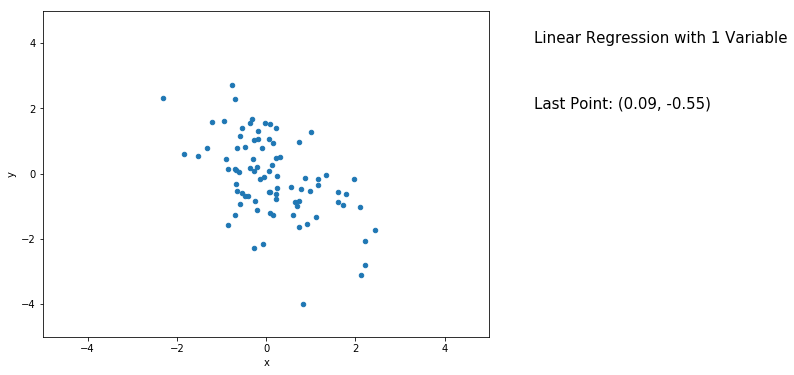

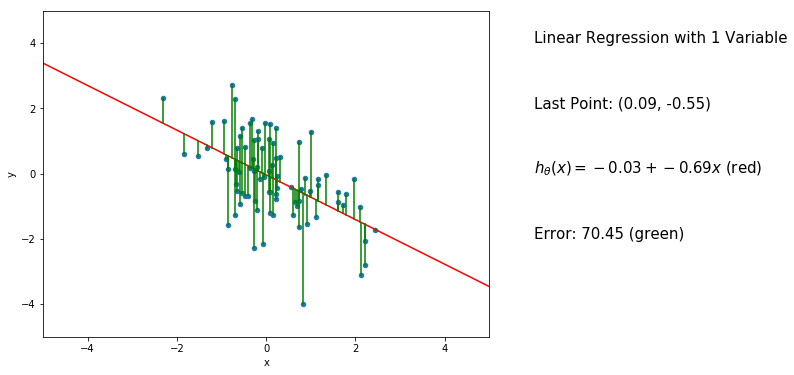

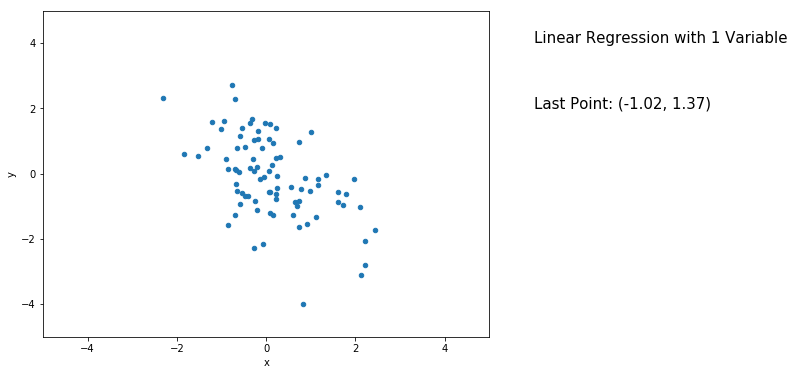

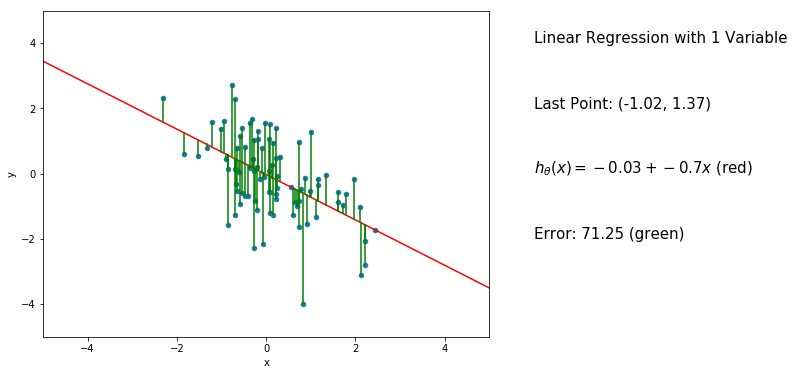

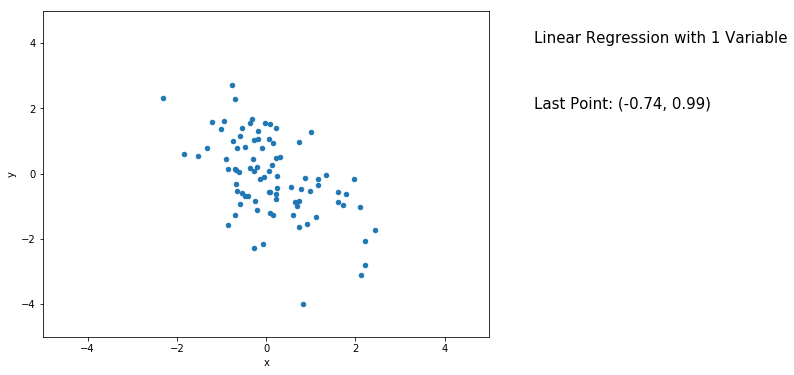

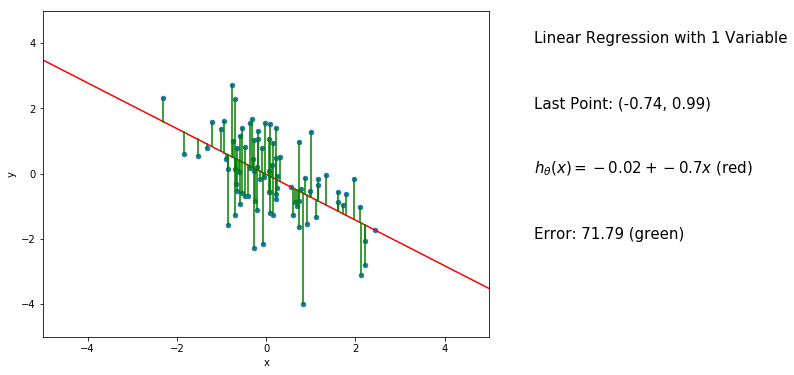

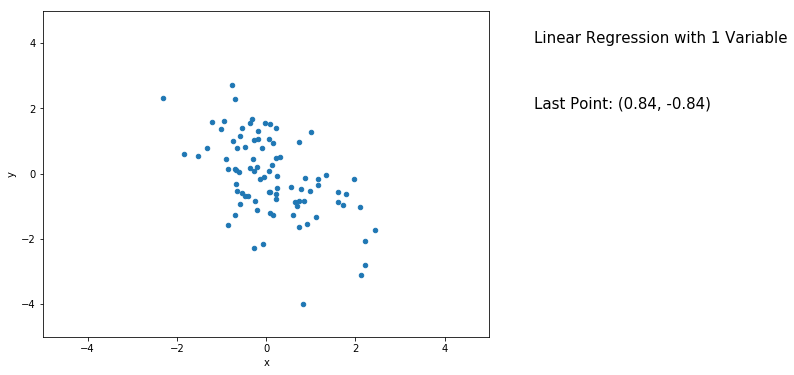

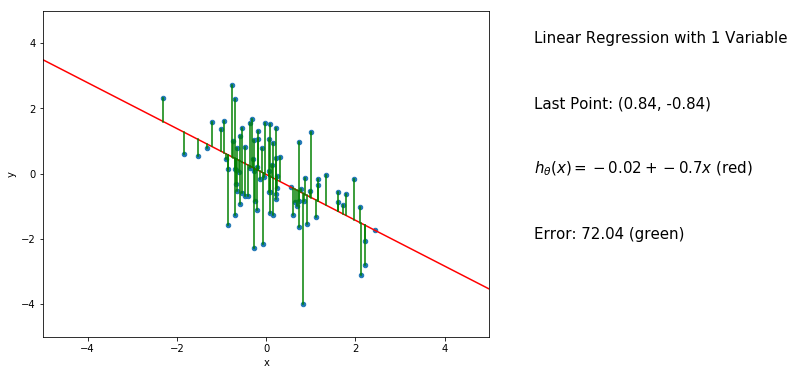

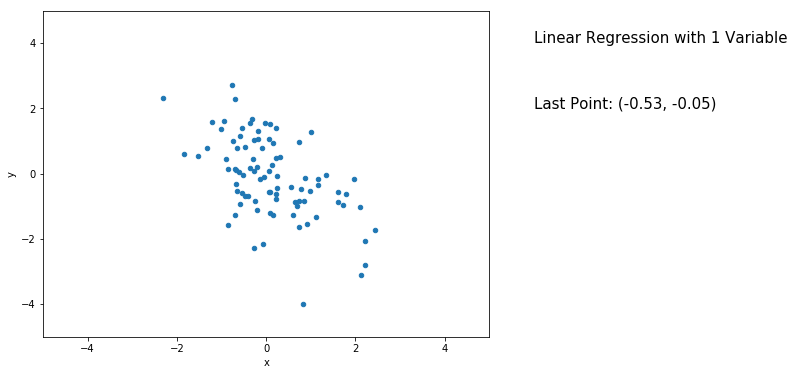

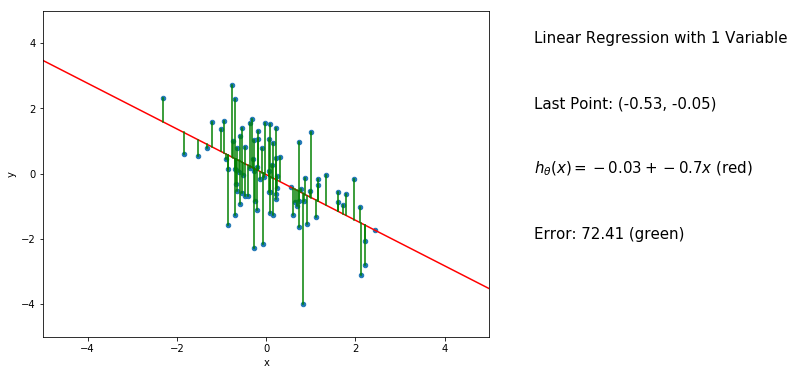

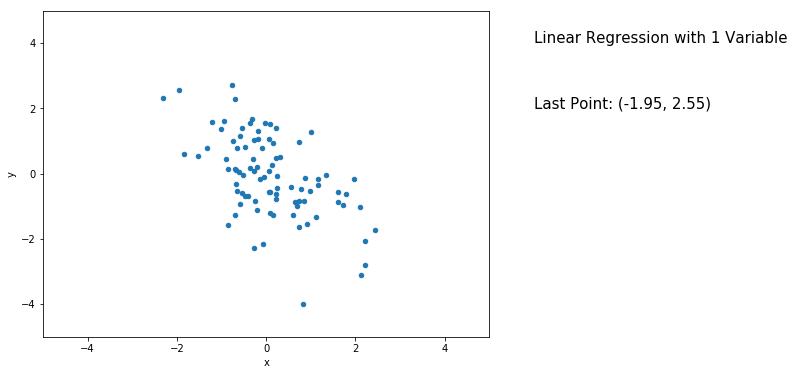

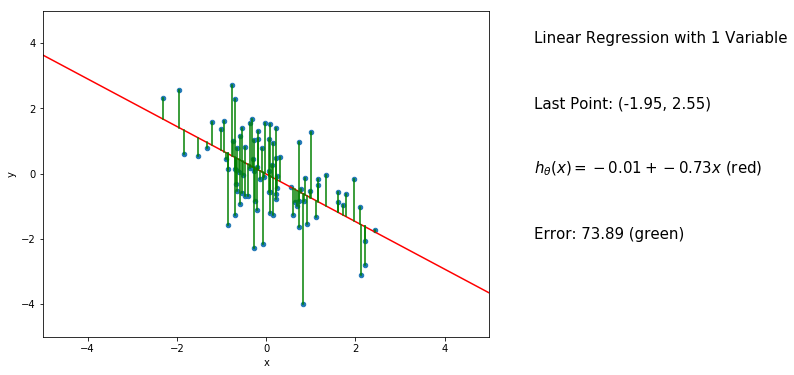

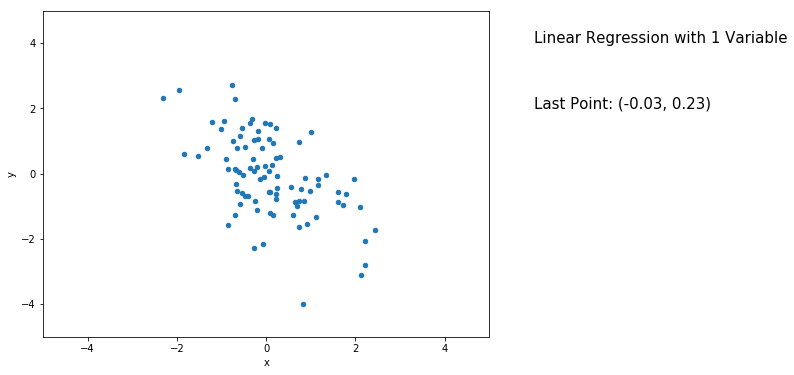

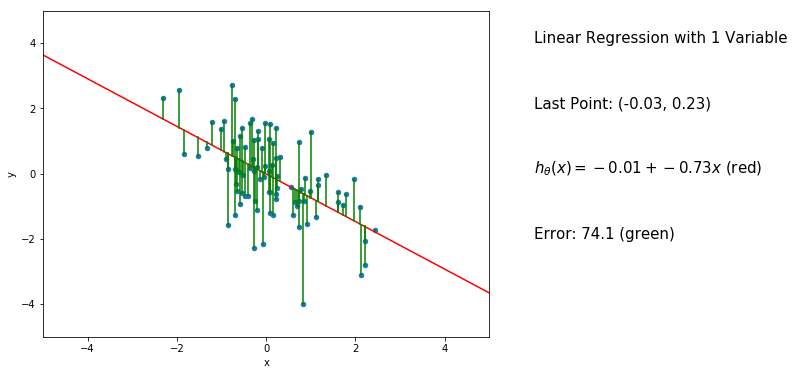

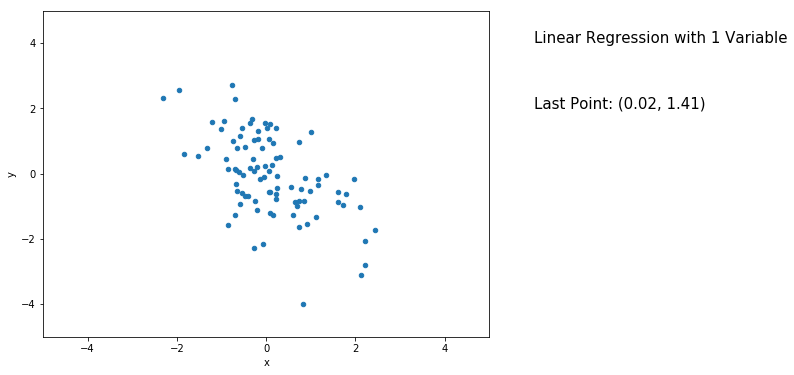

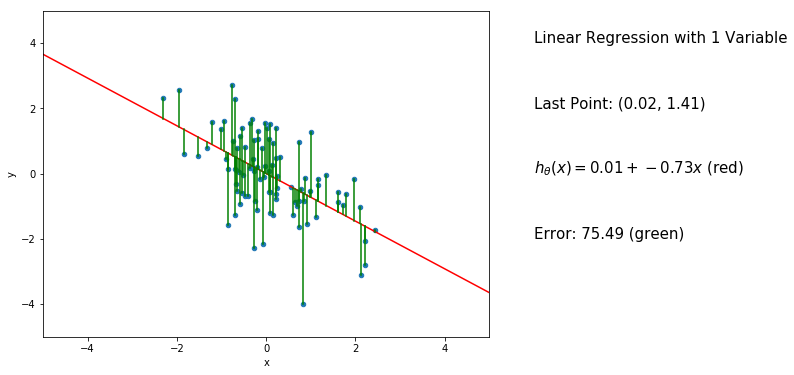

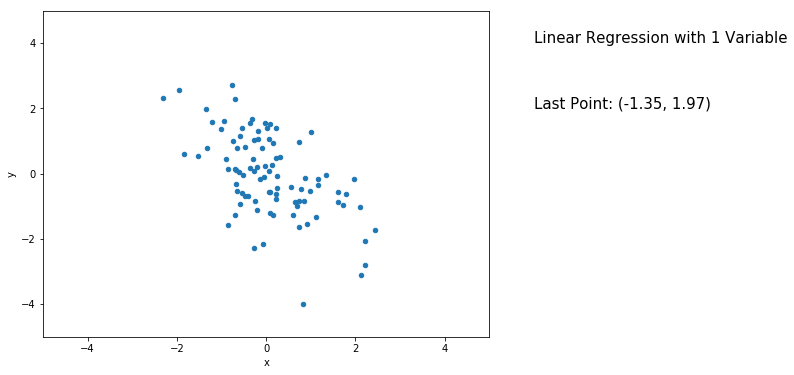

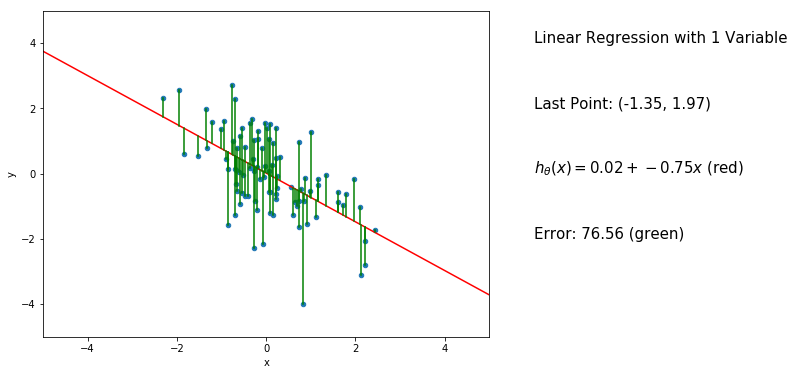

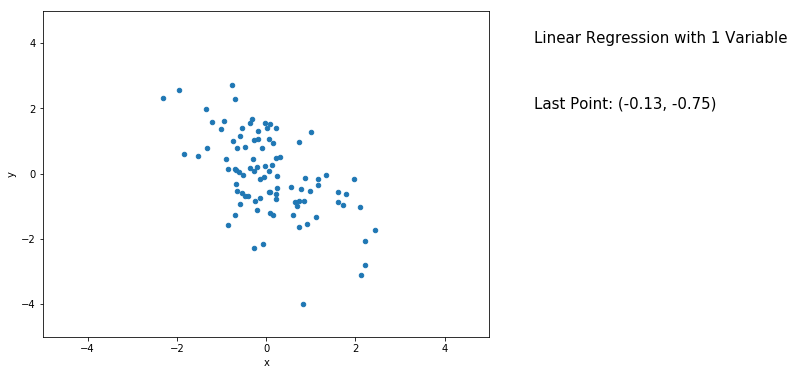

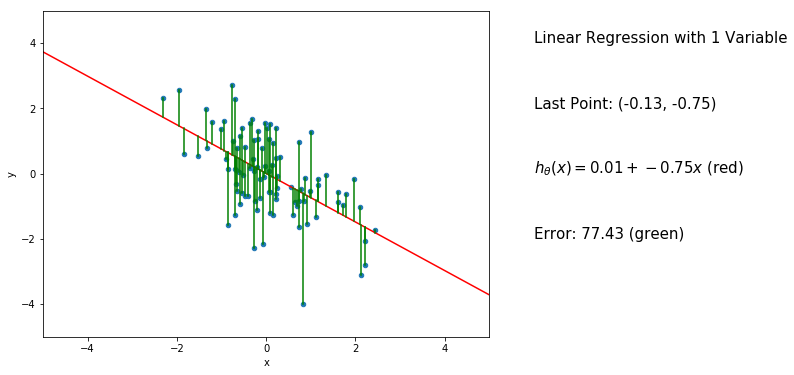

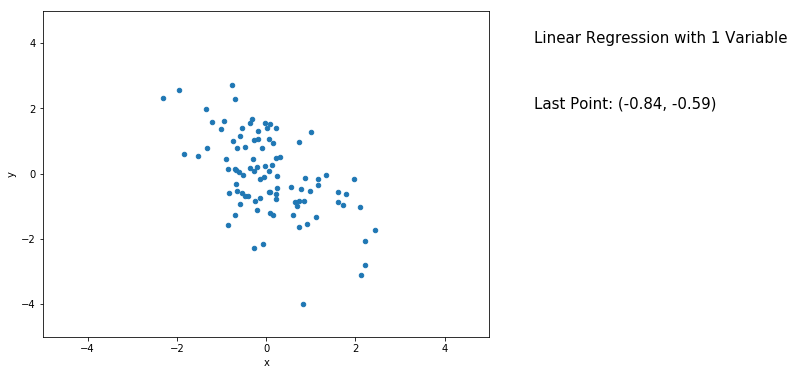

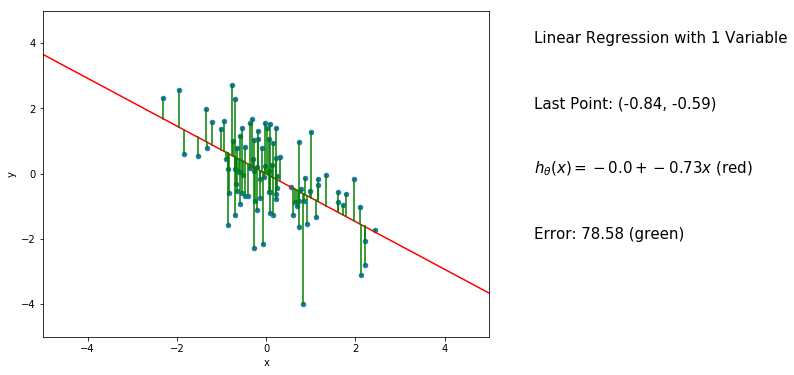

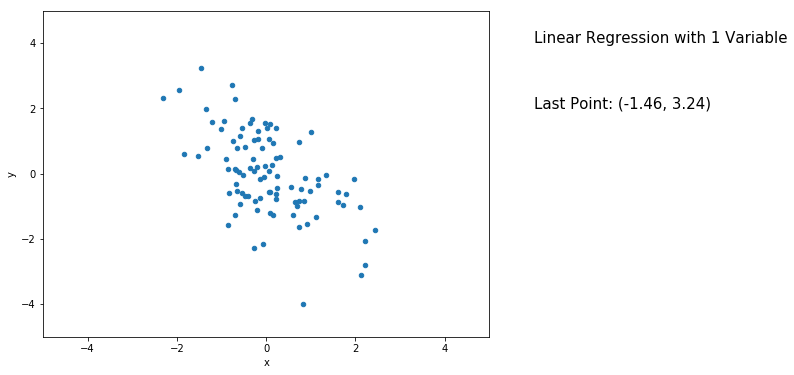

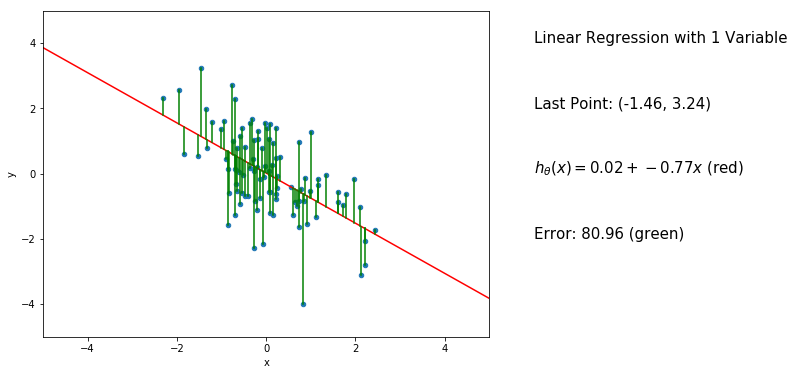

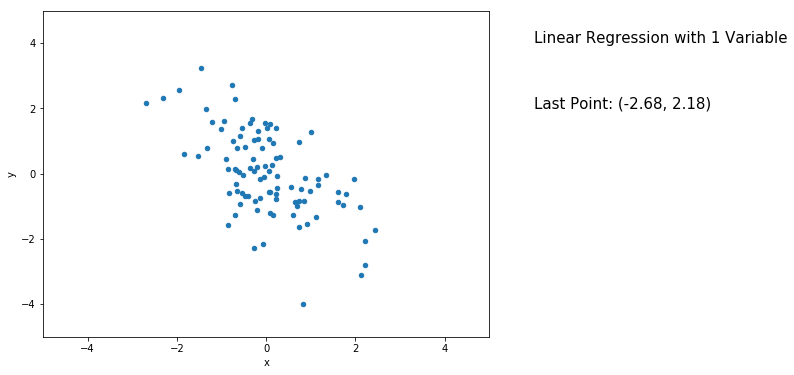

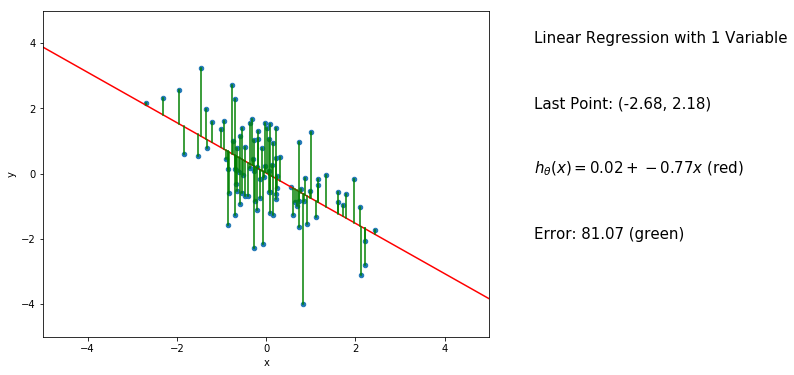

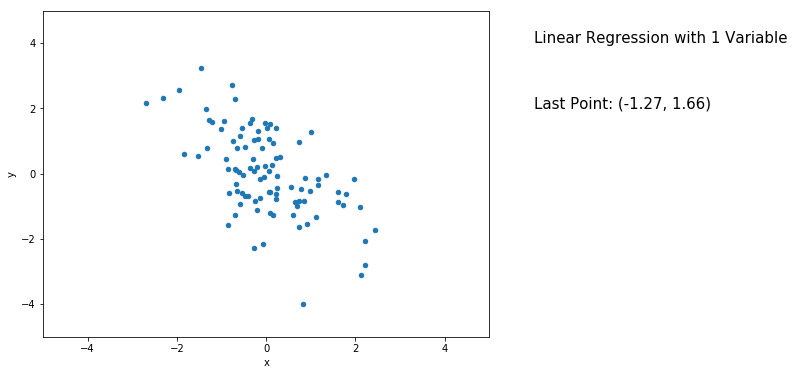

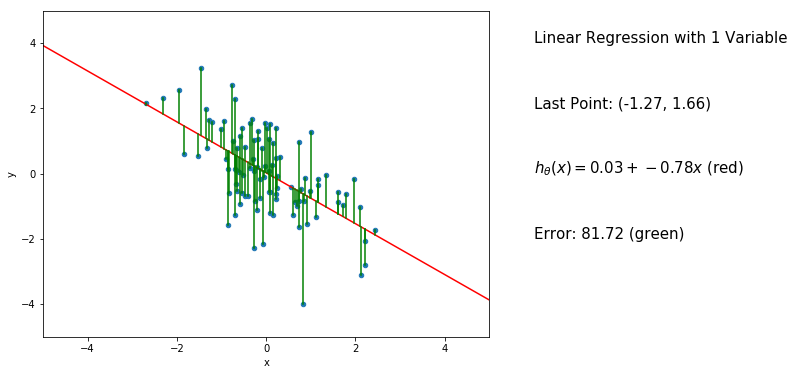

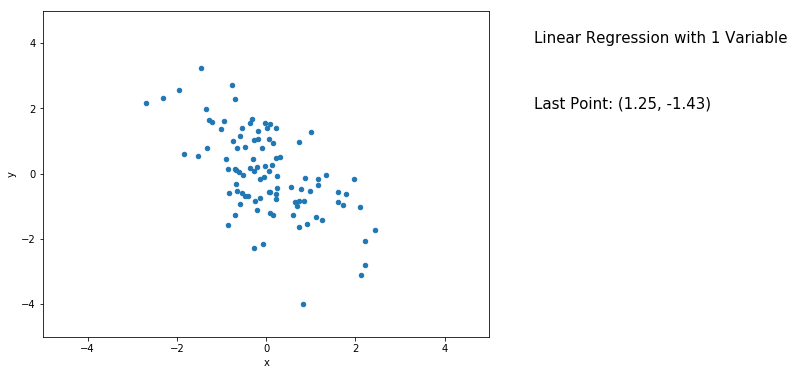

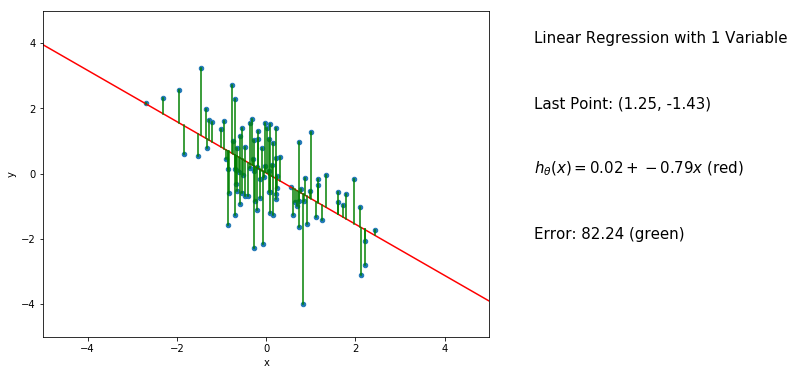

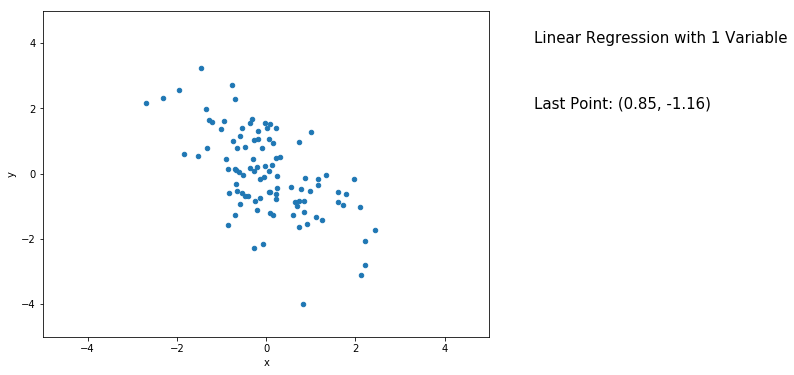

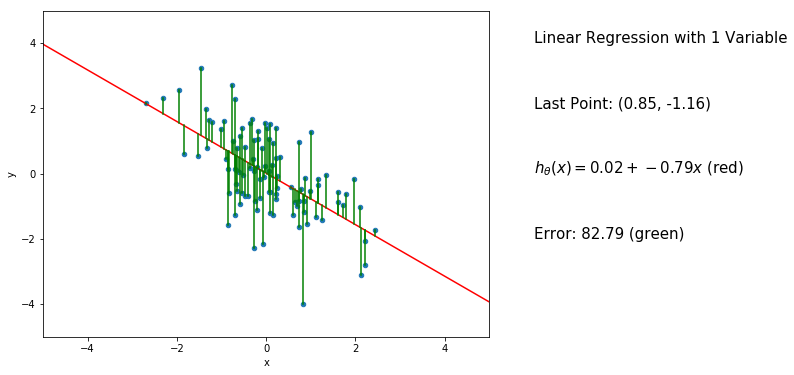

In [78]:
animationOfLinearRegressionOneVar(df)